# Práctica 3
## Big Data

Se desea desarrollar un modelo de machine learning a escala que cuente con la capacidad de evaluar de manera acelerada y precisa el valor de diversos bienes inmuebles para ofrecer recomendaciones de compra-venta con el objetivo de **aplicar estrategias de [House Flipping](https://www.lahaus.mx/blog/tendencias-del-mercado/house-flipping-invertir-mexico)**.

**Conjunto de Datos**

[KC House Dataset](https://www.kaggle.com/datasets/shivachandel/kc-house-data)

El conjunto de datos consiste en los precios de las viviendas del condado de King, un área en el estado de Washington, EE. UU. entre mayo de 2014 y mayo de 2015, estos datos cubren también el área de Seattle. El conjunto de datos consta de 21 variables y 21,613 observaciones.

**Diccionario de Datos**
    
* id - Identificador único para cada casa vendida
* date - Fecha de la venta
* price (target) - Precio de cada vivienda vendida
* bedrooms - Número de dormitorios
* bathrooms - Número de baños, donde 0.5 representa una habitación con inodoro pero sin ducha
* sqft_living - Pies cuadrados del espacio habitable interior de los apartamentos
* sqft_lot - Pies cuadrados del terreno
* floors - Número de pisos
* waterfront - Variable dummy que indica si el apartamento tiene vista al mar o no
* view - Índice de 0 a 4 de qué tan buena es la vista de la propiedad
* condition - Índice de 1 a 5 sobre la condición del apartamento,
* grade - Índice del 1 al 13, en el que de 1 a 3 no llega a la construcción y diseño de edificios, 7 tiene un nivel promedio de construcción y diseño y 11 a 13 tiene un alto nivel de calidad de construcción y diseño.
* sqft_above - Pies cuadrados del espacio interior de la vivienda que está por encima del nivel del suelo
* sqft_basement - Pies cuadrados del espacio interior de la vivienda que está por debajo del nivel del suelo
* yr_built - Año en que se construyó la casa inicialmente
* yr_renovated - Año de la última renovación de la casa
* zipcode - Área de código postal donde se encuentra la casa
* lat - Latitud
* long - Longitud
* sqft_living15 - Pies cuadrados del espacio habitable interior de la vivienda para los 15 vecinos más cercanos
* sqft_lot15 - Pies cuadrados de los lotes de terreno de los 15 vecinos más cercanos.


**Instrucciones:**

1.- Cargue el conjunto de datos y realice un análisis exploratorio apoyándose de visualizaciones para obtener un mejor entendimiento de los datos. Se recomienda el uso de [Kepler (Uber)](https://kepler.gl/) para generar intuición y posteriormente plasmar los hallazgos en DataBricks. **(5pts)**

2.- Con el uso de Spark-SQL aplique la limpeza, transformaciones e ingeniería de variables que considere necesarias con el objetivo de cumplir con el requerimiento del punto 6. **(10pts)**

3.- Con el uso de Spark-MLlib, entrene 3 modelos diferentes sobre la porción de entrenamiento y evalué sobre la porción de validación. Seleccione el mejor modelo y justifique su elección. **(5 pts)**

4.- Con el uso de Hyperopt defina un espacio de búsqueda conformado por al menos 6 hiperparámetros para el modelo ganador y optimice con el algoritmo TPE (*Tree Parzen Estimator*). Se recomienda el uso de Mlflow para dar seguimiento a los experimentos realizados reduciendo los umbrales del espacio de búsqueda.**(5pts)**

5.- Reentrene con la mejor configuración de hiperparámetros encontrada, construya un pipeline predictivo, genere predicciones y devuelva las métricas finales sobre la porción de prueba. Persista el pipeline en Azure Blob Storage.**(5pts)**

6.- Genere una estrategia de uso del modelo para toma de decisiones. Determine las características de una vivienda "barata" y las acciones que implementaría para "elevar" el precio de la propiedad con el objetivo de realizar posteriormente una venta del mismo inmuble (House Flipping). **(5pts)**

## Equipo <8>

* Arredondo G Inda Jesús Antonio 
* Benitez Benitez Hugo 
* Colmenares Espinoza Esperanza

# Carga de la información

#### 1.- Cargue el conjunto de datos y realice un análisis exploratorio apoyándose de visualizaciones para obtener un mejor entendimiento de los datos. Se recomienda el uso de [Kepler (Uber)](https://kepler.gl/) para generar intuición y posteriormente plasmar los hallazgos en DataBricks. **(5pts)**

In [0]:
import pyspark

In [0]:
generation = "mod4gen13"

In [0]:
dbutils.fs.ls(f"/mnt/{generation}/input") #Vemos el contenido del conteiner

Out[3]: [FileInfo(path='dbfs:/mnt/mod4gen13/input/appl_stock.csv', name='appl_stock.csv', size=143130, modificationTime=1663215557000),
 FileInfo(path='dbfs:/mnt/mod4gen13/input/college.csv', name='college.csv', size=75708, modificationTime=1663817347000),
 FileInfo(path='dbfs:/mnt/mod4gen13/input/contains_null.csv', name='contains_null.csv', size=61, modificationTime=1663817347000),
 FileInfo(path='dbfs:/mnt/mod4gen13/input/ecommerce_customers.csv', name='ecommerce_customers.csv', size=86871, modificationTime=1663817347000),
 FileInfo(path='dbfs:/mnt/mod4gen13/input/hack_data.csv', name='hack_data.csv', size=14268, modificationTime=1663817347000),
 FileInfo(path='dbfs:/mnt/mod4gen13/input/kc_house_data.csv', name='kc_house_data.csv', size=2381977, modificationTime=1664065446000),
 FileInfo(path='dbfs:/mnt/mod4gen13/input/people.json', name='people.json', size=73, modificationTime=1663386606000),
 FileInfo(path='dbfs:/mnt/mod4gen13/input/sales_info.csv', name='sales_info.csv', size=196, modificationTime=1663817347000),
 FileInfo(path='dbfs:/mnt/mod4gen13/input/sample_linear_regression_data.txt', name='sample_linear_regression_data.txt', size=119069, modificationTime=1663817347000),
 FileInfo(path='dbfs:/mnt/mod4gen13/input/titanic.csv', name='titanic.csv', size=60302, modificationTime=1663817347000)]

In [0]:
"""Importamos el dataset"""
df = spark.read.csv(f"/mnt/{generation}/input/kc_house_data.csv", inferSchema=True, header=True)

In [0]:
df.count(), len(df.columns) #dimension del df

Out[5]: (21613, 21)

In [0]:
df.printSchema()

root
-- id: long (nullable = true)
-- date: string (nullable = true)
-- price: double (nullable = true)
-- bedrooms: integer (nullable = true)
-- bathrooms: double (nullable = true)
-- sqft_living: integer (nullable = true)
-- sqft_lot: integer (nullable = true)
-- floors: double (nullable = true)
-- waterfront: integer (nullable = true)
-- view: integer (nullable = true)
-- condition: integer (nullable = true)
-- grade: integer (nullable = true)
-- sqft_above: integer (nullable = true)
-- sqft_basement: integer (nullable = true)
-- yr_built: integer (nullable = true)
-- yr_renovated: integer (nullable = true)
-- zipcode: integer (nullable = true)
-- lat: double (nullable = true)
-- long: double (nullable = true)
-- sqft_living15: integer (nullable = true)
-- sqft_lot15: integer (nullable = true)

In [0]:
"""Imprimamos primero en show para ver que la información viene en buen estado"""
df.show(n=5) #mostramos las primeras 5 filas

+----------+---------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
 id| date| price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode| lat| long|sqft_living15|sqft_lot15|
+----------+---------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
7129300520|20141013T000000|221900.0| 3| 1.0| 1180| 5650| 1.0| 0| 0| 3| 7| 1180| 0| 1955| 0| 98178|47.5112|-122.257| 1340| 5650|
6414100192|20141209T000000|538000.0| 3| 2.25| 2570| 7242| 2.0| 0| 0| 3| 7| 2170| 400| 1951| 1991| 98125| 47.721|-122.319| 1690| 7639|
5631500400|20150225T000000|180000.0| 2| 1.0| 770| 10000| 1.0| 0| 0| 3| 6| 770| 0| 1933| 0| 98028|47.7379|-122.233| 2720| 8062|
2487200875|20141209T000000|604000.0| 4| 3.0| 1960| 5000| 1.0| 0| 0| 5| 7| 1050| 910| 1965| 0| 98136|47.5208|-122.393| 1360| 5000|
1954400510|20150218T000000|510000.0| 3| 2.0| 1680| 8080| 1.0| 0| 0| 3| 8| 1680| 0| 1987| 0| 98074|47.6168|-122.045| 1800| 7503|
+----------+---------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
only showing top 5 rows

In [0]:
df.display(n=5)

id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 7129300520 20141013T000000 221900.0 3 1.0 1180 5650 1.0 0 0 3 7 1180 0 1955 0 98178 47.5112 -122.257 1340 5650 6414100192 20141209T000000 538000.0 3 2.25 2570 7242 2.0 0 0 3 7 2170 400 1951 1991 98125 47.721 -122.319 1690 7639 5631500400 20150225T000000 180000.0 2 1.0 770 10000 1.0 0 0 3 6 770 0 1933 0 98028 47.7379 -122.233 2720 8062 2487200875 20141209T000000 604000.0 4 3.0 1960 5000 1.0 0 0 5 7 1050 910 1965 0 98136 47.5208 -122.393 1360 5000 1954400510 20150218T000000 510000.0 3 2.0 1680 8080 1.0 0 0 3 8 1680 0 1987 0 98074 47.6168 -122.045 1800 7503 7237550310 20140512T000000 1225000.0 4 4.5 5420 101930 1.0 0 0 3 11 3890 1530 2001 0 98053 47.6561 -122.005 4760 101930 1321400060 20140627T000000 257500.0 3 2.25 1715 6819 2.0 0 0 3 7 1715 0 1995 0 98003 47.3097 -122.327 2238 6819 2008000270 20150115T000000 291850.0 3 1.5 1060 9711 1.0 0 0 3 7 1060 0 1963 0 98198 47.4095 -122.315 1650 9711 2414600126 20150415T000000 229500.0 3 1.0 1780 7470 1.0 0 0 3 7 1050 730 1960 0 98146 47.5123 -122.337 1780 8113 3793500160 20150312T000000 323000.0 3 2.5 1890 6560 2.0 0 0 3 7 1890 0 2003 0 98038 47.3684 -122.031 2390 7570 1736800520 20150403T000000 662500.0 3 2.5 3560 9796 1.0 0 0 3 8 null 1700 1965 0 98007 47.6007 -122.145 2210 8925 9212900260 20140527T000000 468000.0 2 1.0 1160 6000 1.0 0 0 4 7 860 300 1942 0 98115 47.69 -122.292 1330 6000 114101516 20140528T000000 310000.0 3 1.0 1430 19901 1.5 0 0 4 7 1430 0 1927 0 98028 47.7558 -122.229 1780 12697 6054650070 20141007T000000 400000.0 3 1.75 1370 9680 1.0 0 0 4 7 1370 0 1977 0 98074 47.6127 -122.045 1370 10208 1175000570 20150312T000000 530000.0 5 2.0 1810 4850 1.5 0 0 3 7 1810 0 1900 0 98107 47.67 -122.394 1360 4850 9297300055 20150124T000000 650000.0 4 3.0 2950 5000 2.0 0 3 3 9 1980 970 1979 0 98126 47.5714 -122.375 2140 4000 1875500060 20140731T000000 395000.0 3 2.0 1890 14040 2.0 0 0 3 7 1890 0 1994 0 98019 47.7277 -121.962 1890 14018 6865200140 20140529T000000 485000.0 4 1.0 1600 4300 1.5 0 0 4 7 null 0 1916 0 98103 47.6648 -122.343 1610 4300 16000397 20141205T000000 189000.0 2 1.0 1200 9850 1.0 0 0 4 7 1200 0 1921 0 98002 47.3089 -122.21 1060 5095 7983200060 20150424T000000 230000.0 3 1.0 1250 9774 1.0 0 0 4 7 1250 0 1969 0 98003 47.3343 -122.306 1280 8850 6300500875 20140514T000000 385000.0 4 1.75 1620 4980 1.0 0 0 4 7 860 760 1947 0 98133 47.7025 -122.341 1400 4980 2524049179 20140826T000000 2000000.0 3 2.75 3050 44867 1.0 0 4 3 9 2330 720 1968 0 98040 47.5316 -122.233 4110 20336 7137970340 20140703T000000 285000.0 5 2.5 2270 6300 2.0 0 0 3 8 2270 0 1995 0 98092 47.3266 -122.169 2240 7005 8091400200 20140516T000000 252700.0 2 1.5 1070 9643 1.0 0 0 3 7 1070 0 1985 0 98030 47.3533 -122.166 1220 8386 3814700200 20141120T000000 329000.0 3 2.25 2450 6500 2.0 0 0 4 8 2450 0 1985 0 98030 47.3739 -122.172 2200 6865 1202000200 20141103T000000 233000.0 3 2.0 1710 4697 1.5 0 0 5 6 1710 0 1941 0 98002 47.3048 -122.218 1030 4705 1794500383 20140626T000000 937000.0 3 1.75 2450 2691 2.0 0 0 3 8 1750 700 1915 0 98119 47.6386 -122.36 1760 3573 3303700376 20141201T000000 667000.0 3 1.0 1400 1581 1.5 0 0 5 8 1400 0 1909 0 98112 47.6221 -122.314 1860 3861 5101402488 20140624T000000 438000.0 3 1.75 1520 6380 1.0 0 0 3 7 790 730 1948 0 98115 47.695 -122.304 1520 6235 1873100390 20150302T000000 719000.0 4 2.5 2570 7173 2.0 0 0 3 8 2570 0 2005 0 98052 47.7073 -122.11 2630 6026 8562750320 20141110T000000 580500.0 3 2.5 2320 3980 2.0 0 0 3 8 2320 0 2003 0 98027 47.5391 -122.07 2580 3980 2426039314 20141201T000000 280000.0 2 1.5 1190 1265 3.0 0 0 3 7 1190 0 2005 0 98133 47.7274 -122.357 1390 1756 461000390 20140624T000000 687500.0 4 1.75 2330 5000 1.5 0 0 4 7 1510 820 1929 0 98117 47.6823 -122.368 1460 5000 7589200193 20141110T000000 535000.0 3 1.0 1090 3000 1.5 0 0 4 8 1090 0 1929 0 98117 47.6889 -122.375 1570 5080 7955080270

In [0]:
"""Veamos nulos"""
from pyspark.sql.functions import col,isnan,when,count
df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns]).display()

id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0

Con lo anterior nos podemos percatar que la unica columna que cuenta con datos nulos es sqtf_above con dos registros

In [0]:
(2/df.count())*100 #Porcentaje de datos nulos

Out[10]: 0.009253689908851155

Como dicha cifra es realmente baja podemos eliminar esos dos registros nulos de nuestro dataset original

In [0]:
df.na.drop(how="any").count() #Eliminamos los valores nulos

Out[11]: 21611

In [0]:
df = df.na.drop(how="any")
df.count()

Out[12]: 21611

In [0]:
"""Corroboramos que ya no tengamos datos nulos"""
df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns]).display()

id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Ya que logramos eliminar los datos nulos, procedamos a ver si existen registros duplicados por id

In [0]:
"""Contamos por id y mostramos los mayores a 1"""
df.groupBy("id")\
    .count()\
    .where(col('count') > 1)\
    .display()

id count 2023049218 2 2787460720 2 7853400250 2 8121100395 2 123039336 2 6021501535 2 3333002450 2 641900050 2 1825069031 2 2019200220 2 3578401060 2 8910500150 2 7409700215 2 8820903380 2 4443800385 2 7899800045 2 4204400098 2 3523069060 2 1000102 2 8682262400 2 1250201165 2 2767602141 2 4305200070 2 8103000110 2 1231000510 2 2726049071 2 2568300045 2 1446403850 2 5083000375 2 4435000705 2 1432400120 2 3935900232 2 795000620 3 6300000226 2 1781500435 2 937000330 2 9407110710 2 1568100300 2 6791200120 2 9222400605 2 2724049222 2 4345000510 2 7888000390 2 7856400240 2 6751300375 2 9211500620 2 7701960990 2 4031000520 2 5282200015 2 7520000695 2 3395040550 2 6021500970 2 6117501820 2 3271300955 2 1524079093 2 5101402435 2 1450100390 2 1219000473 2 1995200200 2 4154300296 2 1217000340 2 1139600270 2 7520000520 2 8807810890 2 7856400300 2 3528000040 2 2212200100 2 7657000540 2 302000375 2 6143000020 2 2143700830 2 4222310010 2 8832900780 2 5127001320 2 4302201085 2 3432501415 2 7983000200 2 1901600090 2 9834200885 2 7200179 2 1254200015 2 3293700496 2 324000530 2 3558900590 2 7504021310 2 6381500170 2 4202400078 2 7387500235 2 3332000615 2 8062900070 2 3883800011 2 5054800110 2 4364700600 2 5101405604 2 9828200460 2 722039087 2 3598600049 2 3262300940 2 6141100320 2 705730280 2 2044500213 2 526059224 2 5536100020 2 8945100320 2 6623400187 2 2231500030 2 726049190 2 8651402750 2 7524400250 2 2422049104 2 7972000010 2 3185600040 2 2473380920 2 7167000040 2 1788800630 2 7977201065 2 2892700041 2 2621600015 2 9809000020 2 4139420590 2 3323059027 2 4139480200 2 9136103130 2 7853420110 2 9250900104 2 7227800055 2 3904100089 2 5332200530 2 6632900574 2 2767603612 2 5417600130 2 6669020290 2 7129304540 2 1823049202 2 4139440480 2 8129700644 2 1974300020 2 3303000130 2 8648900110 2 1788900230 2 5249801440 2 1545800290 2 1922059278 2 8161020060 2 8651510380 2 2619920170 2 7230400400 2 7893805650 2 3969300030 2 1232000810 2 723049156 2 5430300171 2 3739500096 2 9353300600 2 9238500040 2 6308000010 2 1423049019 2 1630700361 2 8645530010 2 251300110 2 1721801010 2 8564860270 2 1036400200 2 9834200305 2 2206700215 2 109200390 2 2228900270 2 1237500540 2 7961500010 2 643300040 2 3630120700 2 1954420170 2 2561340020 2 2560801222 2 5132000140 2 1523049207 2

In [0]:
df.dropDuplicates(['id']).count() - df.count() #Numero de registros duplicados

Out[15]: -177

In [0]:
"""Veamos si los renglones son iguales en todos los registros"""
df.dropDuplicates().count() - df.count()

Out[16]: 0

In [0]:
df.filter(df["id"]==2023049218).display()

id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 2023049218 20140716T000000 105500.0 2 1.0 930 7740 1.0 0 0 1 5 930 0 1932 0 98148 47.4611 -122.324 1620 8584 2023049218 20150316T000000 445000.0 2 1.0 930 7740 1.0 0 0 1 5 930 0 1932 0 98148 47.4611 -122.324 1620 8584

In [0]:
df.filter(df["id"]==7409700215).display()

id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 7409700215 20140606T000000 550000.0 3 1.5 1900 5000 1.5 0 0 3 7 1640 260 1926 0 98115 47.6779 -122.294 2090 5000 7409700215 20150313T000000 921500.0 3 1.5 1900 5000 1.5 0 0 3 7 1640 260 1926 0 98115 47.6779 -122.294 2090 5000

In [0]:
df.groupby("yr_renovated").count().display()

yr_renovated count 1959 1 1990 25 1975 6 1977 8 2003 36 2007 35 1974 3 2015 16 1955 3 2006 24 1978 6 2013 37 1944 1 1956 3 1934 1 1988 15 1997 15 1994 19 1968 8 2014 91 1951 1 1973 5 1979 10 1946 2 1971 2 1950 2 2004 26 1991 20 1967 2 1969 4 1982 11 1945 3 1957 3 1989 22 1996 15 1998 19 1963 4 1965 5 1985 17 1960 4 1970 9 2012 11 1987 18 2009 22 1995 16 1980 11 1953 3 2001 19 1972 4 1992 17 1958 5 1983 18 2005 35 1954 1 1984 18 2000 35 1964 5 2010 18 1981 5 1986 17 2011 13 1976 3 2008 18 1940 2 1999 17 1948 1 1962 2 0 20697 2002 22 1993 19

Se puede apreciar que hay registros que conservan el mismo id pero varian variables como el precio o el año de venta por lo cual no nos interesa conservar los registros repetidos en id dado que el año no es una variable que se pueda modificar para aumentar el valor de la vivienda pensando en el objetivo del problema. Por lo cual nos quedaremos solo con el año de date y con ese eliminaresmos aquellos con el año mas antiguo en caso de que esten repetidos los registros.

In [0]:
from pyspark.sql.functions import to_timestamp, to_date, dayofmonth, hour, dayofyear, month, year, weekofyear, date_format, from_utc_timestamp, substring
"""Arreglamos la fecha"""
df = df.withColumn("Año", substring(col("date"), 1, 4)) #Extraemos solo el año
df.display()

id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 Año 7129300520 20141013T000000 221900.0 3 1.0 1180 5650 1.0 0 0 3 7 1180 0 1955 0 98178 47.5112 -122.257 1340 5650 2014 6414100192 20141209T000000 538000.0 3 2.25 2570 7242 2.0 0 0 3 7 2170 400 1951 1991 98125 47.721 -122.319 1690 7639 2014 5631500400 20150225T000000 180000.0 2 1.0 770 10000 1.0 0 0 3 6 770 0 1933 0 98028 47.7379 -122.233 2720 8062 2015 2487200875 20141209T000000 604000.0 4 3.0 1960 5000 1.0 0 0 5 7 1050 910 1965 0 98136 47.5208 -122.393 1360 5000 2014 1954400510 20150218T000000 510000.0 3 2.0 1680 8080 1.0 0 0 3 8 1680 0 1987 0 98074 47.6168 -122.045 1800 7503 2015 7237550310 20140512T000000 1225000.0 4 4.5 5420 101930 1.0 0 0 3 11 3890 1530 2001 0 98053 47.6561 -122.005 4760 101930 2014 1321400060 20140627T000000 257500.0 3 2.25 1715 6819 2.0 0 0 3 7 1715 0 1995 0 98003 47.3097 -122.327 2238 6819 2014 2008000270 20150115T000000 291850.0 3 1.5 1060 9711 1.0 0 0 3 7 1060 0 1963 0 98198 47.4095 -122.315 1650 9711 2015 2414600126 20150415T000000 229500.0 3 1.0 1780 7470 1.0 0 0 3 7 1050 730 1960 0 98146 47.5123 -122.337 1780 8113 2015 3793500160 20150312T000000 323000.0 3 2.5 1890 6560 2.0 0 0 3 7 1890 0 2003 0 98038 47.3684 -122.031 2390 7570 2015 9212900260 20140527T000000 468000.0 2 1.0 1160 6000 1.0 0 0 4 7 860 300 1942 0 98115 47.69 -122.292 1330 6000 2014 114101516 20140528T000000 310000.0 3 1.0 1430 19901 1.5 0 0 4 7 1430 0 1927 0 98028 47.7558 -122.229 1780 12697 2014 6054650070 20141007T000000 400000.0 3 1.75 1370 9680 1.0 0 0 4 7 1370 0 1977 0 98074 47.6127 -122.045 1370 10208 2014 1175000570 20150312T000000 530000.0 5 2.0 1810 4850 1.5 0 0 3 7 1810 0 1900 0 98107 47.67 -122.394 1360 4850 2015 9297300055 20150124T000000 650000.0 4 3.0 2950 5000 2.0 0 3 3 9 1980 970 1979 0 98126 47.5714 -122.375 2140 4000 2015 1875500060 20140731T000000 395000.0 3 2.0 1890 14040 2.0 0 0 3 7 1890 0 1994 0 98019 47.7277 -121.962 1890 14018 2014 16000397 20141205T000000 189000.0 2 1.0 1200 9850 1.0 0 0 4 7 1200 0 1921 0 98002 47.3089 -122.21 1060 5095 2014 7983200060 20150424T000000 230000.0 3 1.0 1250 9774 1.0 0 0 4 7 1250 0 1969 0 98003 47.3343 -122.306 1280 8850 2015 6300500875 20140514T000000 385000.0 4 1.75 1620 4980 1.0 0 0 4 7 860 760 1947 0 98133 47.7025 -122.341 1400 4980 2014 2524049179 20140826T000000 2000000.0 3 2.75 3050 44867 1.0 0 4 3 9 2330 720 1968 0 98040 47.5316 -122.233 4110 20336 2014 7137970340 20140703T000000 285000.0 5 2.5 2270 6300 2.0 0 0 3 8 2270 0 1995 0 98092 47.3266 -122.169 2240 7005 2014 8091400200 20140516T000000 252700.0 2 1.5 1070 9643 1.0 0 0 3 7 1070 0 1985 0 98030 47.3533 -122.166 1220 8386 2014 3814700200 20141120T000000 329000.0 3 2.25 2450 6500 2.0 0 0 4 8 2450 0 1985 0 98030 47.3739 -122.172 2200 6865 2014 1202000200 20141103T000000 233000.0 3 2.0 1710 4697 1.5 0 0 5 6 1710 0 1941 0 98002 47.3048 -122.218 1030 4705 2014 1794500383 20140626T000000 937000.0 3 1.75 2450 2691 2.0 0 0 3 8 1750 700 1915 0 98119 47.6386 -122.36 1760 3573 2014 3303700376 20141201T000000 667000.0 3 1.0 1400 1581 1.5 0 0 5 8 1400 0 1909 0 98112 47.6221 -122.314 1860 3861 2014 5101402488 20140624T000000 438000.0 3 1.75 1520 6380 1.0 0 0 3 7 790 730 1948 0 98115 47.695 -122.304 1520 6235 2014 1873100390 20150302T000000 719000.0 4 2.5 2570 7173 2.0 0 0 3 8 2570 0 2005 0 98052 47.7073 -122.11 2630 6026 2015 8562750320 20141110T000000 580500.0 3 2.5 2320 3980 2.0 0 0 3 8 2320 0 2003 0 98027 47.5391 -122.07 2580 3980 2014 2426039314 20141201T000000 280000.0 2 1.5 1190 1265 3.0 0 0 3 7 1190 0 2005 0 98133 47.7274 -122.357 1390 1756 2014 461000390 20140624T000000 687500.0 4 1.75 2330 5000 1.5 0 0 4 7 1510 820 1929 0 98117 47.6823 -122.368 1460 5000 2014 7589200193 20141110T000000 535000.0 3 1.0 1090 3000 1.5 0 0 4 8 1090 0 1929 0 98117 47.6889 -122.375 1570 5080 2014 7955080270 20141203T000000 322500.0 4 2.75 2060 6659 1.0 0 0 3 7 1280 7

In [0]:
df.groupby("Año").count().display()

Año count 2014 14632 2015 6979

In [0]:
df.groupby("Año").count().display()

Año count 2014 14632 2015 6979

In [0]:
"""Ordenamos el dataset por el Año mas reciente"""
df = df.orderBy("Año",ascending=False)
df.display(n=5) #mostramos los primeros 6 registros

id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 Año 461004720 20150422T000000 563000.0 3 2.0 1380 5000 1.5 0 0 4 7 1380 0 1917 0 98117 47.6807 -122.369 1350 5000 2015 808300090 20150116T000000 435000.0 4 2.5 2650 9065 2.0 0 0 3 7 2650 0 2000 0 98019 47.7258 -121.959 2590 13218 2015 1624079104 20150402T000000 540000.0 3 2.25 2000 217800 2.0 0 0 3 8 2000 0 1996 0 98024 47.5599 -121.911 2220 217800 2015 3448000270 20150313T000000 398500.0 3 1.0 1200 15960 1.5 0 0 3 6 1200 0 1945 0 98125 47.7163 -122.299 1120 7800 2015 9358002305 20150313T000000 430000.0 2 1.0 950 6426 1.0 0 0 3 7 950 0 1949 0 98126 47.5653 -122.37 1360 2550 2015 8701600510 20150414T000000 700000.0 2 1.5 1850 4945 1.5 0 2 4 7 1850 0 1907 1969 98126 47.5742 -122.379 1850 4950 2015 2008000270 20150115T000000 291850.0 3 1.5 1060 9711 1.0 0 0 3 7 1060 0 1963 0 98198 47.4095 -122.315 1650 9711 2015 1721059286 20150121T000000 383000.0 4 2.5 2640 8055 2.0 0 0 3 9 2640 0 2004 0 98092 47.315 -122.193 1650 8055 2015 3793500160 20150312T000000 323000.0 3 2.5 1890 6560 2.0 0 0 3 7 1890 0 2003 0 98038 47.3684 -122.031 2390 7570 2015 3279000370 20150202T000000 279000.0 3 2.5 1500 7350 1.0 0 0 2 7 1060 440 1979 0 98023 47.3025 -122.382 1390 7770 2015 9297300055 20150124T000000 650000.0 4 3.0 2950 5000 2.0 0 3 3 9 1980 970 1979 0 98126 47.5714 -122.375 2140 4000 2015 2767601031 20150202T000000 583500.0 4 1.0 1530 3900 1.5 0 0 4 7 1530 0 1908 0 98107 47.6748 -122.379 1300 3900 2015 1873100390 20150302T000000 719000.0 4 2.5 2570 7173 2.0 0 0 3 8 2570 0 2005 0 98052 47.7073 -122.11 2630 6026 2015 7893203450 20150323T000000 280000.0 3 1.0 1400 13975 1.0 0 0 4 6 1400 0 1956 0 98198 47.4195 -122.33 1260 7500 2015 8945200830 20150325T000000 210490.0 3 1.0 990 8528 1.0 0 0 3 6 990 0 1966 0 98023 47.3066 -122.371 1228 8840 2015 7749500070 20150119T000000 339900.0 4 1.75 2600 18042 1.0 0 0 4 8 2020 580 1969 0 98092 47.2969 -122.189 2200 9408 2015 822039084 20150311T000000 1350000.0 3 2.5 2753 65005 1.0 1 2 5 9 2165 588 1953 0 98070 47.4041 -122.451 2680 72513 2015 6762700340 20150427T000000 852000.0 3 3.0 2400 4000 2.0 0 0 3 7 1860 540 1905 0 98102 47.6288 -122.321 1750 3940 2015 3626039271 20150205T000000 585000.0 2 1.75 1980 8550 1.0 0 0 3 7 990 990 1981 0 98117 47.6989 -122.369 1480 6738 2015 2600100370 20150211T000000 723000.0 4 2.0 2790 8793 1.0 0 0 4 8 1640 1150 1977 0 98006 47.5509 -122.16 2400 9286 2015 2799800710 20150407T000000 301000.0 3 2.5 2420 4750 2.0 0 0 3 8 2420 0 2003 0 98042 47.3663 -122.122 2690 4750 2015 2326059082 20150126T000000 594000.0 3 2.25 2080 70567 2.0 0 0 3 8 2080 0 1990 0 98072 47.7221 -122.124 3730 43560 2015 1049000060 20150105T000000 325000.0 3 2.0 1260 5612 1.0 0 0 4 7 1260 0 1972 0 98034 47.7362 -122.179 1640 4745 2015 4345000510 20150428T000000 325000.0 3 2.5 1800 8518 2.0 0 0 3 7 1800 0 1996 0 98030 47.3643 -122.185 1770 7570 2015 2391600320 20150420T000000 480000.0 3 1.0 1040 5060 1.0 0 0 3 7 1040 0 1941 0 98116 47.5636 -122.394 890 5060 2015 1226039129 20150209T000000 400000.0 4 2.0 1560 8250 1.0 0 0 3 8 1320 240 1964 0 98177 47.7565 -122.358 1870 8258 2015 1523059105 20150128T000000 356000.0 3 1.5 1680 8712 1.0 0 0 3 8 1680 0 1964 0 98059 47.4811 -122.149 1850 8797 2015 2473381090 20150325T000000 270000.0 3 2.25 2390 7000 1.0 0 0 4 7 1990 400 1970 0 98058 47.4568 -122.169 1610 7000 2015 4168000060 20150226T000000 153000.0 3 1.0 1200 10500 1.0 0 0 3 7 1200 0 1962 0 98023 47.322 -122.351 1350 10500 2015 8856900310 20150203T000000 535000.0 4 2.25 2810 12607 2.0 0 0 3 10 2810 0 1985 0 98058 47.4585 -122.13 2810 17400 2015 1328310370 20150402T000000 375000.0 3 2.5 2340 10005 1.0 0 0 4 8 1460 880 1978 0 98058 47.4431 -122.133 2250 8162 2015 2095800520 20150424T000000 550000.0 3 2.5 2250 7752 2.0 0 0 4 8 2250 0 1988 0 98011 47.7489 -122.185 2080 7033 2015 3362400511 20150304T000000 570000.0 3 1.75 1260 3328 1.0 0 0 5 6 700 

In [0]:
df.tail(5) #Mostramos los ultimos 5 renglones

Out[24]: [Row(id=7852140040, date='20140825T000000', price=507250.0, bedrooms=3, bathrooms=2.5, sqft_living=2270, sqft_lot=5536, floors=2.0, waterfront=0, view=0, condition=3, grade=8, sqft_above=2270, sqft_basement=0, yr_built=2003, yr_renovated=0, zipcode=98065, lat=47.5389, long=-121.881, sqft_living15=2270, sqft_lot15=5731, Año='2014'),
 Row(id=3448900210, date='20141014T000000', price=610685.0, bedrooms=4, bathrooms=2.5, sqft_living=2520, sqft_lot=6023, floors=2.0, waterfront=0, view=0, condition=3, grade=9, sqft_above=2520, sqft_basement=0, yr_built=2014, yr_renovated=0, zipcode=98056, lat=47.5137, long=-122.167, sqft_living15=2520, sqft_lot15=6023, Año='2014'),
 Row(id=263000018, date='20140521T000000', price=360000.0, bedrooms=3, bathrooms=2.5, sqft_living=1530, sqft_lot=1131, floors=3.0, waterfront=0, view=0, condition=3, grade=8, sqft_above=1530, sqft_basement=0, yr_built=2009, yr_renovated=0, zipcode=98103, lat=47.6993, long=-122.346, sqft_living15=1530, sqft_lot15=1509, Año='2014'),
 Row(id=1523300141, date='20140623T000000', price=402101.0, bedrooms=2, bathrooms=0.75, sqft_living=1020, sqft_lot=1350, floors=2.0, waterfront=0, view=0, condition=3, grade=7, sqft_above=1020, sqft_basement=0, yr_built=2009, yr_renovated=0, zipcode=98144, lat=47.5944, long=-122.299, sqft_living15=1020, sqft_lot15=2007, Año='2014'),
 Row(id=1523300157, date='20141015T000000', price=325000.0, bedrooms=2, bathrooms=0.75, sqft_living=1020, sqft_lot=1076, floors=2.0, waterfront=0, view=0, condition=3, grade=7, sqft_above=1020, sqft_basement=0, yr_built=2008, yr_renovated=0, zipcode=98144, lat=47.5941, long=-122.299, sqft_living15=1020, sqft_lot15=1357, Año='2014')]

In [0]:
"""Eliminamos los registros repetidos, manteniendo el año mas reciente"""
df.dropDuplicates(["id"]).filter(df["id"]==7409700215).display()

id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 Año 7409700215 20150313T000000 921500.0 3 1.5 1900 5000 1.5 0 0 3 7 1640 260 1926 0 98115 47.6779 -122.294 2090 5000 2015

In [0]:
df = df.dropDuplicates(["id"])
df.filter(df["id"]==7409700215).display()

id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 Año 7409700215 20150313T000000 921500.0 3 1.5 1900 5000 1.5 0 0 3 7 1640 260 1926 0 98115 47.6779 -122.294 2090 5000 2015

In [0]:
df.filter(df["id"]==2023049218).display()

id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 Año 2023049218 20150316T000000 445000.0 2 1.0 930 7740 1.0 0 0 1 5 930 0 1932 0 98148 47.4611 -122.324 1620 8584 2015

In [0]:
df.count() #Tamaño sin repetidos

Out[28]: 21434

In [0]:
"""Eliminamos el id y el date"""
df = df.drop("id").drop("date").drop("date_1")
df.display(n=5)

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 Año 300000.0 6 3.0 2400 9373 2.0 0 0 3 7 2400 0 1991 0 98002 47.3262 -122.214 2060 7316 2015 647500.0 4 1.75 2060 26036 1.0 0 0 4 8 1160 900 1947 0 98166 47.4444 -122.351 2590 21891 2014 400000.0 3 1.0 1460 43000 1.0 0 0 3 7 1460 0 1952 0 98166 47.4434 -122.347 2250 20023 2014 235000.0 3 1.0 1430 7599 1.5 0 0 4 6 1010 420 1930 0 98168 47.4783 -122.265 1290 10320 2015 402500.0 4 2.0 1650 3504 1.0 0 0 3 7 760 890 1951 2013 98144 47.5803 -122.294 1480 3504 2015 680000.0 4 2.75 2220 5310 1.0 0 0 5 7 1170 1050 1951 0 98144 47.5801 -122.294 1540 4200 2015 178000.0 5 1.5 1990 18200 1.0 0 0 3 7 1990 0 1960 0 98178 47.4938 -122.262 1860 8658 2015 487000.0 4 2.5 2540 5001 2.0 0 0 3 9 2540 0 2005 0 98108 47.5423 -122.302 2360 6834 2014 281000.0 3 1.0 1340 21336 1.5 0 0 4 5 1340 0 1945 0 98032 47.4023 -122.273 1340 37703 2014 239000.0 4 2.0 1980 10585 1.5 0 0 2 6 1980 0 1924 0 98055 47.4836 -122.214 1360 7810 2014 175000.0 2 1.0 840 12750 1.0 0 0 3 6 840 0 1925 0 98055 47.484 -122.211 1480 6969 2015 299800.0 2 1.0 790 5240 1.0 0 0 4 6 790 0 1925 0 98118 47.5303 -122.288 1430 5320 2014 520000.0 3 2.0 1410 2700 2.0 0 0 4 7 1410 0 1902 0 98122 47.6029 -122.302 1750 4000 2014 465000.0 3 2.25 1530 1245 2.0 0 0 3 9 1050 480 2014 0 98122 47.6018 -122.297 1530 2307 2014 630000.0 5 1.0 3020 4800 2.0 0 0 3 7 3020 0 1901 0 98122 47.6025 -122.313 1350 1307 2014 411000.0 2 2.0 1130 1148 2.0 0 0 3 9 800 330 2007 0 98122 47.6023 -122.314 1350 1201 2014 496000.0 2 1.0 1420 4635 2.0 0 0 4 7 1420 0 1941 1973 98115 47.68 -122.304 1810 4635 2014 570000.0 3 2.5 1530 3296 2.0 0 0 3 8 1530 0 1998 0 98007 47.6181 -122.138 1530 4099 2014 546000.0 3 2.5 1530 3464 2.0 0 0 3 8 1530 0 1998 0 98007 47.6179 -122.141 1530 3446 2014 617000.0 3 2.5 1910 4488 2.0 0 0 3 8 1910 0 1998 0 98007 47.6176 -122.14 1530 3696 2014 635000.0 3 2.5 3350 4007 2.0 0 0 3 8 2550 800 2005 0 98034 47.7277 -122.207 2340 4167 2014 872750.0 3 2.5 2870 13695 2.0 0 0 3 10 2870 0 1991 0 98052 47.6944 -122.102 2840 8472 2015 843000.0 3 2.5 3130 8750 2.0 0 0 3 10 3130 0 1991 0 98052 47.6954 -122.103 2860 9003 2015 837700.0 5 2.75 3010 12611 2.0 0 0 3 10 3010 0 1994 0 98052 47.696 -122.102 2890 9456 2014 715000.0 3 3.25 3060 9055 2.0 0 0 3 10 2460 600 1994 0 98052 47.6971 -122.101 2990 9598 2014 795000.0 3 3.5 3190 10223 2.0 0 0 3 10 2560 630 1994 0 98052 47.6968 -122.102 3120 9735 2014 835000.0 4 2.75 3130 13412 2.0 0 0 3 9 2140 990 1993 0 98052 47.6993 -122.102 2260 9984 2014 755000.0 4 2.5 2660 10452 2.0 0 0 3 9 2660 0 1993 0 98052 47.6972 -122.104 2890 9025 2014 640000.0 4 2.5 2341 9594 2.0 0 0 3 9 2341 0 1997 0 98052 47.6993 -122.115 2850 9421 2014 750000.0 4 2.5 3020 13122 2.0 0 0 3 9 2540 480 1997 0 98052 47.6989 -122.111 3020 10873 2014 738000.0 3 2.5 2620 9112 2.0 0 0 3 9 2620 0 1995 0 98052 47.6972 -122.116 2620 9067 2014 810000.0 4 2.75 3010 10450 2.0 0 0 3 9 3010 0 1996 0 98052 47.6979 -122.112 3010 10530 2014 254000.0 3 2.5 1850 4597 2.0 0 0 3 8 1850 0 2003 0 98042 47.3755 -122.136 2210 5000 2014 130000.0 3 1.0 1100 5100 1.0 0 0 4 7 1100 0 1913 0 98108 47.5231 -122.332 1450 5100 2015 319500.0 4 2.75 2500 5100 1.5 0 0 4 7 1420 1080 1907 0 98108 47.523 -122.332 1430 5100 2014 207000.0 3 2.5 1520 2550 2.0 0 0 3 7 1520 0 2005 0 98108 47.5245 -122.33 1460 2550 2014 205000.0 2 1.75 1740 5100 1.0 0 0 3 6 580 1160 1915 0 98108 47.5211 -122.33 1440 5100 2015 295000.0 3 1.5 1640 7222 2.0 0 0 4 7 1640 0 1908 0 98108 47.5215 -122.33 1240 5100 2014 219950.0 3 1.5 1070 6601 1.0 0 0 3 6 1070 0 1985 0 98002 47.3115 -122.209 1030 6614 2015 250000.0 3 2.25 1640 4420 2.0 0 0 4 7 1640 0 1918 1983 98002 47.311 -122.21 1230 6632 2014 189000.0 2 1.0 1200 9850 1.0 0 0 4 7 1200 0 1921 0 98002 47.3089 -122.21 1060 5095 2014 218500.0 2 1.0 1600 8961 1.0 0 0 4 7 1390 210 1949 0 98002 47.3098 -122.21 1502 6798 2015 250000.0 4 1.0 1320 11212 1.0 

In [0]:
df.count(),len(df.columns)

Out[30]: (21434, 20)

In [0]:
df.groupby("Año").count().display()

Año count 2014 14463 2015 6971

In [0]:
df.groupby("Año").count().display()

Año count 2014 14463 2015 6971

In [0]:
"""Probamos como guardar el data set"""
df.write.csv(f"/mnt/{generation}/output/data_limpia.csv",header=True,mode="overwrite")

In [0]:
dbutils.fs.ls(f"/mnt/{generation}/output") #Vemos el contenido del conteiner

Out[34]: [FileInfo(path='dbfs:/mnt/mod4gen13/output/data_limpia.csv/', name='data_limpia.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/mnt/mod4gen13/output/gbt_model/', name='gbt_model/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/mnt/mod4gen13/output/lr_model/', name='lr_model/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/mnt/mod4gen13/output/test.csv/', name='test.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/mnt/mod4gen13/output/train.csv/', name='train.csv/', size=0, modificationTime=0)]

In [0]:
"""Lo leemos"""
df_1 = spark.read.csv(f"/mnt/{generation}/output/data_limpia.csv/",header=True)
df_1.show()

+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+----+
 price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode| lat| long|sqft_living15|sqft_lot15| Año|
+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+----+
647500.0| 4| 1.75| 2060| 26036| 1.0| 0| 0| 4| 8| 1160| 900| 1947| 0| 98166|47.4444|-122.351| 2590| 21891|2014|
400000.0| 3| 1.0| 1460| 43000| 1.0| 0| 0| 3| 7| 1460| 0| 1952| 0| 98166|47.4434|-122.347| 2250| 20023|2014|
235000.0| 3| 1.0| 1430| 7599| 1.5| 0| 0| 4| 6| 1010| 420| 1930| 0| 98168|47.4783|-122.265| 1290| 10320|2015|
178000.0| 5| 1.5| 1990| 18200| 1.0| 0| 0| 3| 7| 1990| 0| 1960| 0| 98178|47.4938|-122.262| 1860| 8658|2015|
520000.0| 3| 2.0| 1410| 2700| 2.0| 0| 0| 4| 7| 1410| 0| 1902| 0| 98122|47.6029|-122.302| 1750| 4000|2014|
465000.0| 3| 2.25| 1530| 1245| 2.0| 0| 0| 3| 9| 1050| 480| 2014| 0| 98122|47.6018|-122.297| 1530| 2307|2014|
411000.0| 2| 2.0| 1130| 1148| 2.0| 0| 0| 3| 9| 800| 330| 2007| 0| 98122|47.6023|-122.314| 1350| 1201|2014|
496000.0| 2| 1.0| 1420| 4635| 2.0| 0| 0| 4| 7| 1420| 0| 1941| 1973| 98115| 47.68|-122.304| 1810| 4635|2014|
546000.0| 3| 2.5| 1530| 3464| 2.0| 0| 0| 3| 8| 1530| 0| 1998| 0| 98007|47.6179|-122.141| 1530| 3446|2014|
635000.0| 3| 2.5| 3350| 4007| 2.0| 0| 0| 3| 8| 2550| 800| 2005| 0| 98034|47.7277|-122.207| 2340| 4167|2014|
843000.0| 3| 2.5| 3130| 8750| 2.0| 0| 0| 3| 10| 3130| 0| 1991| 0| 98052|47.6954|-122.103| 2860| 9003|2015|
795000.0| 3| 3.5| 3190| 10223| 2.0| 0| 0| 3| 10| 2560| 630| 1994| 0| 98052|47.6968|-122.102| 3120| 9735|2014|
835000.0| 4| 2.75| 3130| 13412| 2.0| 0| 0| 3| 9| 2140| 990| 1993| 0| 98052|47.6993|-122.102| 2260| 9984|2014|
738000.0| 3| 2.5| 2620| 9112| 2.0| 0| 0| 3| 9| 2620| 0| 1995| 0| 98052|47.6972|-122.116| 2620| 9067|2014|
810000.0| 4| 2.75| 3010| 10450| 2.0| 0| 0| 3| 9| 3010| 0| 1996| 0| 98052|47.6979|-122.112| 3010| 10530|2014|
319500.0| 4| 2.75| 2500| 5100| 1.5| 0| 0| 4| 7| 1420| 1080| 1907| 0| 98108| 47.523|-122.332| 1430| 5100|2014|
207000.0| 3| 2.5| 1520| 2550| 2.0| 0| 0| 3| 7| 1520| 0| 2005| 0| 98108|47.5245| -122.33| 1460| 2550|2014|
205000.0| 2| 1.75| 1740| 5100| 1.0| 0| 0| 3| 6| 580| 1160| 1915| 0| 98108|47.5211| -122.33| 1440| 5100|2015|
250000.0| 3| 2.25| 1640| 4420| 2.0| 0| 0| 4| 7| 1640| 0| 1918| 1983| 98002| 47.311| -122.21| 1230| 6632|2014|
189000.0| 2| 1.0| 1200| 9850| 1.0| 0| 0| 4| 7| 1200| 0| 1921| 0| 98002|47.3089| -122.21| 1060| 5095|2014|
+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+----+
only showing top 20 rows

In [0]:
df_1.display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 Año 647500.0 4 1.75 2060 26036 1.0 0 0 4 8 1160 900 1947 0 98166 47.4444 -122.351 2590 21891 2014 400000.0 3 1.0 1460 43000 1.0 0 0 3 7 1460 0 1952 0 98166 47.4434 -122.347 2250 20023 2014 235000.0 3 1.0 1430 7599 1.5 0 0 4 6 1010 420 1930 0 98168 47.4783 -122.265 1290 10320 2015 178000.0 5 1.5 1990 18200 1.0 0 0 3 7 1990 0 1960 0 98178 47.4938 -122.262 1860 8658 2015 520000.0 3 2.0 1410 2700 2.0 0 0 4 7 1410 0 1902 0 98122 47.6029 -122.302 1750 4000 2014 465000.0 3 2.25 1530 1245 2.0 0 0 3 9 1050 480 2014 0 98122 47.6018 -122.297 1530 2307 2014 411000.0 2 2.0 1130 1148 2.0 0 0 3 9 800 330 2007 0 98122 47.6023 -122.314 1350 1201 2014 496000.0 2 1.0 1420 4635 2.0 0 0 4 7 1420 0 1941 1973 98115 47.68 -122.304 1810 4635 2014 546000.0 3 2.5 1530 3464 2.0 0 0 3 8 1530 0 1998 0 98007 47.6179 -122.141 1530 3446 2014 635000.0 3 2.5 3350 4007 2.0 0 0 3 8 2550 800 2005 0 98034 47.7277 -122.207 2340 4167 2014 843000.0 3 2.5 3130 8750 2.0 0 0 3 10 3130 0 1991 0 98052 47.6954 -122.103 2860 9003 2015 795000.0 3 3.5 3190 10223 2.0 0 0 3 10 2560 630 1994 0 98052 47.6968 -122.102 3120 9735 2014 835000.0 4 2.75 3130 13412 2.0 0 0 3 9 2140 990 1993 0 98052 47.6993 -122.102 2260 9984 2014 738000.0 3 2.5 2620 9112 2.0 0 0 3 9 2620 0 1995 0 98052 47.6972 -122.116 2620 9067 2014 810000.0 4 2.75 3010 10450 2.0 0 0 3 9 3010 0 1996 0 98052 47.6979 -122.112 3010 10530 2014 319500.0 4 2.75 2500 5100 1.5 0 0 4 7 1420 1080 1907 0 98108 47.523 -122.332 1430 5100 2014 207000.0 3 2.5 1520 2550 2.0 0 0 3 7 1520 0 2005 0 98108 47.5245 -122.33 1460 2550 2014 205000.0 2 1.75 1740 5100 1.0 0 0 3 6 580 1160 1915 0 98108 47.5211 -122.33 1440 5100 2015 250000.0 3 2.25 1640 4420 2.0 0 0 4 7 1640 0 1918 1983 98002 47.311 -122.21 1230 6632 2014 189000.0 2 1.0 1200 9850 1.0 0 0 4 7 1200 0 1921 0 98002 47.3089 -122.21 1060 5095 2014 250000.0 4 1.0 1320 11212 1.0 0 0 5 6 1320 0 1914 0 98002 47.3098 -122.209 1060 6766 2015 570000.0 3 2.25 2010 6000 1.0 0 0 3 8 1330 680 1975 0 98052 47.6912 -122.115 2080 8260 2014 490000.0 3 1.75 1470 9750 1.0 0 0 4 7 1470 0 1978 0 98052 47.6975 -122.12 1800 9600 2015 539000.0 3 1.75 1790 9860 1.0 0 0 4 7 1410 380 1978 0 98052 47.6989 -122.12 1820 9555 2014 1490000.0 5 3.5 3620 7821 2.0 0 2 3 10 2790 830 1958 2010 98040 47.5738 -122.215 2690 9757 2014 590000.0 3 2.0 3030 9374 1.0 0 1 4 7 2100 930 1959 0 98136 47.5289 -122.391 1990 6012 2014 480000.0 5 2.25 2240 5500 1.0 0 0 3 7 1490 750 1959 0 98136 47.5305 -122.391 2010 6050 2015 573300.0 2 1.75 1290 6600 1.0 0 2 3 7 870 420 1951 0 98136 47.531 -122.39 2380 7370 2015 699950.0 3 3.25 2230 5460 1.0 0 1 4 8 1430 800 1977 0 98136 47.53 -122.388 2070 5600 2015 446450.0 3 1.5 1480 7749 1.0 0 0 5 7 1480 0 1960 0 98126 47.5144 -122.379 1140 5320 2014 325000.0 2 1.0 1130 5070 1.0 0 0 4 7 1130 0 1955 0 98146 47.5141 -122.377 860 6300 2015 250000.0 2 1.0 1400 19570 1.5 0 0 3 6 1100 300 1929 0 98168 47.4724 -122.271 2250 6500 2015 499950.0 4 2.5 2910 20067 2.0 0 0 3 9 2910 0 2001 0 98168 47.4714 -122.273 1730 21420 2015 250000.0 2 1.0 1110 26051 1.0 0 0 3 6 1110 0 1951 0 98168 47.4711 -122.291 2240 12255 2014 130000.0 2 1.0 880 9000 1.0 0 0 3 5 880 0 1928 0 98188 47.4672 -122.291 1410 10000 2014 355000.0 2 1.0 1450 9150 1.0 0 0 4 7 1450 0 1965 0 98188 47.4689 -122.277 1440 10636 2015 406500.0 3 1.5 1970 10080 1.0 0 0 3 7 1970 0 1966 0 98168 47.4703 -122.276 2240 10080 2015 600000.0 5 4.5 4440 9784 2.0 0 0 3 10 4440 0 2012 0 98168 47.4702 -122.275 2720 10080 2014 1505000.0 5 3.0 3300 33474 1.0 0 3 3 9 1870 1430 1957 1991 98040 47.5673 -122.21 3836 20953 2015 1730000.0 5 3.5 5000 26540 2.0 0 3 3 10 3410 1590 2008 0 98040 47.5665 -122.21 3360 17398 2014 2027000.0 4 3.75 4100 22798 1.5 0 3 5 11 2540 1560 1934 1979 98040 47.5648 -122.21 3880 18730 2014 372000.0 4 1.5 1780 7914 1.5 0 0 4 7 1780 0 1962 0 98059 47.5142 -122.163 1350 8069 2

In [0]:
df_1.count()

Out[37]: 21434

In [0]:
del(df_1) #Eliminamos esa variable que no usaremos por lo mientras

#### 2.- Con el uso de Spark-SQL aplique la limpeza, transformaciones e ingeniería de variables que considere necesarias con el objetivo de cumplir con el requerimiento del punto 6. **(10pts)**

# EDA

Ya que tenemos la data limpia y realizamos las tranformaciones adecuadas procedamos a realizar un análisis exploratorio de nuestras variables.

In [0]:
df.columns

Out[39]: ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Año']

In [0]:
df.printSchema()

root
-- price: double (nullable = true)
-- bedrooms: integer (nullable = true)
-- bathrooms: double (nullable = true)
-- sqft_living: integer (nullable = true)
-- sqft_lot: integer (nullable = true)
-- floors: double (nullable = true)
-- waterfront: integer (nullable = true)
-- view: integer (nullable = true)
-- condition: integer (nullable = true)
-- grade: integer (nullable = true)
-- sqft_above: integer (nullable = true)
-- sqft_basement: integer (nullable = true)
-- yr_built: integer (nullable = true)
-- yr_renovated: integer (nullable = true)
-- zipcode: integer (nullable = true)
-- lat: double (nullable = true)
-- long: double (nullable = true)
-- sqft_living15: integer (nullable = true)
-- sqft_lot15: integer (nullable = true)
-- Año: string (nullable = true)

In [0]:
df.groupby("bedrooms").count().orderBy("count",ascending=False).display()

bedrooms count 3 9730 4 6848 2 2736 5 1586 6 265 1 194 7 38 8 13 0 13 9 6 10 3 33 1 11 1

In [0]:
df.groupby("bedrooms").count().orderBy("bedrooms").display()

bedrooms count 0 13 1 194 2 2736 3 9730 4 6848 5 1586 6 265 7 38 8 13 9 6 10 3 11 1 33 1

In [0]:
df.groupby("bathrooms").count().orderBy("bathrooms").display()

bathrooms count 0.0 10 0.5 4 0.75 71 1.0 3794 1.25 9 1.5 1430 1.75 3020 2.0 1913 2.25 2031 2.5 5354 2.75 1182 3.0 747 3.25 586 3.5 729 3.75 155 4.0 134 4.25 79 4.5 99 4.75 23 5.0 21 5.25 13 5.5 10 5.75 4 6.0 6 6.25 2 6.5 2 6.75 2 7.5 1 7.75 1 8.0 2

Con el anterior conto podemos darnos cuenta que existe numeros que no cuadran con la descripcion de las variables por lo cual remapearmos esa variable redondeando los flotantes es decir de .5 para arriba se iran al siguiente numero rendondeandolo

In [0]:
from pyspark.sql.functions import round
df.withColumn("bathrooms", round(col("bathrooms"), 0)).display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 Año 300000.0 6 3.0 2400 9373 2.0 0 0 3 7 2400 0 1991 0 98002 47.3262 -122.214 2060 7316 2015 647500.0 4 2.0 2060 26036 1.0 0 0 4 8 1160 900 1947 0 98166 47.4444 -122.351 2590 21891 2014 400000.0 3 1.0 1460 43000 1.0 0 0 3 7 1460 0 1952 0 98166 47.4434 -122.347 2250 20023 2014 235000.0 3 1.0 1430 7599 1.5 0 0 4 6 1010 420 1930 0 98168 47.4783 -122.265 1290 10320 2015 402500.0 4 2.0 1650 3504 1.0 0 0 3 7 760 890 1951 2013 98144 47.5803 -122.294 1480 3504 2015 680000.0 4 3.0 2220 5310 1.0 0 0 5 7 1170 1050 1951 0 98144 47.5801 -122.294 1540 4200 2015 178000.0 5 2.0 1990 18200 1.0 0 0 3 7 1990 0 1960 0 98178 47.4938 -122.262 1860 8658 2015 487000.0 4 3.0 2540 5001 2.0 0 0 3 9 2540 0 2005 0 98108 47.5423 -122.302 2360 6834 2014 281000.0 3 1.0 1340 21336 1.5 0 0 4 5 1340 0 1945 0 98032 47.4023 -122.273 1340 37703 2014 239000.0 4 2.0 1980 10585 1.5 0 0 2 6 1980 0 1924 0 98055 47.4836 -122.214 1360 7810 2014 175000.0 2 1.0 840 12750 1.0 0 0 3 6 840 0 1925 0 98055 47.484 -122.211 1480 6969 2015 299800.0 2 1.0 790 5240 1.0 0 0 4 6 790 0 1925 0 98118 47.5303 -122.288 1430 5320 2014 520000.0 3 2.0 1410 2700 2.0 0 0 4 7 1410 0 1902 0 98122 47.6029 -122.302 1750 4000 2014 465000.0 3 2.0 1530 1245 2.0 0 0 3 9 1050 480 2014 0 98122 47.6018 -122.297 1530 2307 2014 630000.0 5 1.0 3020 4800 2.0 0 0 3 7 3020 0 1901 0 98122 47.6025 -122.313 1350 1307 2014 411000.0 2 2.0 1130 1148 2.0 0 0 3 9 800 330 2007 0 98122 47.6023 -122.314 1350 1201 2014 496000.0 2 1.0 1420 4635 2.0 0 0 4 7 1420 0 1941 1973 98115 47.68 -122.304 1810 4635 2014 570000.0 3 3.0 1530 3296 2.0 0 0 3 8 1530 0 1998 0 98007 47.6181 -122.138 1530 4099 2014 546000.0 3 3.0 1530 3464 2.0 0 0 3 8 1530 0 1998 0 98007 47.6179 -122.141 1530 3446 2014 617000.0 3 3.0 1910 4488 2.0 0 0 3 8 1910 0 1998 0 98007 47.6176 -122.14 1530 3696 2014 635000.0 3 3.0 3350 4007 2.0 0 0 3 8 2550 800 2005 0 98034 47.7277 -122.207 2340 4167 2014 872750.0 3 3.0 2870 13695 2.0 0 0 3 10 2870 0 1991 0 98052 47.6944 -122.102 2840 8472 2015 843000.0 3 3.0 3130 8750 2.0 0 0 3 10 3130 0 1991 0 98052 47.6954 -122.103 2860 9003 2015 837700.0 5 3.0 3010 12611 2.0 0 0 3 10 3010 0 1994 0 98052 47.696 -122.102 2890 9456 2014 715000.0 3 3.0 3060 9055 2.0 0 0 3 10 2460 600 1994 0 98052 47.6971 -122.101 2990 9598 2014 795000.0 3 4.0 3190 10223 2.0 0 0 3 10 2560 630 1994 0 98052 47.6968 -122.102 3120 9735 2014 835000.0 4 3.0 3130 13412 2.0 0 0 3 9 2140 990 1993 0 98052 47.6993 -122.102 2260 9984 2014 755000.0 4 3.0 2660 10452 2.0 0 0 3 9 2660 0 1993 0 98052 47.6972 -122.104 2890 9025 2014 640000.0 4 3.0 2341 9594 2.0 0 0 3 9 2341 0 1997 0 98052 47.6993 -122.115 2850 9421 2014 750000.0 4 3.0 3020 13122 2.0 0 0 3 9 2540 480 1997 0 98052 47.6989 -122.111 3020 10873 2014 738000.0 3 3.0 2620 9112 2.0 0 0 3 9 2620 0 1995 0 98052 47.6972 -122.116 2620 9067 2014 810000.0 4 3.0 3010 10450 2.0 0 0 3 9 3010 0 1996 0 98052 47.6979 -122.112 3010 10530 2014 254000.0 3 3.0 1850 4597 2.0 0 0 3 8 1850 0 2003 0 98042 47.3755 -122.136 2210 5000 2014 130000.0 3 1.0 1100 5100 1.0 0 0 4 7 1100 0 1913 0 98108 47.5231 -122.332 1450 5100 2015 319500.0 4 3.0 2500 5100 1.5 0 0 4 7 1420 1080 1907 0 98108 47.523 -122.332 1430 5100 2014 207000.0 3 3.0 1520 2550 2.0 0 0 3 7 1520 0 2005 0 98108 47.5245 -122.33 1460 2550 2014 205000.0 2 2.0 1740 5100 1.0 0 0 3 6 580 1160 1915 0 98108 47.5211 -122.33 1440 5100 2015 295000.0 3 2.0 1640 7222 2.0 0 0 4 7 1640 0 1908 0 98108 47.5215 -122.33 1240 5100 2014 219950.0 3 2.0 1070 6601 1.0 0 0 3 6 1070 0 1985 0 98002 47.3115 -122.209 1030 6614 2015 250000.0 3 2.0 1640 4420 2.0 0 0 4 7 1640 0 1918 1983 98002 47.311 -122.21 1230 6632 2014 189000.0 2 1.0 1200 9850 1.0 0 0 4 7 1200 0 1921 0 98002 47.3089 -122.21 1060 5095 2014 218500.0 2 1.0 1600 8961 1.0 0 0 4 7 1390 210 1949 0 98002 47.3098 -122.21 1502 6798 2015 250000.0 4 1.0 1320 11212 1.0 0 0 5 6 13

In [0]:
df = df.withColumn("bathrooms", round(col("bathrooms"), 0)) #En la variable bathrooms ponemos los numeros redondeados para simplificar el problema
df.groupby("bathrooms").count().orderBy("count",ascending=False).display()

bathrooms count 2.0 8394 3.0 7869 1.0 3878 4.0 1097 5.0 156 6.0 22 0.0 10 8.0 4 7.0 4

In [0]:
df.groupby("bathrooms").count().orderBy("bathrooms",ascending=True).display()

bathrooms count 0.0 10 1.0 3878 2.0 8394 3.0 7869 4.0 1097 5.0 156 6.0 22 7.0 4 8.0 4

In [0]:
"""floors"""
df.groupby("floors").count().orderBy("floors").display()

floors count 1.0 10558 1.5 1887 2.0 8209 2.5 161 3.0 611 3.5 8

Realizamos la misma tranformación de bathrooms pero ahora en floors

In [0]:
df.withColumn("floors", round(col("floors"), 0)).display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 Año 300000.0 6 3.0 2400 9373 2.0 0 0 3 7 2400 0 1991 0 98002 47.3262 -122.214 2060 7316 2015 647500.0 4 2.0 2060 26036 1.0 0 0 4 8 1160 900 1947 0 98166 47.4444 -122.351 2590 21891 2014 400000.0 3 1.0 1460 43000 1.0 0 0 3 7 1460 0 1952 0 98166 47.4434 -122.347 2250 20023 2014 235000.0 3 1.0 1430 7599 2.0 0 0 4 6 1010 420 1930 0 98168 47.4783 -122.265 1290 10320 2015 402500.0 4 2.0 1650 3504 1.0 0 0 3 7 760 890 1951 2013 98144 47.5803 -122.294 1480 3504 2015 680000.0 4 3.0 2220 5310 1.0 0 0 5 7 1170 1050 1951 0 98144 47.5801 -122.294 1540 4200 2015 178000.0 5 2.0 1990 18200 1.0 0 0 3 7 1990 0 1960 0 98178 47.4938 -122.262 1860 8658 2015 487000.0 4 3.0 2540 5001 2.0 0 0 3 9 2540 0 2005 0 98108 47.5423 -122.302 2360 6834 2014 281000.0 3 1.0 1340 21336 2.0 0 0 4 5 1340 0 1945 0 98032 47.4023 -122.273 1340 37703 2014 239000.0 4 2.0 1980 10585 2.0 0 0 2 6 1980 0 1924 0 98055 47.4836 -122.214 1360 7810 2014 175000.0 2 1.0 840 12750 1.0 0 0 3 6 840 0 1925 0 98055 47.484 -122.211 1480 6969 2015 299800.0 2 1.0 790 5240 1.0 0 0 4 6 790 0 1925 0 98118 47.5303 -122.288 1430 5320 2014 520000.0 3 2.0 1410 2700 2.0 0 0 4 7 1410 0 1902 0 98122 47.6029 -122.302 1750 4000 2014 465000.0 3 2.0 1530 1245 2.0 0 0 3 9 1050 480 2014 0 98122 47.6018 -122.297 1530 2307 2014 630000.0 5 1.0 3020 4800 2.0 0 0 3 7 3020 0 1901 0 98122 47.6025 -122.313 1350 1307 2014 411000.0 2 2.0 1130 1148 2.0 0 0 3 9 800 330 2007 0 98122 47.6023 -122.314 1350 1201 2014 496000.0 2 1.0 1420 4635 2.0 0 0 4 7 1420 0 1941 1973 98115 47.68 -122.304 1810 4635 2014 570000.0 3 3.0 1530 3296 2.0 0 0 3 8 1530 0 1998 0 98007 47.6181 -122.138 1530 4099 2014 546000.0 3 3.0 1530 3464 2.0 0 0 3 8 1530 0 1998 0 98007 47.6179 -122.141 1530 3446 2014 617000.0 3 3.0 1910 4488 2.0 0 0 3 8 1910 0 1998 0 98007 47.6176 -122.14 1530 3696 2014 635000.0 3 3.0 3350 4007 2.0 0 0 3 8 2550 800 2005 0 98034 47.7277 -122.207 2340 4167 2014 872750.0 3 3.0 2870 13695 2.0 0 0 3 10 2870 0 1991 0 98052 47.6944 -122.102 2840 8472 2015 843000.0 3 3.0 3130 8750 2.0 0 0 3 10 3130 0 1991 0 98052 47.6954 -122.103 2860 9003 2015 837700.0 5 3.0 3010 12611 2.0 0 0 3 10 3010 0 1994 0 98052 47.696 -122.102 2890 9456 2014 715000.0 3 3.0 3060 9055 2.0 0 0 3 10 2460 600 1994 0 98052 47.6971 -122.101 2990 9598 2014 795000.0 3 4.0 3190 10223 2.0 0 0 3 10 2560 630 1994 0 98052 47.6968 -122.102 3120 9735 2014 835000.0 4 3.0 3130 13412 2.0 0 0 3 9 2140 990 1993 0 98052 47.6993 -122.102 2260 9984 2014 755000.0 4 3.0 2660 10452 2.0 0 0 3 9 2660 0 1993 0 98052 47.6972 -122.104 2890 9025 2014 640000.0 4 3.0 2341 9594 2.0 0 0 3 9 2341 0 1997 0 98052 47.6993 -122.115 2850 9421 2014 750000.0 4 3.0 3020 13122 2.0 0 0 3 9 2540 480 1997 0 98052 47.6989 -122.111 3020 10873 2014 738000.0 3 3.0 2620 9112 2.0 0 0 3 9 2620 0 1995 0 98052 47.6972 -122.116 2620 9067 2014 810000.0 4 3.0 3010 10450 2.0 0 0 3 9 3010 0 1996 0 98052 47.6979 -122.112 3010 10530 2014 254000.0 3 3.0 1850 4597 2.0 0 0 3 8 1850 0 2003 0 98042 47.3755 -122.136 2210 5000 2014 130000.0 3 1.0 1100 5100 1.0 0 0 4 7 1100 0 1913 0 98108 47.5231 -122.332 1450 5100 2015 319500.0 4 3.0 2500 5100 2.0 0 0 4 7 1420 1080 1907 0 98108 47.523 -122.332 1430 5100 2014 207000.0 3 3.0 1520 2550 2.0 0 0 3 7 1520 0 2005 0 98108 47.5245 -122.33 1460 2550 2014 205000.0 2 2.0 1740 5100 1.0 0 0 3 6 580 1160 1915 0 98108 47.5211 -122.33 1440 5100 2015 295000.0 3 2.0 1640 7222 2.0 0 0 4 7 1640 0 1908 0 98108 47.5215 -122.33 1240 5100 2014 219950.0 3 2.0 1070 6601 1.0 0 0 3 6 1070 0 1985 0 98002 47.3115 -122.209 1030 6614 2015 250000.0 3 2.0 1640 4420 2.0 0 0 4 7 1640 0 1918 1983 98002 47.311 -122.21 1230 6632 2014 189000.0 2 1.0 1200 9850 1.0 0 0 4 7 1200 0 1921 0 98002 47.3089 -122.21 1060 5095 2014 218500.0 2 1.0 1600 8961 1.0 0 0 4 7 1390 210 1949 0 98002 47.3098 -122.21 1502 6798 2015 250000.0 4 1.0 1320 11212 1.0 0 0 5 6 13

In [0]:
df = df.withColumn("floors", round(col("floors"), 0))
df.groupby("floors").count().orderBy("count",ascending=False).display()

floors count 1.0 10558 2.0 10096 3.0 772 4.0 8

In [0]:
df.groupby("floors").count().orderBy("floors",ascending=True).display()

floors count 1.0 10558 2.0 10096 3.0 772 4.0 8

In [0]:
"""waterfront"""
df.groupby("waterfront").count().orderBy("waterfront").display()

waterfront count 0 21271 1 163

In [0]:
df.groupby("waterfront").count().orderBy("waterfront").display()

waterfront count 0 21271 1 163

Podemos apreciar que la mayoria de las casas no tienen vista al mar

In [0]:
"""View"""
df.groupby("view").count().orderBy("count",ascending=False).display()

view count 0 19318 2 962 3 507 1 331 4 316

In [0]:
df.groupby("view").count().orderBy("View",ascending=True).display()

view count 0 19318 1 331 2 962 3 507 4 316

La mayoria de las casas no tienen una buena vista

In [0]:
df.columns

Out[55]: ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Año']

In [0]:
"""condition"""
df.groupby("condition").count().orderBy("count",ascending=False).display()

condition count 3 13910 4 5644 5 1687 2 164 1 29

In [0]:
df.groupby("condition").count().orderBy("condition",ascending=True).display()

condition count 1 29 2 164 3 13910 4 5644 5 1687

Podemos apreciar que la mayoria de las viviendas se encuentran en una condición regular o buena

In [0]:
"""grade"""
df.groupby("grade").count().orderBy("count",ascending=False).display()

grade count 7 8895 8 6043 9 2606 6 1995 10 1130 11 396 5 234 12 89 4 29 13 13 3 3 1 1

In [0]:
df.groupby("grade").count().orderBy("grade",ascending=True).display()

grade count 1 1 3 3 4 29 5 234 6 1995 7 8895 8 6043 9 2606 10 1130 11 396 12 89 13 13

El grado de mayor presencia es el 7 el cual indica que las construcciones tienen un nivel promedio de construccion y diseño (ni bueno ni malo)

In [0]:
"""Veamos la relación de precios y grado"""
df.select(["price","grade"]).display()

price grade 415000.0 8 268000.0 7 750000.0 8 429800.0 8 711777.0 7 425000.0 7 397500.0 7 532500.0 7 350000.0 8 239975.0 7 330000.0 7 815000.0 9 790000.0 9 305000.0 7 255000.0 7 467000.0 7 331500.0 7 630000.0 9 360000.0 7 280000.0 6 445000.0 5 415000.0 7 875000.0 8 351000.0 7 937750.0 7 555000.0 7 1620000.0 9 1387000.0 11 610000.0 8 510000.0 7 675000.0 8 685000.0 10 790000.0 8 570000.0 9 538000.0 7 885000.0 9 238000.0 7 620000.0 7 475000.0 7 1600000.0 9 210000.0 6 294000.0 6 535000.0 7 304000.0 6 579100.0 7 562000.0 7 372977.0 8 340000.0 7 438900.0 9 221000.0 7 700000.0 9 1600000.0 11 329000.0 6 385000.0 8 725000.0 9 650000.0 9 516200.0 6 1395710.0 9 800000.0 8 335000.0 7 260000.0 8 577000.0 7 445000.0 7 565000.0 7 737000.0 8 280000.0 7 475200.0 8 242500.0 7 915000.0 9 410000.0 7 689888.0 8 169950.0 6 267000.0 8 565000.0 9 366000.0 8 350000.0 7 270000.0 7 900000.0 11 333000.0 6 439950.0 8 355000.0 7 635000.0 7 551000.0 8 179950.0 7 2147500.0 10 268000.0 7 624000.0 8 268000.0 8 435000.0 8 335000.0 7 577450.0 8 340500.0 7 1321500.0 9 735000.0 9 776500.0 7 219950.0 7 646000.0 9 275000.0 7 860000.0 7 200000.0 7 565000.0 9 392500.0 7 370000.0 7 635000.0 8 625000.0 9 375000.0 8 593777.0 7 615000.0 8 825000.0 8 160000.0 6 442500.0 8 425000.0 7 779000.0 8 2140000.0 11 299000.0 6 420000.0 11 320000.0 7 665000.0 8 645000.0 9 461000.0 8 495000.0 8 518000.0 8 578000.0 9 324000.0 8 5110800.0 12 425000.0 7 810000.0 9 662990.0 7 490000.0 7 800000.0 8 415000.0 8 2288000.0 11 356000.0 7 485000.0 8 189000.0 6 540000.0 8 437000.0 7 515000.0 7 572500.0 7 415000.0 7 335000.0 7 766950.0 10 980000.0 8 670000.0 9 545000.0 8 199500.0 7 212000.0 6 327500.0 8 294000.0 8 203000.0 7 578000.0 7 860000.0 9 320000.0 7 275000.0 7 911100.0 8 399950.0 7 417000.0 6 410000.0 7 196700.0 7 450000.0 7 685000.0 8 650000.0 7 880000.0 9 600000.0 10 771150.0 10 185000.0 7 585000.0 8 475000.0 7 787500.0 8 230000.0 7 230000.0 5 446800.0 7 570000.0 7 240000.0 8 685000.0 8 405500.0 8 417000.0 7 1225000.0 11 760000.0 8 342500.0 7 672500.0 9 455000.0 7 780000.0 7 507000.0 7 800000.0 8 625000.0 8 607500.0 7 234000.0 5 615000.0 8 1225000.0 9 216500.0 6 575000.0 7 500000.0 8 494815.0 8 437000.0 8 745641.0 8 334888.0 9 312000.0 7 375000.0 6 510000.0 8 212000.0 7 359000.0 7 852000.0 7 290000.0 7 750000.0 7 445000.0 6 280000.0 7 833000.0 8 455000.0 7 920000.0 8 380000.0 7 599000.0 8 634000.0 7 433000.0 6 360000.0 7 453000.0 8 372500.0 7 750000.0 10 1378600.0 9 279000.0 6 408000.0 9 530000.0 8 162000.0 7 260000.0 7 469900.0 7 550000.0 7 460000.0 6 730000.0 7 264500.0 8 555000.0 6 1350000.0 9 425000.0 9 754999.0 10 645000.0 6 655000.0 9 622950.0 8 572800.0 9 479000.0 8 300000.0 7 385000.0 7 297000.0 8 679900.0 9 229000.0 7 224000.0 7 850000.0 8 1125000.0 9 366500.0 7 325900.0 8 402500.0 7 271000.0 7 359000.0 6 2075000.0 11 640000.0 8 660000.0 7 246700.0 7 665900.0 8 540000.0 7 717000.0 9 1151250.0 9 390000.0 8 290000.0 7 316500.0 8 250000.0 7 406550.0 7 310000.0 7 390000.0 7 450000.0 7 425000.0 8 585000.0 7 250000.0 7 1000000.0 9 195000.0 7 595000.0 7 460000.0 9 730000.0 7 430000.0 8 529950.0 7 415000.0 8 600000.0 8 950000.0 9 600000.0 9 325000.0 6 765000.0 8 475000.0 7 620000.0 7 481450.0 7 439000.0 7 268000.0 7 276000.0 7 175000.0 6 213000.0 7 430000.0 7 179900.0 6 395000.0 7 285000.0 7 440000.0 7 219000.0 7 148900.0 7 480000.0 7 920000.0 10 640000.0 9 290000.0 8 915000.0 9 523950.0 8 360000.0 7 290000.0 6 427000.0 9 1399950.0 11 1488000.0 12 475000.0 8 960000.0 10 574950.0 8 585000.0 8 410000.0 7 347500.0 8 375000.0 8 429000.0 8 590000.0 9 211000.0 7 702000.0 9 470000.0 8 320000.0 7 563250.0 7 280500.0 7 345000.0 8 225500.0 6 865000.0 8 540000.0 8 395000.0 7 365000.0 7 385000.0 7 649950.0 8 1940000.0 10 641000.0 8 391000.0 8 255000.0 8 215000.0 6 438000.0 8 466000.0 7 609850.0 9 480000.0 8 337000.0 8 2250000.0 10 508000.0 8 725000.0 7 630000.0 8 491500.0 8 580000.0 8 306000.0 7 374150.0 7 380000.0 7 405000.0 7 1405000.0 10 335000.0 7 395000.0 7 350000.0 6 720168.0 7 399000.0 6 7750

Veamos cual es el grado con mayor precio total

In [0]:
df.select(["grade","price"]).groupBy("grade").agg({"price":"sum"}).orderBy("grade").display()

grade sum(price) 1 142000.0 3 617000.0 4 6217050.0 5 5.8461901E7 6 6.05787174E8 7 3.588973214E9 8 3.281466642E9 9 2.015320386E9 10 1.210820298E9 11 5.93279849E8 12 1.9600998E8 13 4.8225E7

Se mantiene la tendencia con respecto al conteo

In [0]:
df.columns

Out[62]: ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Año']

In [0]:
"""yr_built"""
df.groupby("yr_built").count().orderBy("count",ascending=False).display()

yr_built count 2014 559 2006 454 2005 450 2004 429 2003 422 1977 415 2007 415 1978 384 1968 379 2008 367 1967 345 1979 340 1959 330 1990 318 1962 307 2001 303 1954 300 1987 292 1989 290 1969 276 1988 267 1955 266 1999 264 1947 261 1976 252 1963 252 1994 248 1950 247 1966 246 1960 244 1998 239 1980 237 1948 234 2009 229 1951 228 1984 227 1985 225 1961 224 1991 223 2002 222 1958 221 1942 221 1952 219 1953 219 2000 218 1986 215 1983 212 1993 200 1981 199 2013 199 1957 198 1992 198 1996 194 1956 192 1949 191 1975 189 1965 185 1926 177 1997 174 1964 171 2012 169 1995 167 1943 165 1925 163 1974 162 1941 161 1940 152 1972 148 1973 147 2010 143 1924 139 1944 137 1910 132 2011 130 1970 129 1928 125 1946 124 1918 120 1927 115 1929 114 1939 103 1982 103 1971 102 1920 98 1945 94 1909 94 1922 92 1906 91 1930 90 1919 88 1908 86 1900 86 1923 83 1916 78 1912 77 1905 74 1921 73 1911 72 1937 66 1907 65 1915 64 1931 60 1913 58 1917 56 1914 53 1938 52 1903 45 1904 44 1936 38 2015 38 1932 37 1901 29 1933 29 1902 27 1935 24 1934 21

In [0]:
df.groupby("yr_built").count().orderBy("yr_built",ascending=True).display()

yr_built count 1900 86 1901 29 1902 27 1903 45 1904 44 1905 74 1906 91 1907 65 1908 86 1909 94 1910 132 1911 72 1912 77 1913 58 1914 53 1915 64 1916 78 1917 56 1918 120 1919 88 1920 98 1921 73 1922 92 1923 83 1924 139 1925 163 1926 177 1927 115 1928 125 1929 114 1930 90 1931 60 1932 37 1933 29 1934 21 1935 24 1936 38 1937 66 1938 52 1939 103 1940 152 1941 161 1942 221 1943 165 1944 137 1945 94 1946 124 1947 261 1948 234 1949 191 1950 247 1951 228 1952 219 1953 219 1954 300 1955 266 1956 192 1957 198 1958 221 1959 330 1960 244 1961 224 1962 307 1963 252 1964 171 1965 185 1966 246 1967 345 1968 379 1969 276 1970 129 1971 102 1972 148 1973 147 1974 162 1975 189 1976 252 1977 415 1978 384 1979 340 1980 237 1981 199 1982 103 1983 212 1984 227 1985 225 1986 215 1987 292 1988 267 1989 290 1990 318 1991 223 1992 198 1993 200 1994 248 1995 167 1996 194 1997 174 1998 239 1999 264 2000 218 2001 303 2002 222 2003 422 2004 429 2005 450 2006 454 2007 415 2008 367 2009 229 2010 143 2011 130 2012 169 2013 199 2014 559 2015 38

Podemos aprecir que el 2014 es el que tiene el mayor numero de viviendas construidas.

Ahora veamos como se comporta el año de construccion y el precio

In [0]:
df.select(["price","yr_built"]).display()

price yr_built 415000.0 1991 268000.0 1991 750000.0 1973 429800.0 1986 711777.0 1953 425000.0 1953 397500.0 1978 532500.0 1924 350000.0 1992 239975.0 1959 330000.0 2001 815000.0 1991 790000.0 1986 305000.0 2009 255000.0 2006 467000.0 1973 331500.0 1955 630000.0 1987 360000.0 1994 280000.0 1947 445000.0 1932 415000.0 1900 875000.0 1973 351000.0 1997 937750.0 1917 555000.0 2004 1620000.0 1977 1387000.0 1990 610000.0 1988 510000.0 1911 675000.0 1987 685000.0 1992 790000.0 2007 570000.0 2013 538000.0 1951 885000.0 1995 238000.0 1959 620000.0 1929 475000.0 1950 1600000.0 1966 210000.0 1905 294000.0 1952 535000.0 1927 304000.0 1947 579100.0 1924 562000.0 1922 372977.0 2014 340000.0 1950 438900.0 2006 221000.0 1959 700000.0 2001 1600000.0 2005 329000.0 1911 385000.0 1999 725000.0 1988 650000.0 2002 516200.0 1919 1395710.0 1925 800000.0 1969 335000.0 1963 260000.0 1977 577000.0 1951 445000.0 1926 565000.0 1906 737000.0 2007 280000.0 2007 475200.0 2000 242500.0 2005 915000.0 2003 410000.0 2001 689888.0 1916 169950.0 1961 267000.0 1993 565000.0 1987 366000.0 2009 350000.0 1926 270000.0 1986 900000.0 1987 333000.0 1942 439950.0 1977 355000.0 1956 635000.0 1955 551000.0 1994 179950.0 1982 2147500.0 1909 268000.0 1980 624000.0 1961 268000.0 1988 435000.0 2009 335000.0 2007 577450.0 2014 340500.0 1947 1321500.0 1990 735000.0 2005 776500.0 1965 219950.0 1959 646000.0 2004 275000.0 2003 860000.0 1968 200000.0 1984 565000.0 2001 392500.0 1953 370000.0 1908 635000.0 1972 625000.0 1997 375000.0 1966 593777.0 1964 615000.0 1992 825000.0 1970 160000.0 1966 442500.0 1980 425000.0 1962 779000.0 1977 2140000.0 1906 299000.0 1960 420000.0 1990 320000.0 2003 665000.0 2014 645000.0 2012 461000.0 2012 495000.0 2008 518000.0 2006 578000.0 1966 324000.0 1999 5110800.0 1999 425000.0 1956 810000.0 1998 662990.0 1926 490000.0 1946 800000.0 1955 415000.0 1981 2288000.0 1983 356000.0 1977 485000.0 1979 189000.0 1944 540000.0 1962 437000.0 1942 515000.0 2006 572500.0 1926 415000.0 1985 335000.0 1977 766950.0 1992 980000.0 1904 670000.0 1999 545000.0 1991 199500.0 1977 212000.0 1967 327500.0 1990 294000.0 1965 203000.0 1978 578000.0 1938 860000.0 1952 320000.0 1978 275000.0 1927 911100.0 1924 399950.0 1980 417000.0 1919 410000.0 1912 196700.0 1954 450000.0 1977 685000.0 1980 650000.0 1945 880000.0 1931 600000.0 1995 771150.0 2001 185000.0 1959 585000.0 1958 475000.0 1963 787500.0 1949 230000.0 1967 230000.0 1905 446800.0 1958 570000.0 1991 240000.0 1978 685000.0 1959 405500.0 2006 417000.0 1941 1225000.0 1990 760000.0 1958 342500.0 1982 672500.0 2000 455000.0 1968 780000.0 1941 507000.0 1968 800000.0 1956 625000.0 1986 607500.0 1941 234000.0 1952 615000.0 2003 1225000.0 1976 216500.0 1971 575000.0 1926 500000.0 2006 494815.0 2014 437000.0 2008 745641.0 2013 334888.0 2012 312000.0 2009 375000.0 1920 510000.0 1987 212000.0 1986 359000.0 2004 852000.0 1905 290000.0 1968 750000.0 1970 445000.0 1929 280000.0 1957 833000.0 1973 455000.0 1969 920000.0 1929 380000.0 2013 599000.0 1978 634000.0 1962 433000.0 1929 360000.0 1968 453000.0 1966 372500.0 1944 750000.0 1976 1378600.0 1905 279000.0 1948 408000.0 1985 530000.0 1914 162000.0 1978 260000.0 1975 469900.0 2007 550000.0 1940 460000.0 1943 730000.0 2000 264500.0 1990 555000.0 1903 1350000.0 2014 425000.0 1986 754999.0 1992 645000.0 1946 655000.0 2014 622950.0 2006 572800.0 2015 479000.0 2007 300000.0 2010 385000.0 1947 297000.0 1994 679900.0 2000 229000.0 1954 224000.0 1959 850000.0 1975 1125000.0 2014 366500.0 1945 325900.0 1985 402500.0 1903 271000.0 1975 359000.0 1945 2075000.0 1997 640000.0 1930 660000.0 1925 246700.0 1967 665900.0 1926 540000.0 1940 717000.0 2000 1151250.0 1925 390000.0 1979 290000.0 1965 316500.0 1991 250000.0 1952 406550.0 1974 310000.0 2000 390000.0 1965 450000.0 1996 425000.0 1984 585000.0 1944 250000.0 1985 1000000.0 1967 195000.0 1977 595000.0 1907 460000.0 1986 730000.0 1914 430000.0 2004 529950.0 1968 415000.0 2000 600000.0 1955 950000.0 2000 600000.0 1924 325000.0 1946 765000.0 1971 47500

In [0]:
df.select(["yr_built","price"]).groupBy("yr_built").agg({"price":"sum"}).orderBy("yr_built").display()

yr_built sum(price) 1900 5.0150687E7 1901 1.6151142E7 1902 1.81712E7 1903 2.1814077E7 1904 2.5919049E7 1905 5.5720371E7 1906 6.1456545E7 1907 4.3956721E7 1908 4.8533987E7 1909 6.5436705E7 1910 8.9330866E7 1911 4.591165E7 1912 4.8034765E7 1913 3.429231E7 1914 3.3011288E7 1915 3.7433363E7 1916 4.6987288E7 1917 2.95741E7 1918 5.9069625E7 1919 4.7324605E7 1920 4.6824831E7 1921 4.526994E7 1922 5.3318444E7 1923 5.1707417E7 1924 7.928437E7 1925 9.98252E7 1926 1.11236808E8 1927 7.5200984E7 1928 7.8128945E7 1929 6.547424E7 1930 5.4039338E7 1931 4.018365E7 1932 1.731406E7 1933 2.29215E7 1934 1.08522E7 1935 1.3012015E7 1936 2.49004E7 1937 4.3423745E7 1938 2.8537015E7 1939 6.0906831E7 1940 8.8467141E7 1941 8.4784534E7 1942 8.4171506E7 1943 5.5366861E7 1944 4.9386966E7 1945 4.223979E7 1946 6.5431706E7 1947 1.17892872E8 1948 1.01497577E8 1949 9.1026262E7 1950 1.22037546E8 1951 1.23824746E8 1952 1.16297217E8 1953 1.08221119E8 1954 1.37213046E8 1955 1.19726783E8 1956 9.1290737E7 1957 9.5974573E7 1958 1.05278199E8 1959 1.490466E8 1960 1.11874264E8 1961 9.6815728E7 1962 1.34869081E8 1963 1.25209341E8 1964 8.8144539E7 1965 9.1850676E7 1966 1.10147987E8 1967 1.53884411E8 1968 1.7398241E8 1969 1.16444456E8 1970 5.7307647E7 1971 4.5450424E7 1972 7.7119335E7 1973 7.9748088E7 1974 8.1627887E7 1975 9.5867021E7 1976 1.32918707E8 1977 2.05865695E8 1978 1.81898085E8 1979 1.6595505E8 1980 1.17173531E8 1981 9.3766676E7 1982 5.786829E7 1983 1.07147026E8 1984 1.26656198E8 1985 1.14551004E8 1986 1.02545E8 1987 1.51419863E8 1988 1.55147208E8 1989 1.69058887E8 1990 1.79361123E8 1991 1.40938765E8 1992 1.08537523E8 1993 1.10729112E8 1994 1.20778046E8 1995 9.5698305E7 1996 1.24528678E8 1997 1.04942278E8 1998 1.42003955E8 1999 1.69351912E8 2000 1.48630039E8 2001 2.25179393E8 2002 1.28457803E8 2003 2.35768977E8 2004 2.55912457E8 2005 2.61365081E8 2006 2.86419553E8 2007 2.55199903E8 2008 2.35578692E8 2009 1.18686803E8 2010 7.8882899E7 2011 7.078786E7 2012 8.9056047E7 2013 1.3534278E8 2014 3.82178101E8 2015 2.8871836E7

In [0]:
df.select(["yr_built","price"]).groupBy("yr_built").agg({"price":"sum"}).orderBy("sum(price)",ascending=False).display()

yr_built sum(price) 2014 3.82178101E8 2006 2.86419553E8 2005 2.61365081E8 2004 2.55912457E8 2007 2.55199903E8 2003 2.35768977E8 2008 2.35578692E8 2001 2.25179393E8 1977 2.05865695E8 1978 1.81898085E8 1990 1.79361123E8 1968 1.7398241E8 1999 1.69351912E8 1989 1.69058887E8 1979 1.6595505E8 1988 1.55147208E8 1967 1.53884411E8 1987 1.51419863E8 1959 1.490466E8 2000 1.48630039E8 1998 1.42003955E8 1991 1.40938765E8 1954 1.37213046E8 2013 1.3534278E8 1962 1.34869081E8 1976 1.32918707E8 2002 1.28457803E8 1984 1.26656198E8 1963 1.25209341E8 1996 1.24528678E8 1951 1.23824746E8 1950 1.22037546E8 1994 1.20778046E8 1955 1.19726783E8 2009 1.18686803E8 1947 1.17892872E8 1980 1.17173531E8 1969 1.16444456E8 1952 1.16297217E8 1985 1.14551004E8 1960 1.11874264E8 1926 1.11236808E8 1993 1.10729112E8 1966 1.10147987E8 1992 1.08537523E8 1953 1.08221119E8 1983 1.07147026E8 1958 1.05278199E8 1997 1.04942278E8 1986 1.02545E8 1948 1.01497577E8 1925 9.98252E7 1961 9.6815728E7 1957 9.5974573E7 1975 9.5867021E7 1995 9.5698305E7 1981 9.3766676E7 1965 9.1850676E7 1956 9.1290737E7 1949 9.1026262E7 1910 8.9330866E7 2012 8.9056047E7 1940 8.8467141E7 1964 8.8144539E7 1941 8.4784534E7 1942 8.4171506E7 1974 8.1627887E7 1973 7.9748088E7 1924 7.928437E7 2010 7.8882899E7 1928 7.8128945E7 1972 7.7119335E7 1927 7.5200984E7 2011 7.078786E7 1929 6.547424E7 1909 6.5436705E7 1946 6.5431706E7 1906 6.1456545E7 1939 6.0906831E7 1918 5.9069625E7 1982 5.786829E7 1970 5.7307647E7 1905 5.5720371E7 1943 5.5366861E7 1930 5.4039338E7 1922 5.3318444E7 1923 5.1707417E7 1900 5.0150687E7 1944 4.9386966E7 1908 4.8533987E7 1912 4.8034765E7 1919 4.7324605E7 1916 4.6987288E7 1920 4.6824831E7 1911 4.591165E7 1971 4.5450424E7 1921 4.526994E7 1907 4.3956721E7 1937 4.3423745E7 1945 4.223979E7 1931 4.018365E7 1915 3.7433363E7 1913 3.429231E7 1914 3.3011288E7 1917 2.95741E7 2015 2.8871836E7 1938 2.8537015E7 1904 2.5919049E7 1936 2.49004E7 1933 2.29215E7 1903 2.1814077E7 1902 1.81712E7 1932 1.731406E7 1901 1.6151142E7 1935 1.3012015E7 1934 1.08522E7

De igual manera el año con mayor dinero recaudado en ventas es el 2014

In [0]:
df.columns

Out[68]: ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Año']

In [0]:
"""yr_renovated"""
df.groupby("yr_renovated").count().orderBy("count",ascending=False).display()

yr_renovated count 0 20524 2014 91 2013 37 2003 36 2005 35 2000 35 2007 35 2004 26 2006 24 1990 24 2002 22 1989 22 2009 22 1991 20 2001 19 1993 19 1994 19 1998 19 1983 18 2010 18 2008 18 1987 18 1984 17 1986 17 1999 17 1992 17 1985 17 2015 16 1995 16 1997 15 1988 15 1996 15 2011 13 1982 11 2012 11 1980 10 1979 10 1970 9 1977 8 1968 8 1978 6 1975 6 1965 5 1958 5 1981 5 1973 5 1972 4 1964 4 1960 4 1969 4 1963 4 1956 3 1957 3 1945 3 1953 3 1955 3 1976 3 1974 3 1971 2 1950 2 1967 2 1962 2 1940 2 1946 2 1959 1 1944 1 1934 1 1951 1 1954 1 1948 1

In [0]:
df.groupby("yr_renovated").count().orderBy("yr_renovated",ascending=True).display()

yr_renovated count 0 20524 1934 1 1940 2 1944 1 1945 3 1946 2 1948 1 1950 2 1951 1 1953 3 1954 1 1955 3 1956 3 1957 3 1958 5 1959 1 1960 4 1962 2 1963 4 1964 4 1965 5 1967 2 1968 8 1969 4 1970 9 1971 2 1972 4 1973 5 1974 3 1975 6 1976 3 1977 8 1978 6 1979 10 1980 10 1981 5 1982 11 1983 18 1984 17 1985 17 1986 17 1987 18 1988 15 1989 22 1990 24 1991 20 1992 17 1993 19 1994 19 1995 16 1996 15 1997 15 1998 19 1999 17 2000 35 2001 19 2002 22 2003 36 2004 26 2005 35 2006 24 2007 35 2008 18 2009 22 2010 18 2011 13 2012 11 2013 37 2014 91 2015 16

Podemos apreciar que la mayoria de viviendas no han recibido renovación, por lo cual esta variable la podemos descartar de nuestro modelo. Por lo cual crearemos una nueva variable que se llame renovated que indicera si hubo renovación o no.

In [0]:
"""Ingenieria aplicada a yr_renovated"""
df = df.withColumn("renovated", when(df["yr_renovated"] == 0,0).otherwise(1))
df = df.drop("yr_renovated")
df.groupby("renovated").count().orderBy("renovated",ascending=True).display()

renovated count 0 20524 1 910

In [0]:
df.count()

Out[72]: 21434

In [0]:
df.groupby("renovated").count().orderBy("renovated",ascending=True).display()

renovated count 0 20524 1 910

Podemos apreciar que gran parte de las viviendas no han sido renovadas, ahora veamos su comportamiento comparado con el precio

In [0]:
df.select(["price","renovated"]).display()

price renovated 415000.0 0 268000.0 0 750000.0 0 429800.0 0 711777.0 0 425000.0 0 397500.0 0 532500.0 0 350000.0 0 239975.0 0 330000.0 0 815000.0 0 790000.0 1 305000.0 0 255000.0 0 467000.0 0 331500.0 0 630000.0 0 360000.0 0 280000.0 0 445000.0 0 415000.0 0 875000.0 1 351000.0 0 937750.0 0 555000.0 0 1620000.0 0 1387000.0 0 610000.0 0 510000.0 0 675000.0 0 685000.0 0 790000.0 0 570000.0 0 538000.0 1 885000.0 0 238000.0 0 620000.0 0 475000.0 0 1600000.0 0 210000.0 1 294000.0 0 535000.0 0 304000.0 0 579100.0 0 562000.0 1 372977.0 0 340000.0 0 438900.0 0 221000.0 0 700000.0 0 1600000.0 0 329000.0 0 385000.0 0 725000.0 0 650000.0 0 516200.0 0 1395710.0 0 800000.0 0 335000.0 0 260000.0 0 577000.0 0 445000.0 0 565000.0 0 737000.0 0 280000.0 0 475200.0 0 242500.0 0 915000.0 0 410000.0 0 689888.0 0 169950.0 0 267000.0 0 565000.0 0 366000.0 0 350000.0 0 270000.0 0 900000.0 0 333000.0 0 439950.0 0 355000.0 0 635000.0 0 551000.0 0 179950.0 0 2147500.0 0 268000.0 0 624000.0 0 268000.0 1 435000.0 0 335000.0 0 577450.0 0 340500.0 0 1321500.0 0 735000.0 0 776500.0 1 219950.0 0 646000.0 0 275000.0 0 860000.0 0 200000.0 0 565000.0 0 392500.0 0 370000.0 1 635000.0 0 625000.0 0 375000.0 0 593777.0 0 615000.0 0 825000.0 0 160000.0 0 442500.0 0 425000.0 0 779000.0 0 2140000.0 0 299000.0 0 420000.0 0 320000.0 0 665000.0 0 645000.0 0 461000.0 0 495000.0 0 518000.0 0 578000.0 0 324000.0 0 5110800.0 0 425000.0 0 810000.0 0 662990.0 0 490000.0 0 800000.0 0 415000.0 0 2288000.0 0 356000.0 0 485000.0 0 189000.0 0 540000.0 0 437000.0 0 515000.0 0 572500.0 0 415000.0 0 335000.0 0 766950.0 0 980000.0 1 670000.0 0 545000.0 0 199500.0 0 212000.0 0 327500.0 0 294000.0 0 203000.0 0 578000.0 0 860000.0 0 320000.0 0 275000.0 0 911100.0 0 399950.0 0 417000.0 1 410000.0 0 196700.0 0 450000.0 0 685000.0 0 650000.0 0 880000.0 0 600000.0 0 771150.0 0 185000.0 0 585000.0 0 475000.0 0 787500.0 1 230000.0 0 230000.0 0 446800.0 0 570000.0 0 240000.0 0 685000.0 0 405500.0 0 417000.0 1 1225000.0 0 760000.0 0 342500.0 0 672500.0 0 455000.0 0 780000.0 0 507000.0 0 800000.0 0 625000.0 0 607500.0 0 234000.0 0 615000.0 0 1225000.0 0 216500.0 0 575000.0 0 500000.0 0 494815.0 0 437000.0 0 745641.0 0 334888.0 0 312000.0 0 375000.0 0 510000.0 0 212000.0 0 359000.0 0 852000.0 0 290000.0 0 750000.0 0 445000.0 0 280000.0 0 833000.0 0 455000.0 0 920000.0 0 380000.0 0 599000.0 0 634000.0 0 433000.0 0 360000.0 0 453000.0 0 372500.0 0 750000.0 0 1378600.0 0 279000.0 0 408000.0 0 530000.0 0 162000.0 0 260000.0 0 469900.0 0 550000.0 0 460000.0 0 730000.0 0 264500.0 0 555000.0 0 1350000.0 0 425000.0 0 754999.0 0 645000.0 0 655000.0 0 622950.0 0 572800.0 0 479000.0 0 300000.0 0 385000.0 0 297000.0 0 679900.0 0 229000.0 0 224000.0 0 850000.0 1 1125000.0 0 366500.0 0 325900.0 0 402500.0 0 271000.0 0 359000.0 0 2075000.0 0 640000.0 0 660000.0 0 246700.0 0 665900.0 0 540000.0 0 717000.0 0 1151250.0 0 390000.0 0 290000.0 0 316500.0 0 250000.0 0 406550.0 0 310000.0 0 390000.0 0 450000.0 0 425000.0 0 585000.0 0 250000.0 0 1000000.0 0 195000.0 0 595000.0 1 460000.0 0 730000.0 0 430000.0 0 529950.0 0 415000.0 0 600000.0 0 950000.0 0 600000.0 1 325000.0 0 765000.0 0 475000.0 0 620000.0 0 481450.0 0 439000.0 0 268000.0 0 276000.0 0 175000.0 0 213000.0 0 430000.0 0 179900.0 0 395000.0 0 285000.0 0 440000.0 0 219000.0 0 148900.0 0 480000.0 0 920000.0 0 640000.0 0 290000.0 0 915000.0 0 523950.0 0 360000.0 0 290000.0 0 427000.0 0 1399950.0 0 1488000.0 0 475000.0 0 960000.0 0 574950.0 0 585000.0 0 410000.0 1 347500.0 0 375000.0 0 429000.0 0 590000.0 0 211000.0 0 702000.0 0 470000.0 0 320000.0 0 563250.0 0 280500.0 0 345000.0 0 225500.0 0 865000.0 1 540000.0 0 395000.0 0 365000.0 0 385000.0 0 649950.0 0 1940000.0 0 641000.0 0 391000.0 0 255000.0 0 215000.0 0 438000.0 0 466000.0 0 609850.0 0 480000.0 0 337000.0 0 2250000.0 0 508000.0 0 725000.0 0 630000.0 0 491500.0 0 580000.0 0 306000.0 0 374150.0 0 380000.0 0 405000.0 0 1405000.0 0 335000.0 0 395000.0 0 350000.0 0 720168.0 0 399000.0 0 775000.0 0 560000.0 0 3

In [0]:
df.filter(df["renovated"]==0).select("price").summary("count", "mean", "min", "10%", "25%", "50%", "75%", "90%", "max").display()

summary price count 20524 mean 531660.1569382186 min 75000.0 10% 246000.0 25% 320000.0 50% 449950.0 75% 635000.0 90% 865000.0 max 6885000.0

In [0]:
df.filter(df["renovated"]==0).select("price").display()

price 415000.0 268000.0 750000.0 429800.0 711777.0 425000.0 397500.0 532500.0 350000.0 239975.0 330000.0 815000.0 305000.0 255000.0 467000.0 331500.0 630000.0 360000.0 280000.0 445000.0 415000.0 351000.0 937750.0 555000.0 1620000.0 1387000.0 610000.0 510000.0 675000.0 685000.0 790000.0 570000.0 885000.0 238000.0 620000.0 475000.0 1600000.0 294000.0 535000.0 304000.0 579100.0 372977.0 340000.0 438900.0 221000.0 700000.0 1600000.0 329000.0 385000.0 725000.0 650000.0 516200.0 1395710.0 800000.0 335000.0 260000.0 577000.0 445000.0 565000.0 737000.0 280000.0 475200.0 242500.0 915000.0 410000.0 689888.0 169950.0 267000.0 565000.0 366000.0 350000.0 270000.0 900000.0 333000.0 439950.0 355000.0 635000.0 551000.0 179950.0 2147500.0 268000.0 624000.0 435000.0 335000.0 577450.0 340500.0 1321500.0 735000.0 219950.0 646000.0 275000.0 860000.0 200000.0 565000.0 392500.0 635000.0 625000.0 375000.0 593777.0 615000.0 825000.0 160000.0 442500.0 425000.0 779000.0 2140000.0 299000.0 420000.0 320000.0 665000.0 645000.0 461000.0 495000.0 518000.0 578000.0 324000.0 5110800.0 425000.0 810000.0 662990.0 490000.0 800000.0 415000.0 2288000.0 356000.0 485000.0 189000.0 540000.0 437000.0 515000.0 572500.0 415000.0 335000.0 766950.0 670000.0 545000.0 199500.0 212000.0 327500.0 294000.0 203000.0 578000.0 860000.0 320000.0 275000.0 911100.0 399950.0 410000.0 196700.0 450000.0 685000.0 650000.0 880000.0 600000.0 771150.0 185000.0 585000.0 475000.0 230000.0 230000.0 446800.0 570000.0 240000.0 685000.0 405500.0 1225000.0 760000.0 342500.0 672500.0 455000.0 780000.0 507000.0 800000.0 625000.0 607500.0 234000.0 615000.0 1225000.0 216500.0 575000.0 500000.0 494815.0 437000.0 745641.0 334888.0 312000.0 375000.0 510000.0 212000.0 359000.0 852000.0 290000.0 750000.0 445000.0 280000.0 833000.0 455000.0 920000.0 380000.0 599000.0 634000.0 433000.0 360000.0 453000.0 372500.0 750000.0 1378600.0 279000.0 408000.0 530000.0 162000.0 260000.0 469900.0 550000.0 460000.0 730000.0 264500.0 555000.0 1350000.0 425000.0 754999.0 645000.0 655000.0 622950.0 572800.0 479000.0 300000.0 385000.0 297000.0 679900.0 229000.0 224000.0 1125000.0 366500.0 325900.0 402500.0 271000.0 359000.0 2075000.0 640000.0 660000.0 246700.0 665900.0 540000.0 717000.0 1151250.0 390000.0 290000.0 316500.0 250000.0 406550.0 310000.0 390000.0 450000.0 425000.0 585000.0 250000.0 1000000.0 195000.0 460000.0 730000.0 430000.0 529950.0 415000.0 600000.0 950000.0 325000.0 765000.0 475000.0 620000.0 481450.0 439000.0 268000.0 276000.0 175000.0 213000.0 430000.0 179900.0 395000.0 285000.0 440000.0 219000.0 148900.0 480000.0 920000.0 640000.0 290000.0 915000.0 523950.0 360000.0 290000.0 427000.0 1399950.0 1488000.0 475000.0 960000.0 574950.0 585000.0 347500.0 375000.0 429000.0 590000.0 211000.0 702000.0 470000.0 320000.0 563250.0 280500.0 345000.0 225500.0 540000.0 395000.0 365000.0 385000.0 649950.0 1940000.0 641000.0 391000.0 255000.0 215000.0 438000.0 466000.0 609850.0 480000.0 337000.0 2250000.0 508000.0 725000.0 630000.0 491500.0 580000.0 306000.0 374150.0 380000.0 405000.0 1405000.0 335000.0 395000.0 350000.0 720168.0 399000.0 775000.0 560000.0 346100.0 365000.0 941500.0 457500.0 210500.0 587206.0 440000.0 285000.0 400000.0 925000.0 549900.0 404000.0 790000.0 230000.0 640000.0 437500.0 500000.0 110700.0 148000.0 158000.0 500000.0 620000.0 834000.0 179000.0 415000.0 762000.0 239950.0 570000.0 455000.0 272000.0 488800.0 765000.0 648360.0 471000.0 2700000.0 277140.0 392000.0 342000.0 580000.0 450000.0 338000.0 299950.0 652500.0 570000.0 285900.0 1200000.0 1339000.0 310000.0 625000.0 355500.0 511000.0 256500.0 209500.0 439000.0 310000.0 900000.0 405000.0 401000.0 1305000.0 686500.0 300000.0 639900.0 683000.0 329950.0 247500.0 710000.0 215000.0 680000.0 1400000.0 304500.0 600000.0 880000.0 430000.0 323000.0 315000.0 648000.0 307000.0 655000.0 213550.0 429000.0 510000.0 1125000.0 790000.0 805000.0 322400.0 308130.0 294010.0 219000.0 359000.0 470101.0 530000.0 295000.0 435000.0 520000.0 610000.0 885000.0 198000.0 28500

In [0]:
df.filter(df["renovated"]==1).select("price").summary("count", "mean", "min", "10%", "25%", "50%", "75%", "90%", "max").display()

summary price count 910 mean 762118.0582417583 min 110000.0 10% 279000.0 25% 402000.0 50% 600000.0 75% 900000.0 90% 1400000.0 max 7700000.0

In [0]:
df.filter(df["renovated"]==1).select("price").display()

price 790000.0 875000.0 538000.0 210000.0 562000.0 268000.0 776500.0 370000.0 980000.0 417000.0 787500.0 417000.0 850000.0 595000.0 600000.0 410000.0 865000.0 360000.0 2300000.0 1112500.0 502000.0 1681000.0 247500.0 410000.0 595000.0 203700.0 538000.0 965000.0 354000.0 770000.0 1650000.0 577500.0 715000.0 245990.0 594950.0 1600000.0 550000.0 3200000.0 550000.0 630000.0 3000000.0 800000.0 653000.0 335000.0 402500.0 356999.0 640000.0 900000.0 738950.0 320600.0 530000.0 501000.0 1225000.0 667000.0 1157400.0 358000.0 510000.0 460000.0 730000.0 395000.0 580000.0 550000.0 455000.0 1400000.0 1072500.0 1900000.0 863000.0 255000.0 725000.0 569950.0 749000.0 749950.0 2400000.0 1030000.0 595000.0 865000.0 750000.0 717000.0 212000.0 596000.0 487000.0 780000.0 2500000.0 290900.0 550000.0 601000.0 1150000.0 667000.0 1160000.0 815000.0 853800.0 310000.0 134000.0 330000.0 710000.0 397500.0 346500.0 392400.0 555000.0 811000.0 400000.0 700000.0 665000.0 740500.0 340000.0 1338750.0 1295000.0 920000.0 375000.0 275000.0 767500.0 526000.0 957000.0 330000.0 950000.0 800000.0 308000.0 2100000.0 517000.0 968060.0 1355000.0 660000.0 2225000.0 485000.0 991700.0 1185000.0 390000.0 203000.0 464000.0 240000.0 490000.0 625000.0 1280000.0 323500.0 485000.0 577000.0 295000.0 219950.0 470000.0 590000.0 705000.0 350000.0 500012.0 900000.0 306000.0 1245000.0 620000.0 772650.0 2193000.0 275000.0 1315000.0 655000.0 375000.0 447500.0 560000.0 770000.0 672600.0 832500.0 1320000.0 1245000.0 675000.0 1444000.0 168000.0 490000.0 1400000.0 360000.0 679000.0 340000.0 1565000.0 820000.0 850000.0 460000.0 350000.0 643500.0 375000.0 750000.0 530000.0 1140000.0 185850.0 1081000.0 495000.0 287653.0 1362500.0 270000.0 299980.0 451000.0 276000.0 1028000.0 690000.0 415000.0 410000.0 390000.0 1050000.0 152900.0 320000.0 1646000.0 850000.0 521000.0 825000.0 925000.0 515000.0 411500.0 713400.0 231000.0 370000.0 808250.0 500000.0 1675000.0 2160000.0 838000.0 253000.0 745000.0 703000.0 385000.0 690000.0 970000.0 1165000.0 445000.0 885000.0 380000.0 561000.0 154000.0 840000.0 260000.0 630000.0 1270000.0 420000.0 734000.0 725000.0 700000.0 679000.0 400000.0 655500.0 999000.0 580000.0 718500.0 712500.0 327000.0 645000.0 835000.0 332000.0 550000.0 1200000.0 535000.0 635500.0 750000.0 875000.0 1450000.0 825050.0 1325000.0 227000.0 2750000.0 835000.0 412500.0 799000.0 225000.0 7062500.0 1208000.0 850000.0 1476000.0 269000.0 770000.0 1199000.0 414950.0 819000.0 925500.0 520000.0 375000.0 287000.0 885000.0 428750.0 249000.0 1057000.0 500000.0 1750000.0 1000000.0 818000.0 545000.0 515000.0 478000.0 1705000.0 200000.0 797000.0 710000.0 780000.0 174950.0 765000.0 279000.0 329000.0 438000.0 449950.0 313300.0 744000.0 970000.0 252000.0 600000.0 905000.0 525000.0 1035000.0 724800.0 1100000.0 289950.0 210000.0 440000.0 800000.0 1651000.0 733000.0 740000.0 520000.0 425000.0 462500.0 299000.0 458400.0 410000.0 1328000.0 1900000.0 465000.0 585000.0 248500.0 1910000.0 400000.0 195000.0 585000.0 775000.0 721000.0 225000.0 450000.0 160000.0 688000.0 240500.0 540000.0 399000.0 1815000.0 940000.0 397380.0 190000.0 499000.0 1080000.0 499000.0 452000.0 330000.0 378750.0 257000.0 865000.0 649950.0 1580000.0 445000.0 1535000.0 225000.0 612500.0 450000.0 565000.0 450000.0 180000.0 285000.0 295000.0 420000.0 696000.0 590000.0 230000.0 605000.0 623500.0 225000.0 910000.0 660000.0 855000.0 1234000.0 331000.0 285000.0 459000.0 332500.0 600000.0 1505000.0 777000.0 588000.0 552775.0 550000.0 1175000.0 492000.0 1295000.0 529000.0 529000.0 232000.0 224000.0 750000.0 750000.0 967000.0 355000.0 1050000.0 785950.0 450000.0 375950.0 1950000.0 1186040.0 214000.0 199990.0 480000.0 468000.0 420000.0 850000.0 385000.0 235000.0 550000.0 422500.0 543000.0 377500.0 1400000.0 900000.0 1028950.0 1350000.0 935000.0 1495000.0 510000.0 887500.0 335000.0 405000.0 835000.0 1045000.0 415000.0 512500.0 1000000.0 325000.0 700000.0 601500.0 464000.0 831000.0 537000.0 636100.0 1702500.0 980000.0 312500.0 400000.0 2367000.0 430000.0 905000.0 

Podemos apreciar que las casas que han sufrido remodelación tiene un precio mayor en promedio que las que no han sido renvadas

In [0]:
df.columns

Out[79]: ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Año',
 'renovated']

Eliminamos zipcode porque no nos importa el codigo postal ni la latitud o longitud que solo se uso en la visualizacion de kepler donde nos detecto zonas con un precio mas alto

In [0]:
df = df.drop("zipcode").drop("lat").drop("long").drop("Año")
df.display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built sqft_living15 sqft_lot15 renovated 415000.0 3 2.0 1510 36224 2.0 0 0 3 8 1510 0 1991 1730 36224 0 268000.0 3 3.0 1550 8134 2.0 0 0 3 7 1550 0 1991 1550 8134 0 750000.0 6 2.0 2750 9563 2.0 0 0 4 8 2750 0 1973 2040 9563 0 429800.0 3 2.0 1970 7000 1.0 0 0 3 8 1970 0 1986 1970 7365 0 711777.0 4 2.0 2220 6731 1.0 0 0 4 7 1110 1110 1953 1600 6350 0 425000.0 4 1.0 1480 8321 1.0 0 0 3 7 1080 400 1953 1580 8502 0 397500.0 3 3.0 1860 44093 1.0 0 0 3 7 1860 0 1978 1900 6130 0 532500.0 2 1.0 820 3000 1.0 0 0 4 7 820 0 1924 1490 3000 0 350000.0 4 3.0 2140 7095 2.0 0 0 3 8 2140 0 1992 1600 7182 0 239975.0 3 3.0 1820 7242 1.0 0 0 3 7 1220 600 1959 1350 8214 0 330000.0 3 3.0 1660 2890 2.0 0 0 3 7 1660 0 2001 1540 2890 0 815000.0 3 3.0 2790 53143 2.0 0 0 4 9 2790 0 1991 2740 47916 0 790000.0 4 3.0 3020 36893 2.0 0 0 3 9 3020 0 1986 3020 36444 1 305000.0 3 3.0 1260 895 3.0 0 0 3 7 1160 100 2009 1190 1095 0 255000.0 4 3.0 2163 5882 2.0 0 0 3 7 2163 0 2006 1760 9600 0 467000.0 4 3.0 2220 7210 1.0 0 0 3 7 1270 950 1973 2220 7313 0 331500.0 4 2.0 1700 14756 1.0 0 0 3 7 850 850 1955 1680 10250 0 630000.0 3 3.0 2900 46609 2.0 0 0 3 9 2900 0 1987 2570 42188 0 360000.0 4 3.0 2020 7289 2.0 0 0 3 7 2020 0 1994 2090 7259 0 280000.0 2 1.0 790 13170 1.0 0 0 3 6 790 0 1947 970 12700 0 445000.0 2 1.0 930 7740 1.0 0 0 1 5 930 0 1932 1620 8584 0 415000.0 3 2.0 1410 4303 2.0 0 0 4 7 1410 0 1900 1660 4326 0 875000.0 3 3.0 1690 10592 1.0 0 0 3 8 1690 0 1973 2260 9945 1 351000.0 4 3.0 2370 7274 2.0 0 0 3 7 2370 0 1997 2090 7656 0 937750.0 4 3.0 2580 3560 2.0 0 0 5 7 1710 870 1917 1980 3800 0 555000.0 3 3.0 2690 4819 2.0 0 0 3 7 2690 0 2004 2360 4829 0 1620000.0 4 2.0 2350 17709 2.0 0 0 4 9 2350 0 1977 3360 19855 0 1387000.0 4 4.0 4010 10880 2.0 0 3 4 11 3150 860 1990 3530 17310 0 610000.0 4 3.0 2110 6360 2.0 0 0 3 8 2110 0 1988 2050 7000 0 510000.0 4 2.0 2210 5572 2.0 0 3 3 7 1760 450 1911 1760 4713 0 675000.0 5 3.0 2570 12906 2.0 0 0 3 8 2570 0 1987 2580 12927 0 685000.0 3 3.0 3290 90796 2.0 0 0 4 10 3290 0 1992 2700 55023 0 790000.0 4 3.0 2650 5000 2.0 0 0 3 8 2650 0 2007 1110 6250 0 570000.0 3 3.0 1550 1280 2.0 0 0 3 9 1220 330 2013 1550 1579 0 538000.0 3 2.0 2570 7242 2.0 0 0 3 7 2170 400 1951 1690 7639 1 885000.0 4 3.0 2830 5000 2.0 0 0 3 9 2830 0 1995 1950 5000 0 238000.0 4 1.0 1400 7242 2.0 0 0 3 7 1400 0 1959 1310 7314 0 620000.0 4 2.0 2400 5350 2.0 0 0 4 7 1460 940 1929 1250 4880 0 475000.0 4 1.0 1420 6000 2.0 0 0 3 7 1420 0 1950 1420 6180 0 1600000.0 3 3.0 3160 12824 1.0 0 2 4 9 1820 1340 1966 3390 11985 0 210000.0 3 1.0 1200 7500 1.0 0 0 3 6 1200 0 1905 1010 7000 1 294000.0 2 1.0 820 6366 1.0 0 0 5 6 820 0 1952 1580 10169 0 535000.0 2 1.0 1520 3360 1.0 0 0 4 7 830 690 1927 1470 3774 0 304000.0 3 1.0 1280 8184 2.0 0 0 4 6 1280 0 1947 1120 8184 0 579100.0 2 1.0 1070 2754 1.0 0 0 3 7 830 240 1924 1760 4080 0 562000.0 4 2.0 2060 4080 2.0 0 0 3 7 1460 600 1922 1620 4080 1 372977.0 3 3.0 1690 1618 2.0 0 0 3 8 1150 540 2014 1690 1618 0 340000.0 3 1.0 1450 9586 2.0 0 0 3 7 1450 0 1950 1500 8592 0 438900.0 4 3.0 2740 5700 2.0 0 0 3 9 2740 0 2006 3010 5281 0 221000.0 3 1.0 1150 7260 1.0 0 0 3 7 1150 0 1959 1200 7888 0 700000.0 2 2.0 1679 577605 2.0 0 0 3 9 1679 0 2001 1850 358934 0 1600000.0 4 4.0 4280 9583 2.0 0 0 3 11 4280 0 2005 2360 10031 0 329000.0 3 1.0 1140 5258 2.0 0 0 3 6 1140 0 1911 1140 5280 0 385000.0 3 4.0 1900 4805 2.0 0 0 3 8 1560 340 1999 1360 4800 0 725000.0 4 3.0 3420 30410 2.0 0 0 3 9 3420 0 1988 2940 45916 0 650000.0 4 3.0 3420 222156 2.0 0 0 3 9 3420 0 2002 3340 222156 0 516200.0 3 2.0 2110 5150 1.0 0 0 5 6 1080 1030 1919 1170 5107 0 1395710.0 4 2.0 3960 8640 2.0 0 2 3 9 2630 1330 1925 3850 8640 0 800000.0 3 2.0 1890 10292 1.0 0 0 4 8 1890 0 1969 2630 10625 0 335000.0 4 2.0 2030 13500 1.0 0 0 3 7 1230 800 1963 1830 13800 0 260000.0 4 3.0 2110 8990 2.0 0 0 3 8 2110 0 1977 2040 8800 0 577000.0 5 3.0 1940 5000 2.0 0 0 5 7 1940 0 

In [0]:
df = df.drop("yr_built")
df.display(n=5)

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement sqft_living15 sqft_lot15 renovated 415000.0 3 2.0 1510 36224 2.0 0 0 3 8 1510 0 1730 36224 0 268000.0 3 3.0 1550 8134 2.0 0 0 3 7 1550 0 1550 8134 0 750000.0 6 2.0 2750 9563 2.0 0 0 4 8 2750 0 2040 9563 0 429800.0 3 2.0 1970 7000 1.0 0 0 3 8 1970 0 1970 7365 0 711777.0 4 2.0 2220 6731 1.0 0 0 4 7 1110 1110 1600 6350 0 425000.0 4 1.0 1480 8321 1.0 0 0 3 7 1080 400 1580 8502 0 397500.0 3 3.0 1860 44093 1.0 0 0 3 7 1860 0 1900 6130 0 532500.0 2 1.0 820 3000 1.0 0 0 4 7 820 0 1490 3000 0 350000.0 4 3.0 2140 7095 2.0 0 0 3 8 2140 0 1600 7182 0 239975.0 3 3.0 1820 7242 1.0 0 0 3 7 1220 600 1350 8214 0 330000.0 3 3.0 1660 2890 2.0 0 0 3 7 1660 0 1540 2890 0 815000.0 3 3.0 2790 53143 2.0 0 0 4 9 2790 0 2740 47916 0 790000.0 4 3.0 3020 36893 2.0 0 0 3 9 3020 0 3020 36444 1 305000.0 3 3.0 1260 895 3.0 0 0 3 7 1160 100 1190 1095 0 255000.0 4 3.0 2163 5882 2.0 0 0 3 7 2163 0 1760 9600 0 467000.0 4 3.0 2220 7210 1.0 0 0 3 7 1270 950 2220 7313 0 331500.0 4 2.0 1700 14756 1.0 0 0 3 7 850 850 1680 10250 0 630000.0 3 3.0 2900 46609 2.0 0 0 3 9 2900 0 2570 42188 0 360000.0 4 3.0 2020 7289 2.0 0 0 3 7 2020 0 2090 7259 0 280000.0 2 1.0 790 13170 1.0 0 0 3 6 790 0 970 12700 0 445000.0 2 1.0 930 7740 1.0 0 0 1 5 930 0 1620 8584 0 415000.0 3 2.0 1410 4303 2.0 0 0 4 7 1410 0 1660 4326 0 875000.0 3 3.0 1690 10592 1.0 0 0 3 8 1690 0 2260 9945 1 351000.0 4 3.0 2370 7274 2.0 0 0 3 7 2370 0 2090 7656 0 937750.0 4 3.0 2580 3560 2.0 0 0 5 7 1710 870 1980 3800 0 555000.0 3 3.0 2690 4819 2.0 0 0 3 7 2690 0 2360 4829 0 1620000.0 4 2.0 2350 17709 2.0 0 0 4 9 2350 0 3360 19855 0 1387000.0 4 4.0 4010 10880 2.0 0 3 4 11 3150 860 3530 17310 0 610000.0 4 3.0 2110 6360 2.0 0 0 3 8 2110 0 2050 7000 0 510000.0 4 2.0 2210 5572 2.0 0 3 3 7 1760 450 1760 4713 0 675000.0 5 3.0 2570 12906 2.0 0 0 3 8 2570 0 2580 12927 0 685000.0 3 3.0 3290 90796 2.0 0 0 4 10 3290 0 2700 55023 0 790000.0 4 3.0 2650 5000 2.0 0 0 3 8 2650 0 1110 6250 0 570000.0 3 3.0 1550 1280 2.0 0 0 3 9 1220 330 1550 1579 0 538000.0 3 2.0 2570 7242 2.0 0 0 3 7 2170 400 1690 7639 1 885000.0 4 3.0 2830 5000 2.0 0 0 3 9 2830 0 1950 5000 0 238000.0 4 1.0 1400 7242 2.0 0 0 3 7 1400 0 1310 7314 0 620000.0 4 2.0 2400 5350 2.0 0 0 4 7 1460 940 1250 4880 0 475000.0 4 1.0 1420 6000 2.0 0 0 3 7 1420 0 1420 6180 0 1600000.0 3 3.0 3160 12824 1.0 0 2 4 9 1820 1340 3390 11985 0 210000.0 3 1.0 1200 7500 1.0 0 0 3 6 1200 0 1010 7000 1 294000.0 2 1.0 820 6366 1.0 0 0 5 6 820 0 1580 10169 0 535000.0 2 1.0 1520 3360 1.0 0 0 4 7 830 690 1470 3774 0 304000.0 3 1.0 1280 8184 2.0 0 0 4 6 1280 0 1120 8184 0 579100.0 2 1.0 1070 2754 1.0 0 0 3 7 830 240 1760 4080 0 562000.0 4 2.0 2060 4080 2.0 0 0 3 7 1460 600 1620 4080 1 372977.0 3 3.0 1690 1618 2.0 0 0 3 8 1150 540 1690 1618 0 340000.0 3 1.0 1450 9586 2.0 0 0 3 7 1450 0 1500 8592 0 438900.0 4 3.0 2740 5700 2.0 0 0 3 9 2740 0 3010 5281 0 221000.0 3 1.0 1150 7260 1.0 0 0 3 7 1150 0 1200 7888 0 700000.0 2 2.0 1679 577605 2.0 0 0 3 9 1679 0 1850 358934 0 1600000.0 4 4.0 4280 9583 2.0 0 0 3 11 4280 0 2360 10031 0 329000.0 3 1.0 1140 5258 2.0 0 0 3 6 1140 0 1140 5280 0 385000.0 3 4.0 1900 4805 2.0 0 0 3 8 1560 340 1360 4800 0 725000.0 4 3.0 3420 30410 2.0 0 0 3 9 3420 0 2940 45916 0 650000.0 4 3.0 3420 222156 2.0 0 0 3 9 3420 0 3340 222156 0 516200.0 3 2.0 2110 5150 1.0 0 0 5 6 1080 1030 1170 5107 0 1395710.0 4 2.0 3960 8640 2.0 0 2 3 9 2630 1330 3850 8640 0 800000.0 3 2.0 1890 10292 1.0 0 0 4 8 1890 0 2630 10625 0 335000.0 4 2.0 2030 13500 1.0 0 0 3 7 1230 800 1830 13800 0 260000.0 4 3.0 2110 8990 2.0 0 0 3 8 2110 0 2040 8800 0 577000.0 5 3.0 1940 5000 2.0 0 0 5 7 1940 0 1940 4230 0 445000.0 2 1.0 840 3840 1.0 0 0 4 7 840 0 1310 3840 0 565000.0 4 1.0 1540 2452 2.0 0 0 4 7 1540 0 1290 3360 0 737000.0 2 2.0 2290 9772 1.0 0 0 3 8 2290 0 1810 6077 0 280000.0 3 2.0 1358 1141 3.0 0 0 3 7 1358 0 1358 1196 0 475200.0 3 3.0 1670 3980 2.0 0 0 3 8 1670 0 1670 2897 0 242500.0 3 2.0 1550 1905

Ya que tenemos analizadas las variables discretas, analicemos las continuas

In [0]:
v_disc=["bedrooms","bathrooms","floors","waterfront","view","condition","grade","renovated"]
v_target = ["price"]
v_cont = [c for c in df.columns if c not in v_disc+v_target]
v_cont

Out[82]: ['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

In [0]:
df.select(v_cont).summary("count", "mean", "min", "10%", "25%", "50%", "75%", "90%", "max").display()

summary sqft_living sqft_lot sqft_above sqft_basement sqft_living15 sqft_lot15 count 21434 21434 21434 21434 21434 21434 mean 2082.6585331715964 15136.392507231501 1790.9661285807595 291.692404590837 1988.3216851730895 12786.53732387795 min 290 520 290 0 399 651 10% 1090 3300 970 0 1260 3640 25% 1430 5040 1200 0 1490 5100 50% 1920 7611 1560 0 1840 7620 75% 2550 10695 2220 560 2370 10087 90% 3260 21480 2950 970 2930 17859 max 13540 1651359 9410 4820 6210 871200

In [0]:
df.select(v_cont[0]).display()

sqft_living 1510 1550 2750 1970 2220 1480 1860 820 2140 1820 1660 2790 3020 1260 2163 2220 1700 2900 2020 790 930 1410 1690 2370 2580 2690 2350 4010 2110 2210 2570 3290 2650 1550 2570 2830 1400 2400 1420 3160 1200 820 1520 1280 1070 2060 1690 1450 2740 1150 1679 4280 1140 1900 3420 3420 2110 3960 1890 2030 2110 1940 840 1540 2290 1358 1670 1550 2660 1180 1930 840 1580 2330 1790 1390 2330 3690 720 2460 1360 2240 2010 1100 4660 1480 2710 1840 1230 1900 1730 2270 2230 3100 2290 1200 2460 1890 1880 1010 2980 2400 750 2100 4010 2020 1510 1870 2910 880 4240 2840 2830 5110 1620 3360 1420 2460 2910 1620 3170 2890 3140 1920 8010 970 3550 1240 1590 1740 2240 4080 1060 2340 790 1330 1500 2890 1590 1280 1990 3030 2750 2570 3160 1160 1100 2310 2930 1490 1500 3380 1110 770 3330 1470 920 1030 1090 1810 2030 1820 3220 4690 3950 1240 1740 2040 2390 1020 1810 2410 2400 1770 1650 1350 2500 3420 2420 1210 2620 1270 2610 1770 2760 2630 1800 940 1470 3070 1020 2400 1420 1910 2580 2440 1769 1490 720 1680 1060 1450 2400 1660 2370 860 1020 2190 1870 1850 2130 3470 2570 1840 1060 1600 880 3330 3450 1010 2800 1240 1810 1730 2270 900 1560 2440 1630 1250 3420 3370 3010 1600 1460 3030 3310 1741 1451 1620 1940 2440 1020 1600 2720 3010 2070 2040 1270 1710 1580 4230 1210 2540 1610 2870 1940 2480 1940 1650 1310 2150 920 2400 1590 1850 4050 1400 1480 1660 1780 1430 2100 2690 3110 1550 1540 1060 2300 3080 2070 1220 1570 870 1710 1410 1620 1600 870 740 1200 1790 1010 1500 2380 2300 1090 1700 1680 3660 3420 1020 2930 1420 1233 740 2432 3870 6880 1380 4510 3160 2160 1970 2290 1590 2530 2290 1060 2810 2070 1820 1370 1670 2190 1100 2750 2040 1440 2030 2340 2440 4230 3420 1800 2555 1320 1520 1140 1910 3830 1690 4440 3320 1950 2510 2100 2220 2490 1390 1320 1900 3410 2430 1620 1300 2120 700 2620 1840 1400 1410 3490 1840 2040 1890 2800 1720 1740 1630 3610 1840 2600 1850 2340 1490 2490 680 1830 620 990 1440 2460 2550 990 1840 2150 1230 2640 3280 1980 2430 2170 2170 2260 1240 5305 1190 2340 2380 1740 1760 2470 1030 3130 2640 1690 4280 2980 770 2570 1120 3100 1320 970 2880 2660 3870 2160 1260 3440 1390 1660 2330 1720 2050 1760 2330 1210 2220 4140 1350 3110 2580 1580 1290 970 2620 1410 1410 1580 2160 1600 1910 2840 3160 1710 2300 1550 3600 1050 1680 2320 2240 1640 1310 910 2450 2590 790 1300 1560 2230 1460 2095 3190 2030 1080 2920 2540 2280 2580 2090 1880 6040 2260 4830 1130 780 880 700 1640 3000 1510 3500 1930 2860 2010 1890 1980 1860 2250 2320 3090 3570 1020 1540 940 1070 2650 1280 5620 2920 920 930 1790 2110 3350 1060 2670 1490 750 2880 1300 1770 1620 1820 2860 2870 1010 2410 2630 1690 850 1710 1800 1300 2160 1570 1720 3440 3650 2050 1950 1270 1570 3040 1010 2150 1590 2980 3760 2520 1860 1980 1520 930 1960 1550 1160 2500 1050 2030 2450 1264 2860 4090 1780 1960 2500 1900 2200 1140 1240 2150 2540 1470 2140 1330 5220 2750 1900 1140 2100 2140 3020 2060 770 3040 2240 2310 1360 2650 2280 1850 1220 2430 960 2480 2690 1500 3520 1420 1740 3030 1980 1850 1920 2740 1080 3300 2890 3980 1400 2420 1250 3230 970 2460 1510 1950 2100 1330 1110 2230 1710 2140 1570 1920 2420 2770 2560 2440 1320 1260 930 3290 1550 1160 1040 1350 1820 3030 1530 1720 2580 1720 1710 3800 1400 2830 2320 1410 1750 1270 3630 1108 2310 1920 1820 1690 3200 800 1310 2680 1940 3820 1770 1970 2180 1820 1780 1730 2038 2020 1290 4120 1200 1820 1210 1440 1340 3070 860 2280 2320 2497 1620 860 4440 1150 2000 1430 1700 1690 2630 2000 3020 2640 4850 1030 1730 1170 1580 1600 1040 1940 1750 2300 2190 2230 4310 2630 2560 2370 1720 3670 3190 3500 2630 1300 2580 2760 1860 2940 810 1070 990 1660 1600 2980 1820 1480 2320 4040 3050 3330 1240 2330 1220 1630 1040 1680 3290 2590 2510 1150 2270 1600 2760 2250 3450 1820 1430 2530 3160 1180 1940 990 3860 2390 1960 1470 1360 1810 2570 1860 1310 2170 1640 2560 3060 2230 2660 3830 1220 1710 1250 720 3380 1040 1720 2350 2070 3080 1000 2560 2190 1040 2080 3150 1330 2120 2710 2540 1210 1650 2230 1930 2800 2770 1730 1960 1740 1980 4360 2190 3910 2380 2557 1920 2090 2230 1840 2960 3170 1510 2300 1

In [0]:
df.select(v_cont[0]).display()

sqft_living 1510 1550 2750 1970 2220 1480 1860 820 2140 1820 1660 2790 3020 1260 2163 2220 1700 2900 2020 790 930 1410 1690 2370 2580 2690 2350 4010 2110 2210 2570 3290 2650 1550 2570 2830 1400 2400 1420 3160 1200 820 1520 1280 1070 2060 1690 1450 2740 1150 1679 4280 1140 1900 3420 3420 2110 3960 1890 2030 2110 1940 840 1540 2290 1358 1670 1550 2660 1180 1930 840 1580 2330 1790 1390 2330 3690 720 2460 1360 2240 2010 1100 4660 1480 2710 1840 1230 1900 1730 2270 2230 3100 2290 1200 2460 1890 1880 1010 2980 2400 750 2100 4010 2020 1510 1870 2910 880 4240 2840 2830 5110 1620 3360 1420 2460 2910 1620 3170 2890 3140 1920 8010 970 3550 1240 1590 1740 2240 4080 1060 2340 790 1330 1500 2890 1590 1280 1990 3030 2750 2570 3160 1160 1100 2310 2930 1490 1500 3380 1110 770 3330 1470 920 1030 1090 1810 2030 1820 3220 4690 3950 1240 1740 2040 2390 1020 1810 2410 2400 1770 1650 1350 2500 3420 2420 1210 2620 1270 2610 1770 2760 2630 1800 940 1470 3070 1020 2400 1420 1910 2580 2440 1769 1490 720 1680 1060 1450 2400 1660 2370 860 1020 2190 1870 1850 2130 3470 2570 1840 1060 1600 880 3330 3450 1010 2800 1240 1810 1730 2270 900 1560 2440 1630 1250 3420 3370 3010 1600 1460 3030 3310 1741 1451 1620 1940 2440 1020 1600 2720 3010 2070 2040 1270 1710 1580 4230 1210 2540 1610 2870 1940 2480 1940 1650 1310 2150 920 2400 1590 1850 4050 1400 1480 1660 1780 1430 2100 2690 3110 1550 1540 1060 2300 3080 2070 1220 1570 870 1710 1410 1620 1600 870 740 1200 1790 1010 1500 2380 2300 1090 1700 1680 3660 3420 1020 2930 1420 1233 740 2432 3870 6880 1380 4510 3160 2160 1970 2290 1590 2530 2290 1060 2810 2070 1820 1370 1670 2190 1100 2750 2040 1440 2030 2340 2440 4230 3420 1800 2555 1320 1520 1140 1910 3830 1690 4440 3320 1950 2510 2100 2220 2490 1390 1320 1900 3410 2430 1620 1300 2120 700 2620 1840 1400 1410 3490 1840 2040 1890 2800 1720 1740 1630 3610 1840 2600 1850 2340 1490 2490 680 1830 620 990 1440 2460 2550 990 1840 2150 1230 2640 3280 1980 2430 2170 2170 2260 1240 5305 1190 2340 2380 1740 1760 2470 1030 3130 2640 1690 4280 2980 770 2570 1120 3100 1320 970 2880 2660 3870 2160 1260 3440 1390 1660 2330 1720 2050 1760 2330 1210 2220 4140 1350 3110 2580 1580 1290 970 2620 1410 1410 1580 2160 1600 1910 2840 3160 1710 2300 1550 3600 1050 1680 2320 2240 1640 1310 910 2450 2590 790 1300 1560 2230 1460 2095 3190 2030 1080 2920 2540 2280 2580 2090 1880 6040 2260 4830 1130 780 880 700 1640 3000 1510 3500 1930 2860 2010 1890 1980 1860 2250 2320 3090 3570 1020 1540 940 1070 2650 1280 5620 2920 920 930 1790 2110 3350 1060 2670 1490 750 2880 1300 1770 1620 1820 2860 2870 1010 2410 2630 1690 850 1710 1800 1300 2160 1570 1720 3440 3650 2050 1950 1270 1570 3040 1010 2150 1590 2980 3760 2520 1860 1980 1520 930 1960 1550 1160 2500 1050 2030 2450 1264 2860 4090 1780 1960 2500 1900 2200 1140 1240 2150 2540 1470 2140 1330 5220 2750 1900 1140 2100 2140 3020 2060 770 3040 2240 2310 1360 2650 2280 1850 1220 2430 960 2480 2690 1500 3520 1420 1740 3030 1980 1850 1920 2740 1080 3300 2890 3980 1400 2420 1250 3230 970 2460 1510 1950 2100 1330 1110 2230 1710 2140 1570 1920 2420 2770 2560 2440 1320 1260 930 3290 1550 1160 1040 1350 1820 3030 1530 1720 2580 1720 1710 3800 1400 2830 2320 1410 1750 1270 3630 1108 2310 1920 1820 1690 3200 800 1310 2680 1940 3820 1770 1970 2180 1820 1780 1730 2038 2020 1290 4120 1200 1820 1210 1440 1340 3070 860 2280 2320 2497 1620 860 4440 1150 2000 1430 1700 1690 2630 2000 3020 2640 4850 1030 1730 1170 1580 1600 1040 1940 1750 2300 2190 2230 4310 2630 2560 2370 1720 3670 3190 3500 2630 1300 2580 2760 1860 2940 810 1070 990 1660 1600 2980 1820 1480 2320 4040 3050 3330 1240 2330 1220 1630 1040 1680 3290 2590 2510 1150 2270 1600 2760 2250 3450 1820 1430 2530 3160 1180 1940 990 3860 2390 1960 1470 1360 1810 2570 1860 1310 2170 1640 2560 3060 2230 2660 3830 1220 1710 1250 720 3380 1040 1720 2350 2070 3080 1000 2560 2190 1040 2080 3150 1330 2120 2710 2540 1210 1650 2230 1930 2800 2770 1730 1960 1740 1980 4360 2190 3910 2380 2557 1920 2090 2230 1840 2960 3170 1510 2300 1

In [0]:
df.select(v_cont[1]).display()

sqft_lot 36224 8134 9563 7000 6731 8321 44093 3000 7095 7242 2890 53143 36893 895 5882 7210 14756 46609 7289 13170 7740 4303 10592 7274 3560 4819 17709 10880 6360 5572 12906 90796 5000 1280 7242 5000 7242 5350 6000 12824 7500 6366 3360 8184 2754 4080 1618 9586 5700 7260 577605 9583 5258 4805 30410 222156 5150 8640 10292 13500 8990 5000 3840 2452 9772 1141 3980 1905 4000 1034 3500 8470 12250 7936 4065 4820 8000 11468 6686 14600 8968 5300 17362 7323 5500 8009 9216 7510 1238 3301 1755 28025 12968 5600 10372 7727 6413 5000 8494 7896 10459 19923 2020 3800 6000 12500 10450 4894 8027 8976 226097 9425 7738 7128 79993 11637 1716 14155 5260 998 3858 13104 9225 5322 45517 8040 9600 3600 4500 5719 12650 18362 16470 7048 7128 8400 6800 7306 4600 5040 19991 30007 6000 9086 10948 5200 9750 7200 12840 8000 4500 8098 10500 4840 33826 4488 6600 4366 9994 12600 11070 5000 4392 14930 12320 9198 9500 7260 6928 12289 4838 8712 3192 8571 8400 1252 6000 79279 10285 7507 6707 7700 6000 9375 9471 48706 4700 5375 1152 16028 11652 5000 983 2091 5200 4850 7324 974 3166 8080 7875 3850 4000 4788 155130 3200 8400 12690 13970 3600 8428 12003 13000 4760 6232 7232 10950 12408 6360 7903 35362 4080 6750 4131 4399 5750 7200 3502 8346 4590 7440 13929 9323 6180 1851 7644 4682 1439 7159 4980 14952 5750 8100 9289 183823 4360 9300 9765 3630 7200 6396 20377 3720 3750 13309 5453 10202 5137 4875 8676 8100 6807 4429 15781 3359 15170 6504 6970 4800 13085 11436 5200 3125 36114 4400 1469 8400 1536 12682 8448 8127 12426 7000 7975 4050 4800 113862 7711 8040 3434 55321 7203 9920 2506 6000 10880 7350 6000 2552 66211 21344 1275 14980 1282 1244 1284 9391 10046 279968 1121 16305 10000 1250 4740 7000 14766 8820 4203 7412 4922 8581 7381 2800 6988 7258 5200 5527 9322 7808 8649 9716 3012 16526 6403 1120 5720 8865 1304 1058 1369 35000 9087 8125 53392 2719 35020 7236 7064 8124 9585 38125 10454 10769 9133 8085 10236 3794 3400 241200 14985 2036 9150 9680 4030 8600 1710 49149 13104 11040 3200 7555 10720 4750 6000 4206 4800 23478 8064 10000 8261 8925 7100 41343 4089 8760 11367 2527 9600 4200 7100 7309 10500 9665 6750 7005 6417 8401 785 5670 7792 1236 2275 4948 9916 18253 11816 7725 12796 6349 8149 47480 10032 7600 8568 5488 10000 15111 33980 10200 2625 5000 5025 3200 4160 4000 7590 8400 9160 7175 5310 32700 942 11225 3436 5000 12231 5665 5450 16105 4800 8541 7700 4510 5640 206910 35225 15844 7500 4057 6224 9000 9244 7800 5580 7222 8065 5000 10117 3750 14200 14350 9514 52983 1254 4400 7941 7210 8100 6300 7200 2850 4636 6667 7303 219542 4550 18707 13927 8271 6600 7303 4875 10297 1501 10155 7650 5379 12085 5188 7000 9000 7904 4344 5859 10125 1060 1428 1768 6000 18903 5400 5800 23085 5889 7742 15783 7291 6500 7246 37089 1410 6553 6800 6617 7508 4000 5555 11545 13695 6180 12000 28298 3068 8050 10480 3074 72309 8817 8316 7950 6037 9050 4400 8130 1175 9467 5000 5750 8361 1845 16263 12978 5500 15559 11214 9041 7623 48787 6225 6120 36254 6615 4499 13300 1536 6867 11225 7800 7200 8540 33888 3000 2980 5500 20181 5612 27000 10316 10838 67319 9949 8910 20383 12384 13286 4800 3600 2500 13559 6396 13300 9310 13684 14810 3060 8573 23400 3960 3240 435600 19113 3944 16000 9840 5156 2850 7200 9625 88426 9262 4987 6322 285318 3538 31465 7210 5167 8710 9296 7700 4473 5112 8748 118047 7560 4000 8000 7650 12040 198198 8049 9182 9689 35100 2500 3348 5559 5401 5082 6034 6775 8028 16000 4387 6200 14603 7803 6050 13071 8710 8126 8400 7419 5750 7344 8100 1128 9624 6862 7575 4988 13729 3330 18400 175982 9874 35016 7200 14490 3870 12686 12231 7200 7643 9600 1749 60392 6380 3120 4141 5150 4664 14400 6050 12498 4000 4400 4774 2599 20668 6000 6120 2003 7210 35346 15000 7480 4500 7096 12445 7200 40250 1105 7416 3200 16986 2885 7800 9100 12687 4800 32093 7505 14680 6000 3676 49658 14904 13875 11213 812 3943 3846 12197 6000 4600 6601 4800 4500 9638 7202 10500 12675 65340 7200 13212 24354 9300 3000 8382 7618 1377 10500 10783 6394 10418 7552 5654 2538 7200 222156 48787 99752 12420 10611 6540 834 3200 6315 67953 23972 6138 1445 96

In [0]:
df.select(v_cont[1]).display()

sqft_lot 36224 8134 9563 7000 6731 8321 44093 3000 7095 7242 2890 53143 36893 895 5882 7210 14756 46609 7289 13170 7740 4303 10592 7274 3560 4819 17709 10880 6360 5572 12906 90796 5000 1280 7242 5000 7242 5350 6000 12824 7500 6366 3360 8184 2754 4080 1618 9586 5700 7260 577605 9583 5258 4805 30410 222156 5150 8640 10292 13500 8990 5000 3840 2452 9772 1141 3980 1905 4000 1034 3500 8470 12250 7936 4065 4820 8000 11468 6686 14600 8968 5300 17362 7323 5500 8009 9216 7510 1238 3301 1755 28025 12968 5600 10372 7727 6413 5000 8494 7896 10459 19923 2020 3800 6000 12500 10450 4894 8027 8976 226097 9425 7738 7128 79993 11637 1716 14155 5260 998 3858 13104 9225 5322 45517 8040 9600 3600 4500 5719 12650 18362 16470 7048 7128 8400 6800 7306 4600 5040 19991 30007 6000 9086 10948 5200 9750 7200 12840 8000 4500 8098 10500 4840 33826 4488 6600 4366 9994 12600 11070 5000 4392 14930 12320 9198 9500 7260 6928 12289 4838 8712 3192 8571 8400 1252 6000 79279 10285 7507 6707 7700 6000 9375 9471 48706 4700 5375 1152 16028 11652 5000 983 2091 5200 4850 7324 974 3166 8080 7875 3850 4000 4788 155130 3200 8400 12690 13970 3600 8428 12003 13000 4760 6232 7232 10950 12408 6360 7903 35362 4080 6750 4131 4399 5750 7200 3502 8346 4590 7440 13929 9323 6180 1851 7644 4682 1439 7159 4980 14952 5750 8100 9289 183823 4360 9300 9765 3630 7200 6396 20377 3720 3750 13309 5453 10202 5137 4875 8676 8100 6807 4429 15781 3359 15170 6504 6970 4800 13085 11436 5200 3125 36114 4400 1469 8400 1536 12682 8448 8127 12426 7000 7975 4050 4800 113862 7711 8040 3434 55321 7203 9920 2506 6000 10880 7350 6000 2552 66211 21344 1275 14980 1282 1244 1284 9391 10046 279968 1121 16305 10000 1250 4740 7000 14766 8820 4203 7412 4922 8581 7381 2800 6988 7258 5200 5527 9322 7808 8649 9716 3012 16526 6403 1120 5720 8865 1304 1058 1369 35000 9087 8125 53392 2719 35020 7236 7064 8124 9585 38125 10454 10769 9133 8085 10236 3794 3400 241200 14985 2036 9150 9680 4030 8600 1710 49149 13104 11040 3200 7555 10720 4750 6000 4206 4800 23478 8064 10000 8261 8925 7100 41343 4089 8760 11367 2527 9600 4200 7100 7309 10500 9665 6750 7005 6417 8401 785 5670 7792 1236 2275 4948 9916 18253 11816 7725 12796 6349 8149 47480 10032 7600 8568 5488 10000 15111 33980 10200 2625 5000 5025 3200 4160 4000 7590 8400 9160 7175 5310 32700 942 11225 3436 5000 12231 5665 5450 16105 4800 8541 7700 4510 5640 206910 35225 15844 7500 4057 6224 9000 9244 7800 5580 7222 8065 5000 10117 3750 14200 14350 9514 52983 1254 4400 7941 7210 8100 6300 7200 2850 4636 6667 7303 219542 4550 18707 13927 8271 6600 7303 4875 10297 1501 10155 7650 5379 12085 5188 7000 9000 7904 4344 5859 10125 1060 1428 1768 6000 18903 5400 5800 23085 5889 7742 15783 7291 6500 7246 37089 1410 6553 6800 6617 7508 4000 5555 11545 13695 6180 12000 28298 3068 8050 10480 3074 72309 8817 8316 7950 6037 9050 4400 8130 1175 9467 5000 5750 8361 1845 16263 12978 5500 15559 11214 9041 7623 48787 6225 6120 36254 6615 4499 13300 1536 6867 11225 7800 7200 8540 33888 3000 2980 5500 20181 5612 27000 10316 10838 67319 9949 8910 20383 12384 13286 4800 3600 2500 13559 6396 13300 9310 13684 14810 3060 8573 23400 3960 3240 435600 19113 3944 16000 9840 5156 2850 7200 9625 88426 9262 4987 6322 285318 3538 31465 7210 5167 8710 9296 7700 4473 5112 8748 118047 7560 4000 8000 7650 12040 198198 8049 9182 9689 35100 2500 3348 5559 5401 5082 6034 6775 8028 16000 4387 6200 14603 7803 6050 13071 8710 8126 8400 7419 5750 7344 8100 1128 9624 6862 7575 4988 13729 3330 18400 175982 9874 35016 7200 14490 3870 12686 12231 7200 7643 9600 1749 60392 6380 3120 4141 5150 4664 14400 6050 12498 4000 4400 4774 2599 20668 6000 6120 2003 7210 35346 15000 7480 4500 7096 12445 7200 40250 1105 7416 3200 16986 2885 7800 9100 12687 4800 32093 7505 14680 6000 3676 49658 14904 13875 11213 812 3943 3846 12197 6000 4600 6601 4800 4500 9638 7202 10500 12675 65340 7200 13212 24354 9300 3000 8382 7618 1377 10500 10783 6394 10418 7552 5654 2538 7200 222156 48787 99752 12420 10611 6540 834 3200 6315 67953 23972 6138 1445 96

In [0]:
df.select(v_cont[2]).display()

sqft_above 1510 1550 2750 1970 1110 1080 1860 820 2140 1220 1660 2790 3020 1160 2163 1270 850 2900 2020 790 930 1410 1690 2370 1710 2690 2350 3150 2110 1760 2570 3290 2650 1220 2170 2830 1400 1460 1420 1820 1200 820 830 1280 830 1460 1150 1450 2740 1150 1679 4280 1140 1560 3420 3420 1080 2630 1890 1230 2110 1940 840 1540 2290 1358 1670 1550 2170 1120 1540 840 1580 2330 1790 910 1390 3690 720 1720 1360 1120 2010 780 3040 980 1440 1840 1080 1900 1730 1920 2230 3100 1510 1200 2460 1890 1200 1010 2980 1320 750 2100 2560 2020 1510 1750 1800 880 3410 1590 2830 5110 1620 3360 1050 1900 2910 1540 2530 2890 1770 1920 5990 970 2550 1240 920 1740 1730 4080 1060 1340 790 1330 910 2890 1290 1280 1340 3030 1750 2570 1930 1160 1100 2310 2930 1200 1120 1690 1110 770 3330 1470 920 1030 1090 1400 2030 1640 2320 3680 3950 1240 1150 2040 1810 1020 1050 1260 2400 1270 1470 1120 1730 3420 1700 1210 2620 1270 1310 1170 1760 2630 1200 940 1470 1870 1020 1440 1420 1910 2580 2440 1769 1220 720 1680 1060 1450 1860 1660 2370 860 1020 1170 1120 1660 2130 3470 2570 1080 1060 1600 880 1740 1860 1010 2800 1240 1280 1480 2270 900 860 1970 1630 970 3420 2650 3010 1600 1180 2830 2380 1446 1451 860 1940 1980 1020 1600 2720 2000 1120 2040 1270 910 790 4230 1210 1510 1610 2220 1940 2480 1940 1130 1310 2150 920 1200 1590 1850 4050 1400 1140 1010 1780 1030 1400 2690 2010 1550 1180 1060 2300 3080 1590 1220 1050 870 1710 1410 1620 1600 870 740 1200 1110 1010 870 1320 1190 1090 1700 840 3660 3420 1020 2930 1420 963 740 2432 3870 4070 1380 2820 3160 1830 1670 2290 1590 2530 2290 1060 2810 2070 1150 800 1370 2190 1100 2130 1440 860 2030 2340 2440 4230 2700 1800 2555 1320 1180 1140 1910 2130 1690 3140 2000 1010 1610 1400 2220 2490 1390 1120 1390 3410 1410 1210 1300 1420 700 2620 1840 1400 1410 2460 1050 1430 1640 1400 1720 1740 1630 3610 960 1700 1270 1170 1490 2490 680 1830 620 990 1440 2460 2550 990 1840 1400 1230 2640 2180 1980 2150 1300 2170 1130 1240 3745 920 2340 2380 1740 1040 2470 1030 3130 2640 1690 3400 2980 770 2570 1120 3100 1320 970 1980 2660 3150 1360 1260 2560 1390 1660 2330 1520 1280 1060 2330 1210 1170 2190 1350 3110 2580 1290 1290 970 2620 1410 1410 1580 2160 990 1910 2840 2250 1710 1650 830 2610 1050 1680 2320 1830 1640 1310 910 1580 1790 790 1300 1560 2230 1460 1295 3190 1450 1080 1710 1270 1540 2580 2090 1010 4100 1380 3930 1130 780 880 700 1040 3000 1510 2570 1280 2860 2010 1670 1360 1860 2250 2320 3090 3570 1020 1540 940 1070 2650 1280 4700 1540 920 930 1360 2110 3350 1060 2670 1300 750 2880 1300 1270 1620 1030 1430 2870 1010 2410 2630 1690 850 1710 1800 680 1460 1070 1720 3440 3370 2050 1950 1110 1570 2080 1010 2150 1590 2980 2360 1820 1860 1980 1520 930 1960 1550 1040 1590 800 2030 1630 1264 1560 4090 1060 1960 2500 1900 1530 1140 1240 1090 2540 1470 2140 1330 5220 2750 1900 840 2100 1220 3020 1180 770 3040 2240 1890 1020 2650 1500 1060 1220 2430 960 1890 2690 1500 2200 1420 1740 2080 1980 1500 1920 2740 1080 3300 2890 3980 800 2420 1250 2000 970 2460 1510 1530 2100 1330 1110 1230 1710 1410 1100 1920 2420 2770 2560 1830 1320 750 930 2290 1550 580 580 930 1220 3030 1020 1720 2580 1350 1410 2730 1400 2830 1510 1050 870 970 3630 1108 2310 1120 1220 1690 3200 800 870 2680 1940 3820 1770 1970 1020 1820 1780 1730 2038 2020 660 3180 1200 1000 910 1440 1340 1720 860 2280 1310 2497 1620 860 3240 1150 1100 980 1700 1690 2630 1320 3020 2640 3850 880 1730 1170 1150 1600 1040 1940 1150 1280 1370 1290 2510 2630 1330 1340 1720 3670 1940 1830 1430 880 2580 2760 1860 2940 810 1070 990 1660 1600 2980 1080 1480 2320 3340 1590 3330 1240 2330 1220 1630 1040 1680 3290 2590 1810 1150 2270 1600 1430 2250 3450 1820 1430 1320 1580 1180 1940 990 3860 1720 1260 1160 1360 1810 2570 1170 870 1410 1640 2560 3060 1850 2660 3530 1220 1010 1250 720 3380 1040 1000 1410 2070 3080 1000 2560 2190 1040 2080 3150 850 1720 1690 2540 1210 1090 1220 1120 1680 2770 1220 1290 1740 1980 3360 1550 2490 2380 2557 1920 1670 2230 1570 2960 2230 950 1300 1050 3960 520 1460 1200 1850 1600 1020 1270

In [0]:
df.select(v_cont[3]).display()

sqft_basement 0 0 0 0 1110 400 0 0 0 600 0 0 0 100 0 950 850 0 0 0 0 0 0 0 870 0 0 860 0 450 0 0 0 330 400 0 0 940 0 1340 0 0 690 0 240 600 540 0 0 0 0 0 0 340 0 0 1030 1330 0 800 0 0 0 0 0 0 0 0 490 60 390 0 0 0 0 480 940 0 0 740 0 1120 0 320 1620 500 1270 0 150 0 0 350 0 0 780 0 0 0 680 0 0 1080 0 0 1450 0 0 120 1110 0 830 1250 0 0 0 0 370 560 0 80 640 0 1370 0 2020 0 1000 0 670 0 510 0 0 1000 0 0 590 0 300 0 650 0 1000 0 1230 0 0 0 0 290 380 1690 0 0 0 0 0 0 0 410 0 180 900 1010 0 0 590 0 580 0 760 1150 0 500 180 230 770 0 720 0 0 0 1300 600 1000 0 600 0 0 1200 0 960 0 0 0 0 0 270 0 0 0 0 540 0 0 0 0 1020 750 190 0 0 0 760 0 0 0 1590 1590 0 0 0 530 250 0 0 700 470 0 280 0 720 0 0 280 200 930 295 0 760 0 460 0 0 0 1010 950 0 0 800 790 0 0 1030 0 650 0 0 0 520 0 0 0 1200 0 0 0 0 340 650 0 400 700 0 1100 0 360 0 0 0 480 0 520 0 0 0 0 0 0 0 0 680 0 630 1060 1110 0 0 840 0 0 0 0 0 270 0 0 0 2810 0 1690 0 330 300 0 0 0 0 0 0 0 670 570 300 0 0 620 600 580 0 0 0 0 720 0 0 0 340 0 0 1700 0 1300 1320 940 900 700 0 0 0 200 510 0 1020 410 0 700 0 0 0 0 0 1030 790 610 250 1400 0 0 0 0 880 900 580 1170 0 0 0 0 0 0 0 0 0 0 0 750 0 0 1100 0 280 870 0 1130 0 1560 270 0 0 0 720 0 0 0 0 0 880 0 0 0 0 0 0 0 900 0 720 800 0 880 0 0 0 200 770 700 0 0 1050 1950 0 0 0 290 0 0 0 0 0 0 0 610 0 0 910 0 650 720 990 0 0 0 410 0 0 0 870 800 0 0 0 0 0 800 0 580 0 1210 1270 740 0 0 870 1940 880 900 0 0 0 0 600 0 0 930 650 0 0 220 620 0 0 0 0 0 0 0 0 0 0 0 920 1380 0 0 430 0 0 0 0 190 0 0 0 500 0 790 1430 0 0 0 0 0 0 0 0 620 700 500 0 0 280 0 0 160 0 960 0 0 0 0 1400 700 0 0 0 0 0 0 120 910 250 0 820 0 1300 0 720 0 0 0 670 0 0 1060 0 0 0 0 0 0 0 300 0 920 0 880 0 0 0 420 340 0 780 790 0 0 0 590 0 0 1320 0 0 950 0 350 0 0 0 0 0 0 600 0 0 1230 0 0 0 420 0 0 0 1000 0 730 470 0 0 0 0 610 0 510 0 1000 0 580 460 420 600 0 510 0 0 370 300 1070 0 0 810 360 880 300 0 0 0 800 600 0 0 0 440 0 0 0 0 0 1160 0 0 0 0 0 630 940 0 820 300 0 0 1350 0 0 1010 0 0 0 1200 0 900 450 0 0 0 680 0 0 1000 150 0 0 430 0 0 0 600 1020 820 940 1800 0 1230 1030 0 0 1250 1670 1200 420 0 0 0 0 0 0 0 0 0 0 740 0 0 700 1460 0 0 0 0 0 0 0 0 0 700 0 0 0 1330 0 0 0 0 1210 1580 0 0 0 0 670 700 310 0 0 0 690 440 760 0 0 0 380 0 300 0 700 0 0 0 0 720 940 0 0 0 0 0 0 0 0 480 400 1020 0 0 560 1010 810 1120 0 510 670 0 0 1000 640 1420 0 0 0 420 0 270 0 940 560 1000 500 0 0 0 0 0 750 500 0 330 0 1130 880 0 260 0 0 0 0 0 0 450 0 220 280 0 0 1060 0 1460 0 660 0 1030 0 0 300 620 310 0 1430 0 0 0 1140 0 1200 1180 250 0 1030 0 0 0 0 0 1600 500 600 760 0 390 0 0 170 300 450 0 0 350 0 0 800 840 0 350 0 0 1860 0 190 0 590 1420 0 0 0 0 0 0 0 0 0 920 0 940 0 1250 0 1630 0 300 1100 0 0 660 0 0 670 0 0 0 1850 0 0 800 0 0 0 0 0 0 0 450 580 0 0 940 660 1000 0 1520 1330 0 690 0 150 0 0 0 1100 0 0 0 0 0 500 0 360 900 0 1090 820 0 1680 1010 680 0 0 140 1120 0 80 0 840 1010 470 1960 0 1100 620 760 0 0 0 200 0 0 0 0 980 0 0 600 0 0 0 800 650 1000 0 0 Showing the first 1000 rows.

In [0]:
df.select(v_cont[3]).display()

sqft_basement 0 0 0 0 1110 400 0 0 0 600 0 0 0 100 0 950 850 0 0 0 0 0 0 0 870 0 0 860 0 450 0 0 0 330 400 0 0 940 0 1340 0 0 690 0 240 600 540 0 0 0 0 0 0 340 0 0 1030 1330 0 800 0 0 0 0 0 0 0 0 490 60 390 0 0 0 0 480 940 0 0 740 0 1120 0 320 1620 500 1270 0 150 0 0 350 0 0 780 0 0 0 680 0 0 1080 0 0 1450 0 0 120 1110 0 830 1250 0 0 0 0 370 560 0 80 640 0 1370 0 2020 0 1000 0 670 0 510 0 0 1000 0 0 590 0 300 0 650 0 1000 0 1230 0 0 0 0 290 380 1690 0 0 0 0 0 0 0 410 0 180 900 1010 0 0 590 0 580 0 760 1150 0 500 180 230 770 0 720 0 0 0 1300 600 1000 0 600 0 0 1200 0 960 0 0 0 0 0 270 0 0 0 0 540 0 0 0 0 1020 750 190 0 0 0 760 0 0 0 1590 1590 0 0 0 530 250 0 0 700 470 0 280 0 720 0 0 280 200 930 295 0 760 0 460 0 0 0 1010 950 0 0 800 790 0 0 1030 0 650 0 0 0 520 0 0 0 1200 0 0 0 0 340 650 0 400 700 0 1100 0 360 0 0 0 480 0 520 0 0 0 0 0 0 0 0 680 0 630 1060 1110 0 0 840 0 0 0 0 0 270 0 0 0 2810 0 1690 0 330 300 0 0 0 0 0 0 0 670 570 300 0 0 620 600 580 0 0 0 0 720 0 0 0 340 0 0 1700 0 1300 1320 940 900 700 0 0 0 200 510 0 1020 410 0 700 0 0 0 0 0 1030 790 610 250 1400 0 0 0 0 880 900 580 1170 0 0 0 0 0 0 0 0 0 0 0 750 0 0 1100 0 280 870 0 1130 0 1560 270 0 0 0 720 0 0 0 0 0 880 0 0 0 0 0 0 0 900 0 720 800 0 880 0 0 0 200 770 700 0 0 1050 1950 0 0 0 290 0 0 0 0 0 0 0 610 0 0 910 0 650 720 990 0 0 0 410 0 0 0 870 800 0 0 0 0 0 800 0 580 0 1210 1270 740 0 0 870 1940 880 900 0 0 0 0 600 0 0 930 650 0 0 220 620 0 0 0 0 0 0 0 0 0 0 0 920 1380 0 0 430 0 0 0 0 190 0 0 0 500 0 790 1430 0 0 0 0 0 0 0 0 620 700 500 0 0 280 0 0 160 0 960 0 0 0 0 1400 700 0 0 0 0 0 0 120 910 250 0 820 0 1300 0 720 0 0 0 670 0 0 1060 0 0 0 0 0 0 0 300 0 920 0 880 0 0 0 420 340 0 780 790 0 0 0 590 0 0 1320 0 0 950 0 350 0 0 0 0 0 0 600 0 0 1230 0 0 0 420 0 0 0 1000 0 730 470 0 0 0 0 610 0 510 0 1000 0 580 460 420 600 0 510 0 0 370 300 1070 0 0 810 360 880 300 0 0 0 800 600 0 0 0 440 0 0 0 0 0 1160 0 0 0 0 0 630 940 0 820 300 0 0 1350 0 0 1010 0 0 0 1200 0 900 450 0 0 0 680 0 0 1000 150 0 0 430 0 0 0 600 1020 820 940 1800 0 1230 1030 0 0 1250 1670 1200 420 0 0 0 0 0 0 0 0 0 0 740 0 0 700 1460 0 0 0 0 0 0 0 0 0 700 0 0 0 1330 0 0 0 0 1210 1580 0 0 0 0 670 700 310 0 0 0 690 440 760 0 0 0 380 0 300 0 700 0 0 0 0 720 940 0 0 0 0 0 0 0 0 480 400 1020 0 0 560 1010 810 1120 0 510 670 0 0 1000 640 1420 0 0 0 420 0 270 0 940 560 1000 500 0 0 0 0 0 750 500 0 330 0 1130 880 0 260 0 0 0 0 0 0 450 0 220 280 0 0 1060 0 1460 0 660 0 1030 0 0 300 620 310 0 1430 0 0 0 1140 0 1200 1180 250 0 1030 0 0 0 0 0 1600 500 600 760 0 390 0 0 170 300 450 0 0 350 0 0 800 840 0 350 0 0 1860 0 190 0 590 1420 0 0 0 0 0 0 0 0 0 920 0 940 0 1250 0 1630 0 300 1100 0 0 660 0 0 670 0 0 0 1850 0 0 800 0 0 0 0 0 0 0 450 580 0 0 940 660 1000 0 1520 1330 0 690 0 150 0 0 0 1100 0 0 0 0 0 500 0 360 900 0 1090 820 0 1680 1010 680 0 0 140 1120 0 80 0 840 1010 470 1960 0 1100 620 760 0 0 0 200 0 0 0 0 980 0 0 600 0 0 0 800 650 1000 0 0 Showing the first 1000 rows.

Con lo anterior podemos darnos cuenta que si hay presencia de outliers.

Ahora veamos a la variable objetivo

In [0]:
df.select(v_target[0]).display()

price 415000.0 268000.0 750000.0 429800.0 711777.0 425000.0 397500.0 532500.0 350000.0 239975.0 330000.0 815000.0 790000.0 305000.0 255000.0 467000.0 331500.0 630000.0 360000.0 280000.0 445000.0 415000.0 875000.0 351000.0 937750.0 555000.0 1620000.0 1387000.0 610000.0 510000.0 675000.0 685000.0 790000.0 570000.0 538000.0 885000.0 238000.0 620000.0 475000.0 1600000.0 210000.0 294000.0 535000.0 304000.0 579100.0 562000.0 372977.0 340000.0 438900.0 221000.0 700000.0 1600000.0 329000.0 385000.0 725000.0 650000.0 516200.0 1395710.0 800000.0 335000.0 260000.0 577000.0 445000.0 565000.0 737000.0 280000.0 475200.0 242500.0 915000.0 410000.0 689888.0 169950.0 267000.0 565000.0 366000.0 350000.0 270000.0 900000.0 333000.0 439950.0 355000.0 635000.0 551000.0 179950.0 2147500.0 268000.0 624000.0 268000.0 435000.0 335000.0 577450.0 340500.0 1321500.0 735000.0 776500.0 219950.0 646000.0 275000.0 860000.0 200000.0 565000.0 392500.0 370000.0 635000.0 625000.0 375000.0 593777.0 615000.0 825000.0 160000.0 442500.0 425000.0 779000.0 2140000.0 299000.0 420000.0 320000.0 665000.0 645000.0 461000.0 495000.0 518000.0 578000.0 324000.0 5110800.0 425000.0 810000.0 662990.0 490000.0 800000.0 415000.0 2288000.0 356000.0 485000.0 189000.0 540000.0 437000.0 515000.0 572500.0 415000.0 335000.0 766950.0 980000.0 670000.0 545000.0 199500.0 212000.0 327500.0 294000.0 203000.0 578000.0 860000.0 320000.0 275000.0 911100.0 399950.0 417000.0 410000.0 196700.0 450000.0 685000.0 650000.0 880000.0 600000.0 771150.0 185000.0 585000.0 475000.0 787500.0 230000.0 230000.0 446800.0 570000.0 240000.0 685000.0 405500.0 417000.0 1225000.0 760000.0 342500.0 672500.0 455000.0 780000.0 507000.0 800000.0 625000.0 607500.0 234000.0 615000.0 1225000.0 216500.0 575000.0 500000.0 494815.0 437000.0 745641.0 334888.0 312000.0 375000.0 510000.0 212000.0 359000.0 852000.0 290000.0 750000.0 445000.0 280000.0 833000.0 455000.0 920000.0 380000.0 599000.0 634000.0 433000.0 360000.0 453000.0 372500.0 750000.0 1378600.0 279000.0 408000.0 530000.0 162000.0 260000.0 469900.0 550000.0 460000.0 730000.0 264500.0 555000.0 1350000.0 425000.0 754999.0 645000.0 655000.0 622950.0 572800.0 479000.0 300000.0 385000.0 297000.0 679900.0 229000.0 224000.0 850000.0 1125000.0 366500.0 325900.0 402500.0 271000.0 359000.0 2075000.0 640000.0 660000.0 246700.0 665900.0 540000.0 717000.0 1151250.0 390000.0 290000.0 316500.0 250000.0 406550.0 310000.0 390000.0 450000.0 425000.0 585000.0 250000.0 1000000.0 195000.0 595000.0 460000.0 730000.0 430000.0 529950.0 415000.0 600000.0 950000.0 600000.0 325000.0 765000.0 475000.0 620000.0 481450.0 439000.0 268000.0 276000.0 175000.0 213000.0 430000.0 179900.0 395000.0 285000.0 440000.0 219000.0 148900.0 480000.0 920000.0 640000.0 290000.0 915000.0 523950.0 360000.0 290000.0 427000.0 1399950.0 1488000.0 475000.0 960000.0 574950.0 585000.0 410000.0 347500.0 375000.0 429000.0 590000.0 211000.0 702000.0 470000.0 320000.0 563250.0 280500.0 345000.0 225500.0 865000.0 540000.0 395000.0 365000.0 385000.0 649950.0 1940000.0 641000.0 391000.0 255000.0 215000.0 438000.0 466000.0 609850.0 480000.0 337000.0 2250000.0 508000.0 725000.0 630000.0 491500.0 580000.0 306000.0 374150.0 380000.0 405000.0 1405000.0 335000.0 395000.0 350000.0 720168.0 399000.0 775000.0 560000.0 346100.0 365000.0 941500.0 457500.0 210500.0 587206.0 440000.0 285000.0 400000.0 925000.0 549900.0 404000.0 790000.0 230000.0 640000.0 437500.0 500000.0 110700.0 360000.0 148000.0 158000.0 500000.0 620000.0 834000.0 179000.0 415000.0 762000.0 239950.0 570000.0 2300000.0 455000.0 272000.0 488800.0 765000.0 648360.0 471000.0 2700000.0 277140.0 392000.0 342000.0 580000.0 450000.0 338000.0 299950.0 652500.0 570000.0 285900.0 1200000.0 1339000.0 310000.0 625000.0 355500.0 511000.0 256500.0 209500.0 439000.0 310000.0 900000.0 405000.0 401000.0 1305000.0 686500.0 300000.0 639900.0 683000.0 329950.0 247500.0 710000.0 215000.0 680000.0 1400000.0 304500.0 600000.0 880000.0 430000.0 323000.0 315000.0 648000.0 307000.0 655000.0 21355

In [0]:
df.select(v_target[0]).display()

price 415000.0 268000.0 750000.0 429800.0 711777.0 425000.0 397500.0 532500.0 350000.0 239975.0 330000.0 815000.0 790000.0 305000.0 255000.0 467000.0 331500.0 630000.0 360000.0 280000.0 445000.0 415000.0 875000.0 351000.0 937750.0 555000.0 1620000.0 1387000.0 610000.0 510000.0 675000.0 685000.0 790000.0 570000.0 538000.0 885000.0 238000.0 620000.0 475000.0 1600000.0 210000.0 294000.0 535000.0 304000.0 579100.0 562000.0 372977.0 340000.0 438900.0 221000.0 700000.0 1600000.0 329000.0 385000.0 725000.0 650000.0 516200.0 1395710.0 800000.0 335000.0 260000.0 577000.0 445000.0 565000.0 737000.0 280000.0 475200.0 242500.0 915000.0 410000.0 689888.0 169950.0 267000.0 565000.0 366000.0 350000.0 270000.0 900000.0 333000.0 439950.0 355000.0 635000.0 551000.0 179950.0 2147500.0 268000.0 624000.0 268000.0 435000.0 335000.0 577450.0 340500.0 1321500.0 735000.0 776500.0 219950.0 646000.0 275000.0 860000.0 200000.0 565000.0 392500.0 370000.0 635000.0 625000.0 375000.0 593777.0 615000.0 825000.0 160000.0 442500.0 425000.0 779000.0 2140000.0 299000.0 420000.0 320000.0 665000.0 645000.0 461000.0 495000.0 518000.0 578000.0 324000.0 5110800.0 425000.0 810000.0 662990.0 490000.0 800000.0 415000.0 2288000.0 356000.0 485000.0 189000.0 540000.0 437000.0 515000.0 572500.0 415000.0 335000.0 766950.0 980000.0 670000.0 545000.0 199500.0 212000.0 327500.0 294000.0 203000.0 578000.0 860000.0 320000.0 275000.0 911100.0 399950.0 417000.0 410000.0 196700.0 450000.0 685000.0 650000.0 880000.0 600000.0 771150.0 185000.0 585000.0 475000.0 787500.0 230000.0 230000.0 446800.0 570000.0 240000.0 685000.0 405500.0 417000.0 1225000.0 760000.0 342500.0 672500.0 455000.0 780000.0 507000.0 800000.0 625000.0 607500.0 234000.0 615000.0 1225000.0 216500.0 575000.0 500000.0 494815.0 437000.0 745641.0 334888.0 312000.0 375000.0 510000.0 212000.0 359000.0 852000.0 290000.0 750000.0 445000.0 280000.0 833000.0 455000.0 920000.0 380000.0 599000.0 634000.0 433000.0 360000.0 453000.0 372500.0 750000.0 1378600.0 279000.0 408000.0 530000.0 162000.0 260000.0 469900.0 550000.0 460000.0 730000.0 264500.0 555000.0 1350000.0 425000.0 754999.0 645000.0 655000.0 622950.0 572800.0 479000.0 300000.0 385000.0 297000.0 679900.0 229000.0 224000.0 850000.0 1125000.0 366500.0 325900.0 402500.0 271000.0 359000.0 2075000.0 640000.0 660000.0 246700.0 665900.0 540000.0 717000.0 1151250.0 390000.0 290000.0 316500.0 250000.0 406550.0 310000.0 390000.0 450000.0 425000.0 585000.0 250000.0 1000000.0 195000.0 595000.0 460000.0 730000.0 430000.0 529950.0 415000.0 600000.0 950000.0 600000.0 325000.0 765000.0 475000.0 620000.0 481450.0 439000.0 268000.0 276000.0 175000.0 213000.0 430000.0 179900.0 395000.0 285000.0 440000.0 219000.0 148900.0 480000.0 920000.0 640000.0 290000.0 915000.0 523950.0 360000.0 290000.0 427000.0 1399950.0 1488000.0 475000.0 960000.0 574950.0 585000.0 410000.0 347500.0 375000.0 429000.0 590000.0 211000.0 702000.0 470000.0 320000.0 563250.0 280500.0 345000.0 225500.0 865000.0 540000.0 395000.0 365000.0 385000.0 649950.0 1940000.0 641000.0 391000.0 255000.0 215000.0 438000.0 466000.0 609850.0 480000.0 337000.0 2250000.0 508000.0 725000.0 630000.0 491500.0 580000.0 306000.0 374150.0 380000.0 405000.0 1405000.0 335000.0 395000.0 350000.0 720168.0 399000.0 775000.0 560000.0 346100.0 365000.0 941500.0 457500.0 210500.0 587206.0 440000.0 285000.0 400000.0 925000.0 549900.0 404000.0 790000.0 230000.0 640000.0 437500.0 500000.0 110700.0 360000.0 148000.0 158000.0 500000.0 620000.0 834000.0 179000.0 415000.0 762000.0 239950.0 570000.0 2300000.0 455000.0 272000.0 488800.0 765000.0 648360.0 471000.0 2700000.0 277140.0 392000.0 342000.0 580000.0 450000.0 338000.0 299950.0 652500.0 570000.0 285900.0 1200000.0 1339000.0 310000.0 625000.0 355500.0 511000.0 256500.0 209500.0 439000.0 310000.0 900000.0 405000.0 401000.0 1305000.0 686500.0 300000.0 639900.0 683000.0 329950.0 247500.0 710000.0 215000.0 680000.0 1400000.0 304500.0 600000.0 880000.0 430000.0 323000.0 315000.0 648000.0 307000.0 655000.0 21355

In [0]:
df.select(v_target).summary("count", "mean", "min", "10%", "25%", "50%", "75%", "90%", "max").display()

summary price count 21434 mean 541444.4571241952 min 75000.0 10% 247500.0 25% 324000.0 50% 450000.0 75% 645000.0 90% 889000.0 max 7700000.0

De igual manera la variable objetivo tiene outliers. Veamos ahora la matriz de correlaciones

# Reduccion de dimensiones

In [0]:
df.printSchema()

root
-- price: double (nullable = true)
-- bedrooms: integer (nullable = true)
-- bathrooms: double (nullable = true)
-- sqft_living: integer (nullable = true)
-- sqft_lot: integer (nullable = true)
-- floors: double (nullable = true)
-- waterfront: integer (nullable = true)
-- view: integer (nullable = true)
-- condition: integer (nullable = true)
-- grade: integer (nullable = true)
-- sqft_above: integer (nullable = true)
-- sqft_basement: integer (nullable = true)
-- sqft_living15: integer (nullable = true)
-- sqft_lot15: integer (nullable = true)
-- renovated: integer (nullable = false)

In [0]:
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df.columns, 
                            outputCol=vector_col)
myGraph_vector = assembler.transform(df).select(vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col)
matrix.display()

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
 warnings.warn(

pearson(corr_features) 1.0 0.309400772971847 ... (15 total)
0.309400772971847 1.0 ...
0.4746376846269066 0.4931958448384107 ...
0.7015204480632182 0.5776057423941828 ...
0.08864170696742307 0.031724995354729904 ...
0.25695427249926994 0.18201608314405873 ...
0.2669466595396338 -0.006683604160885772 ...
0.3966259944604827 0.07954706406338341 ...
0.03458169844791244 0.02785722270042943 ...
0.6663892837733996 0.35842789137722003 ...
0.6047338740941045 0.4784568907372949 ...
0.323980309846579 0.30319442535776453 ...
0.5839790012835352 0.39319362067421576 ...
0.08171771988786669 0.02912442087313575 ...
0.12646763039910924 0.018148807918867676 ...

In [0]:
"""Matriz de correlaciones"""
matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
df_1 = spark.createDataFrame(corrmatrix,df.columns)
df_1.display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement sqft_living15 sqft_lot15 renovated 1.0 0.309400772971847 0.4746376846269066 0.7015204480632182 0.08864170696742307 0.25695427249926994 0.2669466595396338 0.3966259944604827 0.03458169844791244 0.6663892837733996 0.6047338740941045 0.323980309846579 0.5839790012835352 0.08171771988786669 0.12646763039910924 0.309400772971847 1.0 0.4931958448384107 0.5776057423941828 0.031724995354729904 0.18201608314405873 -0.006683604160885772 0.07954706406338341 0.02785722270042943 0.35842789137722003 0.4784568907372949 0.30319442535776453 0.39319362067421576 0.02912442087313575 0.018148807918867676 0.4746376846269066 0.4931958448384107 1.0 0.7196763676740066 0.0767919360178994 0.4536614471817271 0.05435501637137146 0.16467612972666582 -0.14599589062541748 0.645348450039446 0.6708869751084601 0.23778630314056182 0.5555172082030434 0.07749071332817421 0.03551824794707034 0.7015204480632182 0.5776057423941828 0.7196763676740066 1.0 0.17197195406691507 0.3292469344823101 0.10391304931215124 0.2837888678543073 -0.06090939594652165 0.7624243509850668 0.8767308369109225 0.43430046917400966 0.7562252305388434 0.1827911216421608 0.05483145742241907 0.08864170696742307 0.031724995354729904 0.0767919360178994 0.17197195406691507 1.0 -0.001765522138262302 0.021569736455346492 0.07500677066678961 -0.009290541330744006 0.11253710906112076 0.18257907707259363 0.015122205665756963 0.14364722028737642 0.7180957904333909 0.007736091609544599 0.25695427249926994 0.18201608314405873 0.4536614471817271 0.3292469344823101 -0.001765522138262302 1.0 0.025822764896086578 0.031101098411843546 -0.21935083224861987 0.41207274311498837 0.4923365112932783 -0.23844567918467247 0.24357183571593566 -0.009013219945141824 0.019071968905807323 0.2669466595396338 -0.006683604160885772 0.05435501637137146 0.10391304931215124 0.021569736455346492 0.025822764896086578 1.0 0.4030247376527969 0.016608407198336318 0.08284075606460076 0.0720203462567744 0.080868384423698 0.086558140753836 0.030692746191393665 0.09343712660669232 0.3966259944604827 0.07954706406338341 0.16467612972666582 0.2837888678543073 0.07500677066678961 0.031101098411843546 0.4030247376527969 1.0 0.04505610130564716 0.24988975163299054 0.16692903458778433 0.2765873206826641 0.27907807979963073 0.07286104463823023 0.10377172836126332 0.03458169844791244 0.02785722270042943 -0.14599589062541748 -0.06090939594652165 -0.009290541330744006 -0.21935083224861987 0.016608407198336318 0.04505610130564716 1.0 -0.14822096479102534 -0.16077424315954567 0.17463228330901098 -0.09497251359161228 -0.003721711121533079 -0.06065366363981696 0.6663892837733996 0.35842789137722003 0.645348450039446 0.7624243509850668 0.11253710906112076 0.41207274311498837 0.08284075606460076 0.24988975163299054 -0.14822096479102534 1.0 0.7560685247662082 0.16701482035433504 0.71250157250935 0.11830842145098998 0.013952285873354876 0.6047338740941045 0.4784568907372949 0.6708869751084601 0.8767308369109225 0.18257907707259363 0.4923365112932783 0.0720203462567744 0.16692903458778433 -0.16077424315954567 0.7560685247662082 1.0 -0.05248800674132917 0.7319924836781975 0.1934113061670196 0.02255819699036333 0.323980309846579 0.30319442535776453 0.23778630314056182 0.43430046917400966 0.015122205665756963 -0.23844567918467247 0.080868384423698 0.2765873206826641 0.17463228330901098 0.16701482035433504 -0.05248800674132917 1.0 0.1992330222422542 0.017298855492808095 0.07159565188381095 0.5839790012835352 0.39319362067421576 0.5555172082030434 0.7562252305388434 0.14364722028737642 0.24357183571593566 0.086558140753836 0.27907807979963073 -0.09497251359161228 0.71250157250935 0.7319924836781975 0.1992330222422542 1.0 0.18243728160083428 -0.002756197262385164 0.08171771988786669 0.02912442087313575 0.07749071332817421 0.1827911216421608 0.7180957904333909 -0.009013219945141824 0.030692746191393665 0.07286104463823023 -0.003721711121533079 0.11830842

Se puede apreciar que las correlaciones de la variable objetivo no son tan altas y la que tiene una mayor relacion es la variable de sqtf_living

<command-2545322782445398>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
 ax.set_xticklabels(['']+attr)
<command-2545322782445398>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
 ax.set_yticklabels(['']+attr)

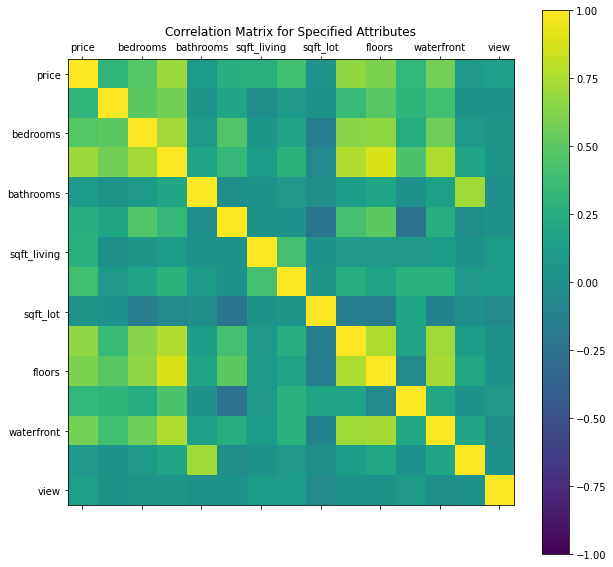

In [0]:
"""Grafica"""
def plot_corr_matrix(correlations,attr):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-1)
    fig.colorbar(cax)
    plt.show()

plot_corr_matrix(corrmatrix, df_1.columns)

In [0]:
df.display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement sqft_living15 sqft_lot15 renovated 415000.0 3 2.0 1510 36224 2.0 0 0 3 8 1510 0 1730 36224 0 268000.0 3 3.0 1550 8134 2.0 0 0 3 7 1550 0 1550 8134 0 750000.0 6 2.0 2750 9563 2.0 0 0 4 8 2750 0 2040 9563 0 429800.0 3 2.0 1970 7000 1.0 0 0 3 8 1970 0 1970 7365 0 711777.0 4 2.0 2220 6731 1.0 0 0 4 7 1110 1110 1600 6350 0 425000.0 4 1.0 1480 8321 1.0 0 0 3 7 1080 400 1580 8502 0 397500.0 3 3.0 1860 44093 1.0 0 0 3 7 1860 0 1900 6130 0 532500.0 2 1.0 820 3000 1.0 0 0 4 7 820 0 1490 3000 0 350000.0 4 3.0 2140 7095 2.0 0 0 3 8 2140 0 1600 7182 0 239975.0 3 3.0 1820 7242 1.0 0 0 3 7 1220 600 1350 8214 0 330000.0 3 3.0 1660 2890 2.0 0 0 3 7 1660 0 1540 2890 0 815000.0 3 3.0 2790 53143 2.0 0 0 4 9 2790 0 2740 47916 0 790000.0 4 3.0 3020 36893 2.0 0 0 3 9 3020 0 3020 36444 1 305000.0 3 3.0 1260 895 3.0 0 0 3 7 1160 100 1190 1095 0 255000.0 4 3.0 2163 5882 2.0 0 0 3 7 2163 0 1760 9600 0 467000.0 4 3.0 2220 7210 1.0 0 0 3 7 1270 950 2220 7313 0 331500.0 4 2.0 1700 14756 1.0 0 0 3 7 850 850 1680 10250 0 630000.0 3 3.0 2900 46609 2.0 0 0 3 9 2900 0 2570 42188 0 360000.0 4 3.0 2020 7289 2.0 0 0 3 7 2020 0 2090 7259 0 280000.0 2 1.0 790 13170 1.0 0 0 3 6 790 0 970 12700 0 445000.0 2 1.0 930 7740 1.0 0 0 1 5 930 0 1620 8584 0 415000.0 3 2.0 1410 4303 2.0 0 0 4 7 1410 0 1660 4326 0 875000.0 3 3.0 1690 10592 1.0 0 0 3 8 1690 0 2260 9945 1 351000.0 4 3.0 2370 7274 2.0 0 0 3 7 2370 0 2090 7656 0 937750.0 4 3.0 2580 3560 2.0 0 0 5 7 1710 870 1980 3800 0 555000.0 3 3.0 2690 4819 2.0 0 0 3 7 2690 0 2360 4829 0 1620000.0 4 2.0 2350 17709 2.0 0 0 4 9 2350 0 3360 19855 0 1387000.0 4 4.0 4010 10880 2.0 0 3 4 11 3150 860 3530 17310 0 610000.0 4 3.0 2110 6360 2.0 0 0 3 8 2110 0 2050 7000 0 510000.0 4 2.0 2210 5572 2.0 0 3 3 7 1760 450 1760 4713 0 675000.0 5 3.0 2570 12906 2.0 0 0 3 8 2570 0 2580 12927 0 685000.0 3 3.0 3290 90796 2.0 0 0 4 10 3290 0 2700 55023 0 790000.0 4 3.0 2650 5000 2.0 0 0 3 8 2650 0 1110 6250 0 570000.0 3 3.0 1550 1280 2.0 0 0 3 9 1220 330 1550 1579 0 538000.0 3 2.0 2570 7242 2.0 0 0 3 7 2170 400 1690 7639 1 885000.0 4 3.0 2830 5000 2.0 0 0 3 9 2830 0 1950 5000 0 238000.0 4 1.0 1400 7242 2.0 0 0 3 7 1400 0 1310 7314 0 620000.0 4 2.0 2400 5350 2.0 0 0 4 7 1460 940 1250 4880 0 475000.0 4 1.0 1420 6000 2.0 0 0 3 7 1420 0 1420 6180 0 1600000.0 3 3.0 3160 12824 1.0 0 2 4 9 1820 1340 3390 11985 0 210000.0 3 1.0 1200 7500 1.0 0 0 3 6 1200 0 1010 7000 1 294000.0 2 1.0 820 6366 1.0 0 0 5 6 820 0 1580 10169 0 535000.0 2 1.0 1520 3360 1.0 0 0 4 7 830 690 1470 3774 0 304000.0 3 1.0 1280 8184 2.0 0 0 4 6 1280 0 1120 8184 0 579100.0 2 1.0 1070 2754 1.0 0 0 3 7 830 240 1760 4080 0 562000.0 4 2.0 2060 4080 2.0 0 0 3 7 1460 600 1620 4080 1 372977.0 3 3.0 1690 1618 2.0 0 0 3 8 1150 540 1690 1618 0 340000.0 3 1.0 1450 9586 2.0 0 0 3 7 1450 0 1500 8592 0 438900.0 4 3.0 2740 5700 2.0 0 0 3 9 2740 0 3010 5281 0 221000.0 3 1.0 1150 7260 1.0 0 0 3 7 1150 0 1200 7888 0 700000.0 2 2.0 1679 577605 2.0 0 0 3 9 1679 0 1850 358934 0 1600000.0 4 4.0 4280 9583 2.0 0 0 3 11 4280 0 2360 10031 0 329000.0 3 1.0 1140 5258 2.0 0 0 3 6 1140 0 1140 5280 0 385000.0 3 4.0 1900 4805 2.0 0 0 3 8 1560 340 1360 4800 0 725000.0 4 3.0 3420 30410 2.0 0 0 3 9 3420 0 2940 45916 0 650000.0 4 3.0 3420 222156 2.0 0 0 3 9 3420 0 3340 222156 0 516200.0 3 2.0 2110 5150 1.0 0 0 5 6 1080 1030 1170 5107 0 1395710.0 4 2.0 3960 8640 2.0 0 2 3 9 2630 1330 3850 8640 0 800000.0 3 2.0 1890 10292 1.0 0 0 4 8 1890 0 2630 10625 0 335000.0 4 2.0 2030 13500 1.0 0 0 3 7 1230 800 1830 13800 0 260000.0 4 3.0 2110 8990 2.0 0 0 3 8 2110 0 2040 8800 0 577000.0 5 3.0 1940 5000 2.0 0 0 5 7 1940 0 1940 4230 0 445000.0 2 1.0 840 3840 1.0 0 0 4 7 840 0 1310 3840 0 565000.0 4 1.0 1540 2452 2.0 0 0 4 7 1540 0 1290 3360 0 737000.0 2 2.0 2290 9772 1.0 0 0 3 8 2290 0 1810 6077 0 280000.0 3 2.0 1358 1141 3.0 0 0 3 7 1358 0 1358 1196 0 475200.0 3 3.0 1670 3980 2.0 0 0 3 8 1670 0 1670 2897 0 242500.0 3 2.0 1550 1905

In [0]:
df.count(),len(df.columns)

Out[99]: (21434, 15)

In [0]:
"""Checkpoint, guardamos la data limpia"""
df.write.csv(f"/mnt/{generation}/output/data_limpia.csv",header=True,mode="overwrite")

Podemos ver que la amyoria de variables son de utilidad ahora solo faltaria ver la parte de outliers

# Eliminación de datos atipicos

In [0]:
train_data, test_data = df.randomSplit([0.7, 0.3]) #separamos las variables

In [0]:
train_data.display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement sqft_living15 sqft_lot15 renovated 75000.0 1 0.0 670 43377 1.0 0 0 3 3 670 0 1160 42882 0 78000.0 2 1.0 780 16344 1.0 0 0 1 5 780 0 1700 10387 0 81000.0 2 1.0 730 9975 1.0 0 0 1 5 730 0 860 9000 0 82500.0 2 1.0 520 22334 1.0 0 0 2 5 520 0 1572 10570 0 83000.0 2 1.0 900 8580 1.0 0 0 3 5 900 0 2060 6533 0 85000.0 2 1.0 830 9000 1.0 0 0 3 6 830 0 1160 7680 0 90000.0 1 1.0 560 4120 1.0 0 0 3 4 560 0 980 4120 0 90000.0 1 1.0 780 4000 1.0 0 0 3 5 780 0 1150 4000 0 90000.0 2 1.0 790 2640 1.0 0 0 3 7 790 0 1310 2064 0 92000.0 2 1.0 760 5500 2.0 0 0 3 5 760 0 1040 5515 0 95000.0 1 1.0 760 5746 1.0 0 0 4 5 760 0 970 6696 0 95000.0 2 1.0 800 8550 1.0 0 0 3 7 800 0 1490 8550 0 95000.0 2 1.0 960 7000 1.0 0 0 3 4 960 0 1850 8120 0 95000.0 2 1.0 1070 20450 1.0 0 0 2 6 1070 0 1360 15581 0 100000.0 2 1.0 660 5240 1.0 0 0 4 4 660 0 850 5080 0 100000.0 2 1.0 770 17334 1.0 0 0 3 7 770 0 1480 17334 0 100000.0 2 1.0 790 6426 1.0 0 0 3 6 790 0 1380 6946 0 100000.0 2 1.0 910 22000 1.0 0 0 3 6 910 0 1326 9891 0 100000.0 2 1.0 930 7623 1.0 0 0 2 6 930 0 1300 7641 0 102500.0 2 1.0 820 4320 1.0 0 0 3 5 820 0 780 7424 0 104950.0 2 1.0 1170 8254 1.0 0 0 2 6 1170 0 1820 8922 0 105000.0 3 1.0 840 8400 1.0 0 0 3 6 840 0 840 9450 0 105000.0 3 1.0 880 18109 1.0 0 0 4 6 880 0 940 11193 0 106000.0 1 1.0 560 5700 1.0 0 0 3 5 560 0 1120 5000 0 107000.0 2 1.0 670 4720 1.0 0 0 4 6 670 0 1480 4720 0 107000.0 3 2.0 910 5120 1.0 0 0 3 6 910 0 1410 5132 0 109500.0 2 1.0 800 10625 1.0 0 0 3 6 800 0 1130 10625 0 110000.0 1 1.0 640 10280 1.0 0 0 2 5 640 0 1090 9000 0 110000.0 2 1.0 760 4746 1.0 0 0 3 5 760 0 1360 7810 0 110000.0 2 1.0 800 15000 1.0 0 0 3 6 800 0 1170 15000 0 110000.0 2 1.0 828 4524 1.0 0 0 3 6 828 0 828 5402 1 110000.0 2 1.0 830 7590 1.0 0 0 2 6 830 0 980 7590 0 110000.0 3 1.0 1250 53143 1.0 0 0 5 6 1250 0 1820 217800 0 111300.0 2 1.0 1060 6000 1.0 0 0 4 5 1060 0 940 6000 0 112000.0 1 1.0 1080 3230 1.0 0 0 3 6 1080 0 1210 5760 0 114000.0 2 1.0 730 5200 1.0 0 0 3 6 730 0 1220 6240 0 114975.0 2 1.0 740 6250 1.0 0 0 3 6 740 0 980 6957 0 115000.0 1 2.0 1150 9812 1.0 0 0 4 7 1150 0 1200 9812 0 115000.0 2 1.0 550 7980 1.0 0 0 3 5 550 0 1330 7980 0 115000.0 2 1.0 790 7252 1.0 0 0 3 5 790 0 1260 11470 0 115000.0 2 1.0 940 6000 1.0 0 0 3 6 940 0 1310 6000 0 115000.0 2 1.0 1000 16524 1.0 0 0 3 5 1000 0 1350 10208 0 115000.0 3 2.0 1080 7942 1.0 0 0 3 7 1080 0 1380 8244 0 118000.0 1 1.0 670 7957 1.0 0 0 4 6 670 0 1600 7957 0 120000.0 2 1.0 990 39964 1.0 0 0 2 4 990 0 1560 8990 0 120000.0 3 1.0 1150 8924 1.0 0 0 3 6 1150 0 1492 8924 0 121800.0 2 1.0 940 8384 1.0 0 0 3 5 940 0 1290 8384 0 122000.0 2 1.0 730 6728 1.0 0 0 3 6 730 0 1170 7034 0 122000.0 2 1.0 740 6840 1.0 0 0 3 6 740 0 740 6840 0 122000.0 2 1.0 760 5280 1.0 0 0 3 6 760 0 1710 6594 0 122000.0 2 1.0 860 6000 1.0 0 0 3 6 860 0 1300 6000 0 123300.0 3 1.0 1150 8050 2.0 0 0 4 7 1150 0 1360 8050 0 124500.0 2 1.0 840 6480 1.0 0 0 4 5 840 0 1100 7300 0 125000.0 2 1.0 810 8382 1.0 0 0 4 5 810 0 1040 8382 0 125000.0 3 1.0 920 7276 1.0 0 0 4 6 920 0 1120 7276 0 125000.0 3 1.0 1230 4800 2.0 0 0 1 6 1230 0 1230 4800 0 126500.0 3 1.0 1130 12212 1.0 0 0 3 6 1130 0 1190 9240 0 128000.0 2 1.0 980 5393 1.0 0 0 3 6 980 0 980 5200 0 128000.0 3 1.0 1400 9690 1.0 0 0 3 7 1400 0 1280 9600 0 128750.0 3 1.0 880 7004 1.0 0 0 3 5 880 0 880 7828 0 129000.0 1 1.0 650 15364 1.0 0 0 4 5 650 0 1630 7952 0 129000.0 2 1.0 760 5240 1.0 0 0 3 6 760 0 980 5080 0 129000.0 2 1.0 1150 30184 1.0 0 0 3 6 1150 0 1670 19684 0 129888.0 2 1.0 710 9900 1.0 0 0 3 6 710 0 1070 9900 0 130000.0 2 1.0 600 1500 1.0 0 0 4 4 600 0 1130 6000 0 130000.0 2 1.0 790 7500 1.0 0 0 3 7 790 0 1560 7794 0 130000.0 2 1.0 840 6654 1.0 0 0 3 7 840 0 1350 5831 0 130000.0 2 1.0 880 9000 1.0 0 0 3 5 880 0 1410 10000 0 130000.0 3 1.0 1100 5100 1.0 0 0 4 7 1100 0 1450 5100 0 130000.0 3 1.0 1110 7520 1.0 0 0 4 7 1110 0 1440 8400 0 130000.0 3 1.0 1200 7000 2.0 0 0 1 7 1200 

In [0]:
"""Seleccionamos solo las variables continuas para detectar los outliers"""
train_data_cont = train_data.select(v_cont)
test_data_cont = test_data.select(v_cont)

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession, functions as F, types as T
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
vec_assembler = VectorAssembler(inputCols = v_cont, outputCol="features")
test_data_cont = vec_assembler.transform(test_data_cont) #aplicamos la tranformacion
train_data_cont = vec_assembler.transform(train_data_cont) #aplicamos la tranformacion
test_data_cont.display()

sqft_living sqft_lot sqft_above sqft_basement sqft_living15 sqft_lot15 features 430 5050 430 0 1200 7500 Map(vectorType -> dense, length -> 6, values -> List(430.0, 5050.0, 430.0, 0.0, 1200.0, 7500.0)) 700 20130 700 0 1490 18630 Map(vectorType -> dense, length -> 6, values -> List(700.0, 20130.0, 700.0, 0.0, 1490.0, 18630.0)) 910 9753 910 0 1160 7405 Map(vectorType -> dense, length -> 6, values -> List(910.0, 9753.0, 910.0, 0.0, 1160.0, 7405.0)) 900 4750 900 0 900 3404 Map(vectorType -> dense, length -> 6, values -> List(900.0, 4750.0, 900.0, 0.0, 900.0, 3404.0)) 570 4080 570 0 890 5100 Map(vectorType -> dense, length -> 6, values -> List(570.0, 4080.0, 570.0, 0.0, 890.0, 5100.0)) 980 2490 980 0 980 3154 Map(vectorType -> dense, length -> 6, values -> List(980.0, 2490.0, 980.0, 0.0, 980.0, 3154.0)) 960 8236 960 0 1260 8236 Map(vectorType -> dense, length -> 6, values -> List(960.0, 8236.0, 960.0, 0.0, 1260.0, 8236.0)) 1120 2685 860 260 1120 4838 Map(vectorType -> dense, length -> 6, values -> List(1120.0, 2685.0, 860.0, 260.0, 1120.0, 4838.0)) 580 6900 580 0 1570 5040 Map(vectorType -> dense, length -> 6, values -> List(580.0, 6900.0, 580.0, 0.0, 1570.0, 5040.0)) 600 6120 600 0 1060 6120 Map(vectorType -> dense, length -> 6, values -> List(600.0, 6120.0, 600.0, 0.0, 1060.0, 6120.0)) 790 8250 790 0 900 8250 Map(vectorType -> dense, length -> 6, values -> List(790.0, 8250.0, 790.0, 0.0, 900.0, 8250.0)) 680 8064 680 0 1340 10800 Map(vectorType -> dense, length -> 6, values -> List(680.0, 8064.0, 680.0, 0.0, 1340.0, 10800.0)) 1170 11000 1170 0 1590 10894 Map(vectorType -> dense, length -> 6, values -> List(1170.0, 11000.0, 1170.0, 0.0, 1590.0, 10894.0)) 700 3180 480 220 1760 6360 Map(vectorType -> dense, length -> 6, values -> List(700.0, 3180.0, 480.0, 220.0, 1760.0, 6360.0)) 1260 7500 1260 0 1260 7500 Map(vectorType -> dense, length -> 6, values -> List(1260.0, 7500.0, 1260.0, 0.0, 1260.0, 7500.0)) 1140 9628 1140 0 1510 9633 Map(vectorType -> dense, length -> 6, values -> List(1140.0, 9628.0, 1140.0, 0.0, 1510.0, 9633.0)) 1050 6600 1050 0 1330 6600 Map(vectorType -> dense, length -> 6, values -> List(1050.0, 6600.0, 1050.0, 0.0, 1330.0, 6600.0)) 1340 15600 1340 0 1320 9800 Map(vectorType -> dense, length -> 6, values -> List(1340.0, 15600.0, 1340.0, 0.0, 1320.0, 9800.0)) 500 7440 500 0 1350 7440 Map(vectorType -> dense, length -> 6, values -> List(500.0, 7440.0, 500.0, 0.0, 1350.0, 7440.0)) 610 4400 610 0 1090 4930 Map(vectorType -> dense, length -> 6, values -> List(610.0, 4400.0, 610.0, 0.0, 1090.0, 4930.0)) 910 11117 910 0 1490 8416 Map(vectorType -> dense, length -> 6, values -> List(910.0, 11117.0, 910.0, 0.0, 1490.0, 8416.0)) 780 5300 780 0 780 5300 Map(vectorType -> dense, length -> 6, values -> List(780.0, 5300.0, 780.0, 0.0, 780.0, 5300.0)) 1080 10500 1080 0 1200 9607 Map(vectorType -> dense, length -> 6, values -> List(1080.0, 10500.0, 1080.0, 0.0, 1200.0, 9607.0)) 900 2550 900 0 1120 2550 Map(vectorType -> dense, length -> 6, values -> List(900.0, 2550.0, 900.0, 0.0, 1120.0, 2550.0)) 980 5000 980 0 1040 5000 Map(vectorType -> dense, length -> 6, values -> List(980.0, 5000.0, 980.0, 0.0, 1040.0, 5000.0)) 790 13062 790 0 1240 7137 Map(vectorType -> dense, length -> 6, values -> List(790.0, 13062.0, 790.0, 0.0, 1240.0, 7137.0)) 830 7609 830 0 1170 7609 Map(vectorType -> dense, length -> 6, values -> List(830.0, 7609.0, 830.0, 0.0, 1170.0, 7609.0)) 1520 8450 1120 400 1320 8450 Map(vectorType -> dense, length -> 6, values -> List(1520.0, 8450.0, 1120.0, 400.0, 1320.0, 8450.0)) 1160 5082 580 580 1730 6000 Map(vectorType -> dense, length -> 6, values -> List(1160.0, 5082.0, 580.0, 580.0, 1730.0, 6000.0)) 900 6400 900 0 1350 6405 Map(vectorType -> dense, length -> 6, values -> List(900.0, 6400.0, 900.0, 0.0, 1350.0, 6405.0)) 1000 10560 1000 0 1190 9375 Map(vectorType -> dense, length -> 6, values -> List(1000.0, 10560.0, 1000.0, 0.0, 1190.0, 9375.0)) 1270 8991 1270 0 1270 8993 Map(vectorType -> dense, length -> 6, values -> L

In [0]:
import numpy as np
classifier = IsolationForest(contamination=0.05, random_state=42, n_jobs=-1) 
scaler = StandardScaler() #Instanciamos la estandarizacion
train = train_data_cont.select(v_cont)
x_train = train.toPandas() #Lo pasamos a formato pandas
x_train = scaler.fit_transform(x_train) #estandarizamos
clf_train = classifier.fit(x_train) #Aplicamos el insolation forest

In [0]:
x_train

Out[106]: array([[-1.54271251, 0.67097407, -1.35308278, -0.65726668, -1.20731634,
 1.1428597 ],
 [-1.42276632, 0.0289353 , -1.22069903, -0.65726668, -0.41930362,
 -0.08710966],
 [-1.47728732, -0.12232963, -1.28087346, -0.65726668, -1.64510119,
 -0.13960905],
 ...,
 [ 8.51095918, 0.3859006 , 8.50348932, 1.67324852, 3.72505962,
 1.13710634],
 [ 8.67452217, 0.52723795, 7.08337271, 4.68255456, 2.83489709,
 0.48300262],
 [10.86626622, 0.29626739, 8.15447761, 7.21670701, 2.84948992,
 -0.14717925]])

In [0]:
a = (list(clf_train.predict(x_train)))
a = [float(b) for b in a]

In [0]:
from pyspark.sql.types import FloatType
aux = spark.createDataFrame(a, FloatType())
aux.display()

value -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

In [0]:
from pyspark.sql.functions import monotonically_increasing_id, row_number
from pyspark.sql.window import Window
# since there is no common column between these two dataframes add row_index so that it can be joined
train_data_cont=train_data_cont.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
aux=aux.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
train_data_cont = train_data_cont.join(aux, on=["row_index"]).drop("row_index")
train_data_cont.show()

+-----------+--------+----------+-------------+-------------+----------+--------------------+-----+
sqft_living|sqft_lot|sqft_above|sqft_basement|sqft_living15|sqft_lot15| features|value|
+-----------+--------+----------+-------------+-------------+----------+--------------------+-----+
 670| 43377| 670| 0| 1160| 42882|[670.0,43377.0,67...| -1.0|
 780| 16344| 780| 0| 1700| 10387|[780.0,16344.0,78...| 1.0|
 730| 9975| 730| 0| 860| 9000|[730.0,9975.0,730...| 1.0|
 520| 22334| 520| 0| 1572| 10570|[520.0,22334.0,52...| 1.0|
 900| 8580| 900| 0| 2060| 6533|[900.0,8580.0,900...| 1.0|
 830| 9000| 830| 0| 1160| 7680|[830.0,9000.0,830...| 1.0|
 560| 4120| 560| 0| 980| 4120|[560.0,4120.0,560...| 1.0|
 780| 4000| 780| 0| 1150| 4000|[780.0,4000.0,780...| 1.0|
 790| 2640| 790| 0| 1310| 2064|[790.0,2640.0,790...| 1.0|
 760| 5500| 760| 0| 1040| 5515|[760.0,5500.0,760...| 1.0|
 760| 5746| 760| 0| 970| 6696|[760.0,5746.0,760...| 1.0|
 800| 8550| 800| 0| 1490| 8550|[800.0,8550.0,800...| 1.0|
 960| 7000| 960| 0| 1850| 8120|[960.0,7000.0,960...| 1.0|
 1070| 20450| 1070| 0| 1360| 15581|[1070.0,20450.0,1...| 1.0|
 660| 5240| 660| 0| 850| 5080|[660.0,5240.0,660...| 1.0|
 770| 17334| 770| 0| 1480| 17334|[770.0,17334.0,77...| 1.0|
 790| 6426| 790| 0| 1380| 6946|[790.0,6426.0,790...| 1.0|
 910| 22000| 910| 0| 1326| 9891|[910.0,22000.0,91...| 1.0|
 930| 7623| 930| 0| 1300| 7641|[930.0,7623.0,930...| 1.0|
 820| 4320| 820| 0| 780| 7424|[820.0,4320.0,820...| 1.0|
+-----------+--------+----------+-------------+-------------+----------+--------------------+-----+
only showing top 20 rows

In [0]:
train_data_cont.groupby("value").count().display()

value count -1.0 750 1.0 14250

In [0]:
train_data_cont.count()

Out[111]: 15000

In [0]:
train_data.count()

Out[112]: 15000

In [0]:
test_data.count()

Out[113]: 6434

In [0]:
test_data.count()+train_data.count()

Out[114]: 21434

In [0]:
df.count()

Out[115]: 21434

In [0]:
train_data=train_data.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
aux=aux.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
train_data = train_data.join(aux, on=["row_index"]).drop("row_index")
train_data.show()

+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+-------------+----------+---------+-----+
 price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|sqft_living15|sqft_lot15|renovated|value|
+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+-------------+----------+---------+-----+
 75000.0| 1| 0.0| 670| 43377| 1.0| 0| 0| 3| 3| 670| 0| 1160| 42882| 0| -1.0|
 78000.0| 2| 1.0| 780| 16344| 1.0| 0| 0| 1| 5| 780| 0| 1700| 10387| 0| 1.0|
 81000.0| 2| 1.0| 730| 9975| 1.0| 0| 0| 1| 5| 730| 0| 860| 9000| 0| 1.0|
 82500.0| 2| 1.0| 520| 22334| 1.0| 0| 0| 2| 5| 520| 0| 1572| 10570| 0| 1.0|
 83000.0| 2| 1.0| 900| 8580| 1.0| 0| 0| 3| 5| 900| 0| 2060| 6533| 0| 1.0|
 85000.0| 2| 1.0| 830| 9000| 1.0| 0| 0| 3| 6| 830| 0| 1160| 7680| 0| 1.0|
 90000.0| 1| 1.0| 560| 4120| 1.0| 0| 0| 3| 4| 560| 0| 980| 4120| 0| 1.0|
 90000.0| 1| 1.0| 780| 4000| 1.0| 0| 0| 3| 5| 780| 0| 1150| 4000| 0| 1.0|
 90000.0| 2| 1.0| 790| 2640| 1.0| 0| 0| 3| 7| 790| 0| 1310| 2064| 0| 1.0|
 92000.0| 2| 1.0| 760| 5500| 2.0| 0| 0| 3| 5| 760| 0| 1040| 5515| 0| 1.0|
 95000.0| 1| 1.0| 760| 5746| 1.0| 0| 0| 4| 5| 760| 0| 970| 6696| 0| 1.0|
 95000.0| 2| 1.0| 800| 8550| 1.0| 0| 0| 3| 7| 800| 0| 1490| 8550| 0| 1.0|
 95000.0| 2| 1.0| 960| 7000| 1.0| 0| 0| 3| 4| 960| 0| 1850| 8120| 0| 1.0|
 95000.0| 2| 1.0| 1070| 20450| 1.0| 0| 0| 2| 6| 1070| 0| 1360| 15581| 0| 1.0|
100000.0| 2| 1.0| 660| 5240| 1.0| 0| 0| 4| 4| 660| 0| 850| 5080| 0| 1.0|
100000.0| 2| 1.0| 770| 17334| 1.0| 0| 0| 3| 7| 770| 0| 1480| 17334| 0| 1.0|
100000.0| 2| 1.0| 790| 6426| 1.0| 0| 0| 3| 6| 790| 0| 1380| 6946| 0| 1.0|
100000.0| 2| 1.0| 910| 22000| 1.0| 0| 0| 3| 6| 910| 0| 1326| 9891| 0| 1.0|
100000.0| 2| 1.0| 930| 7623| 1.0| 0| 0| 2| 6| 930| 0| 1300| 7641| 0| 1.0|
102500.0| 2| 1.0| 820| 4320| 1.0| 0| 0| 3| 5| 820| 0| 780| 7424| 0| 1.0|
+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+-------------+----------+---------+-----+
only showing top 20 rows

In [0]:
train_data = train_data.filter(train_data["value"]==1.0)
train_data.display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement sqft_living15 sqft_lot15 renovated value 78000.0 2 1.0 780 16344 1.0 0 0 1 5 780 0 1700 10387 0 1.0 81000.0 2 1.0 730 9975 1.0 0 0 1 5 730 0 860 9000 0 1.0 82500.0 2 1.0 520 22334 1.0 0 0 2 5 520 0 1572 10570 0 1.0 83000.0 2 1.0 900 8580 1.0 0 0 3 5 900 0 2060 6533 0 1.0 85000.0 2 1.0 830 9000 1.0 0 0 3 6 830 0 1160 7680 0 1.0 90000.0 1 1.0 560 4120 1.0 0 0 3 4 560 0 980 4120 0 1.0 90000.0 1 1.0 780 4000 1.0 0 0 3 5 780 0 1150 4000 0 1.0 90000.0 2 1.0 790 2640 1.0 0 0 3 7 790 0 1310 2064 0 1.0 92000.0 2 1.0 760 5500 2.0 0 0 3 5 760 0 1040 5515 0 1.0 95000.0 1 1.0 760 5746 1.0 0 0 4 5 760 0 970 6696 0 1.0 95000.0 2 1.0 800 8550 1.0 0 0 3 7 800 0 1490 8550 0 1.0 95000.0 2 1.0 960 7000 1.0 0 0 3 4 960 0 1850 8120 0 1.0 95000.0 2 1.0 1070 20450 1.0 0 0 2 6 1070 0 1360 15581 0 1.0 100000.0 2 1.0 660 5240 1.0 0 0 4 4 660 0 850 5080 0 1.0 100000.0 2 1.0 770 17334 1.0 0 0 3 7 770 0 1480 17334 0 1.0 100000.0 2 1.0 790 6426 1.0 0 0 3 6 790 0 1380 6946 0 1.0 100000.0 2 1.0 910 22000 1.0 0 0 3 6 910 0 1326 9891 0 1.0 100000.0 2 1.0 930 7623 1.0 0 0 2 6 930 0 1300 7641 0 1.0 102500.0 2 1.0 820 4320 1.0 0 0 3 5 820 0 780 7424 0 1.0 104950.0 2 1.0 1170 8254 1.0 0 0 2 6 1170 0 1820 8922 0 1.0 105000.0 3 1.0 840 8400 1.0 0 0 3 6 840 0 840 9450 0 1.0 105000.0 3 1.0 880 18109 1.0 0 0 4 6 880 0 940 11193 0 1.0 106000.0 1 1.0 560 5700 1.0 0 0 3 5 560 0 1120 5000 0 1.0 107000.0 2 1.0 670 4720 1.0 0 0 4 6 670 0 1480 4720 0 1.0 107000.0 3 2.0 910 5120 1.0 0 0 3 6 910 0 1410 5132 0 1.0 109500.0 2 1.0 800 10625 1.0 0 0 3 6 800 0 1130 10625 0 1.0 110000.0 1 1.0 640 10280 1.0 0 0 2 5 640 0 1090 9000 0 1.0 110000.0 2 1.0 760 4746 1.0 0 0 3 5 760 0 1360 7810 0 1.0 110000.0 2 1.0 800 15000 1.0 0 0 3 6 800 0 1170 15000 0 1.0 110000.0 2 1.0 828 4524 1.0 0 0 3 6 828 0 828 5402 1 1.0 110000.0 2 1.0 830 7590 1.0 0 0 2 6 830 0 980 7590 0 1.0 111300.0 2 1.0 1060 6000 1.0 0 0 4 5 1060 0 940 6000 0 1.0 112000.0 1 1.0 1080 3230 1.0 0 0 3 6 1080 0 1210 5760 0 1.0 114000.0 2 1.0 730 5200 1.0 0 0 3 6 730 0 1220 6240 0 1.0 114975.0 2 1.0 740 6250 1.0 0 0 3 6 740 0 980 6957 0 1.0 115000.0 1 2.0 1150 9812 1.0 0 0 4 7 1150 0 1200 9812 0 1.0 115000.0 2 1.0 550 7980 1.0 0 0 3 5 550 0 1330 7980 0 1.0 115000.0 2 1.0 790 7252 1.0 0 0 3 5 790 0 1260 11470 0 1.0 115000.0 2 1.0 940 6000 1.0 0 0 3 6 940 0 1310 6000 0 1.0 115000.0 2 1.0 1000 16524 1.0 0 0 3 5 1000 0 1350 10208 0 1.0 115000.0 3 2.0 1080 7942 1.0 0 0 3 7 1080 0 1380 8244 0 1.0 118000.0 1 1.0 670 7957 1.0 0 0 4 6 670 0 1600 7957 0 1.0 120000.0 2 1.0 990 39964 1.0 0 0 2 4 990 0 1560 8990 0 1.0 120000.0 3 1.0 1150 8924 1.0 0 0 3 6 1150 0 1492 8924 0 1.0 121800.0 2 1.0 940 8384 1.0 0 0 3 5 940 0 1290 8384 0 1.0 122000.0 2 1.0 730 6728 1.0 0 0 3 6 730 0 1170 7034 0 1.0 122000.0 2 1.0 740 6840 1.0 0 0 3 6 740 0 740 6840 0 1.0 122000.0 2 1.0 760 5280 1.0 0 0 3 6 760 0 1710 6594 0 1.0 122000.0 2 1.0 860 6000 1.0 0 0 3 6 860 0 1300 6000 0 1.0 123300.0 3 1.0 1150 8050 2.0 0 0 4 7 1150 0 1360 8050 0 1.0 124500.0 2 1.0 840 6480 1.0 0 0 4 5 840 0 1100 7300 0 1.0 125000.0 2 1.0 810 8382 1.0 0 0 4 5 810 0 1040 8382 0 1.0 125000.0 3 1.0 920 7276 1.0 0 0 4 6 920 0 1120 7276 0 1.0 125000.0 3 1.0 1230 4800 2.0 0 0 1 6 1230 0 1230 4800 0 1.0 126500.0 3 1.0 1130 12212 1.0 0 0 3 6 1130 0 1190 9240 0 1.0 128000.0 2 1.0 980 5393 1.0 0 0 3 6 980 0 980 5200 0 1.0 128000.0 3 1.0 1400 9690 1.0 0 0 3 7 1400 0 1280 9600 0 1.0 128750.0 3 1.0 880 7004 1.0 0 0 3 5 880 0 880 7828 0 1.0 129000.0 1 1.0 650 15364 1.0 0 0 4 5 650 0 1630 7952 0 1.0 129000.0 2 1.0 760 5240 1.0 0 0 3 6 760 0 980 5080 0 1.0 129000.0 2 1.0 1150 30184 1.0 0 0 3 6 1150 0 1670 19684 0 1.0 129888.0 2 1.0 710 9900 1.0 0 0 3 6 710 0 1070 9900 0 1.0 130000.0 2 1.0 600 1500 1.0 0 0 4 4 600 0 1130 6000 0 1.0 130000.0 2 1.0 790 7500 1.0 0 0 3 7 790 0 1560 7794 0 1.0 130000.0 2 1.0 840 6654 1.0 0 0 3 7 840 0 1350 5831 0 1.0 130000.0 2 1.0 880 9000 1.0 0 0 3 5 880 0 1410 10000 0 1.

In [0]:
train_data.count()

Out[118]: 14250

In [0]:
#Aplicamos el mismo procedamiento para la porcion de validacion
test = test_data_cont.select(v_cont)
x_test = test.toPandas() #Lo pasamos a formato pandas
x_test = scaler.fit_transform(x_test) #estandarizamos
clf_test = classifier.fit(x_test) #Aplicamos el insolation forest
x_test

Out[119]: array([[-1.78360595, -0.25158656, -1.64101108, -0.66277565, -1.15128583,
 -0.18705805],
 [-1.49133487, 0.1236274 , -1.31358323, -0.66277565, -0.72899391,
 0.19042419],
 [-1.26401292, -0.13456857, -1.05891712, -0.66277565, -1.20953299,
 -0.19028004],
 ...,
 [ 5.41492238, 0.03512368, 4.82265732, 2.30787606, 1.67370148,
 0.10109012],
 [ 5.80461714, 0.1587104 , 4.56799121, 3.59065747, 4.00358792,
 0.2141313 ],
 [ 6.42163385, 0.75529562, 5.10157734, 3.88322165, 2.0959934 ,
 0.46710884]])

In [0]:
a = (list(clf_test.predict(x_test)))
a = [float(b) for b in a]
aux = spark.createDataFrame(a, FloatType())
aux.display()

value 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1

In [0]:
test_data_cont=test_data_cont.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
aux=aux.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
test_data_cont = test_data_cont.join(aux, on=["row_index"]).drop("row_index")
test_data_cont.show()

+-----------+--------+----------+-------------+-------------+----------+--------------------+-----+
sqft_living|sqft_lot|sqft_above|sqft_basement|sqft_living15|sqft_lot15| features|value|
+-----------+--------+----------+-------------+-------------+----------+--------------------+-----+
 430| 5050| 430| 0| 1200| 7500|[430.0,5050.0,430...| 1.0|
 700| 20130| 700| 0| 1490| 18630|[700.0,20130.0,70...| 1.0|
 910| 9753| 910| 0| 1160| 7405|[910.0,9753.0,910...| 1.0|
 900| 4750| 900| 0| 900| 3404|[900.0,4750.0,900...| 1.0|
 570| 4080| 570| 0| 890| 5100|[570.0,4080.0,570...| 1.0|
 980| 2490| 980| 0| 980| 3154|[980.0,2490.0,980...| 1.0|
 960| 8236| 960| 0| 1260| 8236|[960.0,8236.0,960...| 1.0|
 1120| 2685| 860| 260| 1120| 4838|[1120.0,2685.0,86...| 1.0|
 580| 6900| 580| 0| 1570| 5040|[580.0,6900.0,580...| 1.0|
 600| 6120| 600| 0| 1060| 6120|[600.0,6120.0,600...| 1.0|
 790| 8250| 790| 0| 900| 8250|[790.0,8250.0,790...| 1.0|
 680| 8064| 680| 0| 1340| 10800|[680.0,8064.0,680...| 1.0|
 1170| 11000| 1170| 0| 1590| 10894|[1170.0,11000.0,1...| 1.0|
 700| 3180| 480| 220| 1760| 6360|[700.0,3180.0,480...| 1.0|
 1260| 7500| 1260| 0| 1260| 7500|[1260.0,7500.0,12...| 1.0|
 1140| 9628| 1140| 0| 1510| 9633|[1140.0,9628.0,11...| 1.0|
 1050| 6600| 1050| 0| 1330| 6600|[1050.0,6600.0,10...| 1.0|
 1340| 15600| 1340| 0| 1320| 9800|[1340.0,15600.0,1...| 1.0|
 500| 7440| 500| 0| 1350| 7440|[500.0,7440.0,500...| 1.0|
 610| 4400| 610| 0| 1090| 4930|[610.0,4400.0,610...| 1.0|
+-----------+--------+----------+-------------+-------------+----------+--------------------+-----+
only showing top 20 rows

In [0]:
test_data_cont.groupby("value").count().display()

value count 1.0 6112 -1.0 322

In [0]:
test_data=test_data.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
aux=aux.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
test_data = test_data.join(aux, on=["row_index"]).drop("row_index")
test_data.show()

+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+-------------+----------+---------+-----+
 price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|sqft_living15|sqft_lot15|renovated|value|
+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+-------------+----------+---------+-----+
 80000.0| 1| 1.0| 430| 5050| 1.0| 0| 0| 2| 4| 430| 0| 1200| 7500| 0| 1.0|
 84000.0| 2| 1.0| 700| 20130| 1.0| 0| 0| 3| 6| 700| 0| 1490| 18630| 0| 1.0|
 85000.0| 2| 1.0| 910| 9753| 1.0| 0| 0| 3| 5| 910| 0| 1160| 7405| 0| 1.0|
 89000.0| 3| 1.0| 900| 4750| 1.0| 0| 0| 4| 6| 900| 0| 900| 3404| 0| 1.0|
 89950.0| 1| 1.0| 570| 4080| 1.0| 0| 0| 3| 5| 570| 0| 890| 5100| 0| 1.0|
 90000.0| 3| 1.0| 980| 2490| 2.0| 0| 0| 4| 6| 980| 0| 980| 3154| 0| 1.0|
 99000.0| 2| 1.0| 960| 8236| 1.0| 0| 0| 2| 6| 960| 0| 1260| 8236| 0| 1.0|
100000.0| 4| 1.0| 1120| 2685| 1.0| 0| 0| 3| 5| 860| 260| 1120| 4838| 0| 1.0|
109000.0| 2| 1.0| 580| 6900| 1.0| 0| 0| 3| 5| 580| 0| 1570| 5040| 0| 1.0|
110000.0| 2| 1.0| 600| 6120| 1.0| 0| 0| 3| 5| 600| 0| 1060| 6120| 0| 1.0|
110000.0| 2| 1.0| 790| 8250| 1.0| 0| 0| 3| 6| 790| 0| 900| 8250| 0| 1.0|
110700.0| 2| 1.0| 680| 8064| 1.0| 0| 0| 3| 6| 680| 0| 1340| 10800| 0| 1.0|
119500.0| 3| 1.0| 1170| 11000| 1.0| 0| 0| 2| 6| 1170| 0| 1590| 10894| 0| 1.0|
119900.0| 2| 1.0| 700| 3180| 1.0| 0| 0| 3| 6| 480| 220| 1760| 6360| 0| 1.0|
120000.0| 3| 1.0| 1260| 7500| 1.0| 0| 0| 3| 6| 1260| 0| 1260| 7500| 0| 1.0|
120750.0| 3| 2.0| 1140| 9628| 1.0| 0| 0| 4| 7| 1140| 0| 1510| 9633| 0| 1.0|
123000.0| 2| 1.0| 1050| 6600| 2.0| 0| 0| 3| 6| 1050| 0| 1330| 6600| 0| 1.0|
124740.0| 3| 1.0| 1340| 15600| 1.0| 0| 0| 4| 6| 1340| 0| 1320| 9800| 0| 1.0|
125000.0| 1| 1.0| 500| 7440| 1.0| 0| 0| 1| 5| 500| 0| 1350| 7440| 0| 1.0|
126000.0| 1| 1.0| 610| 4400| 1.0| 0| 0| 3| 5| 610| 0| 1090| 4930| 0| 1.0|
+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+-------------+----------+---------+-----+
only showing top 20 rows

In [0]:
test_data = test_data.filter(test_data["value"]==1.0)
test_data.display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement sqft_living15 sqft_lot15 renovated value 80000.0 1 1.0 430 5050 1.0 0 0 2 4 430 0 1200 7500 0 1.0 84000.0 2 1.0 700 20130 1.0 0 0 3 6 700 0 1490 18630 0 1.0 85000.0 2 1.0 910 9753 1.0 0 0 3 5 910 0 1160 7405 0 1.0 89000.0 3 1.0 900 4750 1.0 0 0 4 6 900 0 900 3404 0 1.0 89950.0 1 1.0 570 4080 1.0 0 0 3 5 570 0 890 5100 0 1.0 90000.0 3 1.0 980 2490 2.0 0 0 4 6 980 0 980 3154 0 1.0 99000.0 2 1.0 960 8236 1.0 0 0 2 6 960 0 1260 8236 0 1.0 100000.0 4 1.0 1120 2685 1.0 0 0 3 5 860 260 1120 4838 0 1.0 109000.0 2 1.0 580 6900 1.0 0 0 3 5 580 0 1570 5040 0 1.0 110000.0 2 1.0 600 6120 1.0 0 0 3 5 600 0 1060 6120 0 1.0 110000.0 2 1.0 790 8250 1.0 0 0 3 6 790 0 900 8250 0 1.0 110700.0 2 1.0 680 8064 1.0 0 0 3 6 680 0 1340 10800 0 1.0 119500.0 3 1.0 1170 11000 1.0 0 0 2 6 1170 0 1590 10894 0 1.0 119900.0 2 1.0 700 3180 1.0 0 0 3 6 480 220 1760 6360 0 1.0 120000.0 3 1.0 1260 7500 1.0 0 0 3 6 1260 0 1260 7500 0 1.0 120750.0 3 2.0 1140 9628 1.0 0 0 4 7 1140 0 1510 9633 0 1.0 123000.0 2 1.0 1050 6600 2.0 0 0 3 6 1050 0 1330 6600 0 1.0 124740.0 3 1.0 1340 15600 1.0 0 0 4 6 1340 0 1320 9800 0 1.0 125000.0 1 1.0 500 7440 1.0 0 0 1 5 500 0 1350 7440 0 1.0 126000.0 1 1.0 610 4400 1.0 0 0 3 5 610 0 1090 4930 0 1.0 128000.0 3 1.0 910 11117 1.0 0 0 3 7 910 0 1490 8416 0 1.0 130000.0 2 1.0 780 5300 1.0 0 0 3 6 780 0 780 5300 0 1.0 132500.0 3 1.0 1080 10500 1.0 0 0 3 7 1080 0 1200 9607 0 1.0 133400.0 3 1.0 900 2550 1.0 0 0 4 6 900 0 1120 2550 0 1.0 134000.0 2 2.0 980 5000 2.0 0 0 3 7 980 0 1040 5000 1 1.0 135000.0 1 1.0 790 13062 1.0 0 0 3 6 790 0 1240 7137 0 1.0 135000.0 2 1.0 830 7609 1.0 0 0 3 6 830 0 1170 7609 0 1.0 135000.0 3 1.0 1520 8450 1.0 0 0 2 6 1120 400 1320 8450 0 1.0 137900.0 3 2.0 1160 5082 1.0 0 0 3 6 580 580 1730 6000 0 1.0 140000.0 2 1.0 900 6400 1.0 0 0 2 6 900 0 1350 6405 0 1.0 140000.0 3 1.0 1000 10560 1.0 0 0 3 7 1000 0 1190 9375 0 1.0 140000.0 3 2.0 1270 8991 2.0 0 0 3 7 1270 0 1270 8993 0 1.0 142500.0 1 1.0 690 6825 1.0 0 0 4 5 690 0 1330 5381 0 1.0 142500.0 4 1.0 1440 13300 1.0 0 0 3 6 1440 0 1460 11100 0 1.0 144975.0 2 1.0 900 7500 1.0 0 0 3 5 900 0 1350 7500 0 1.0 145000.0 3 1.0 1010 5490 1.0 0 0 3 6 1010 0 1740 10658 0 1.0 147000.0 3 1.0 1070 14000 1.0 0 0 3 7 1070 0 920 12500 0 1.0 147500.0 3 2.0 1010 6552 1.0 0 0 3 7 1010 0 1010 6552 0 1.0 148226.0 3 1.0 1400 7360 1.0 0 0 4 7 1400 0 1600 8030 0 1.0 149000.0 3 1.0 1090 2800 1.0 0 0 3 6 1090 0 1040 2960 0 1.0 149900.0 2 2.0 1090 1950 1.0 0 0 4 8 1090 0 1360 3426 0 1.0 150000.0 2 1.0 720 4120 1.0 0 0 5 5 720 0 940 6180 0 1.0 150000.0 2 1.0 820 10270 1.0 0 0 3 7 820 0 1670 10086 0 1.0 150000.0 3 1.0 1240 5200 1.0 0 0 3 6 1240 0 870 5200 0 1.0 150000.0 3 1.0 1320 8220 1.0 0 0 3 7 1320 0 1320 7920 0 1.0 150000.0 3 1.0 1450 6776 1.0 0 0 3 7 1450 0 1680 7200 0 1.0 150550.0 4 1.0 1470 6061 2.0 0 0 3 7 1470 0 1230 6175 0 1.0 152000.0 3 1.0 1090 3264 1.0 0 0 4 6 1090 0 1090 3330 0 1.0 153000.0 2 1.0 1140 10152 1.0 0 0 3 6 760 380 1340 10141 0 1.0 153000.0 3 1.0 1200 10500 1.0 0 0 3 7 1200 0 1350 10500 0 1.0 154500.0 3 1.0 890 9465 1.0 0 0 3 6 890 0 1590 9147 0 1.0 154950.0 4 1.0 1600 10183 1.0 0 0 4 6 1600 0 1410 10416 0 1.0 155000.0 2 1.0 810 4755 1.0 0 0 3 7 810 0 1180 4755 0 1.0 155000.0 2 1.0 910 6232 1.0 0 0 3 6 910 0 1070 6232 0 1.0 155000.0 3 1.0 1250 6250 1.0 0 0 2 7 1030 220 1130 6250 0 1.0 156000.0 2 2.0 590 6138 1.0 0 0 2 5 590 0 1360 7112 0 1.0 156000.0 3 1.0 970 8580 1.0 0 0 3 7 970 0 1430 11907 0 1.0 156601.0 2 2.0 1210 9750 1.0 0 0 3 7 1210 0 1650 9750 0 1.0 157000.0 1 1.0 870 26326 1.0 0 0 3 6 870 0 1250 10608 0 1.0 159075.0 4 2.0 1580 6200 1.0 0 0 3 6 790 790 1320 6499 0 1.0 159100.0 2 1.0 790 7095 1.0 0 0 3 6 790 0 1150 7200 0 1.0 159995.0 2 1.0 1000 5026 1.0 0 0 5 5 760 240 990 5026 0 1.0 160000.0 2 1.0 830 4500 1.0 0 0 3 6 830 0 1092 5350 0 1.0 160000.0 2 1.0 1020 13647 1.0 0 0 5 6 1020 0 980 8250 1 1.0 160000.0 2 1.0 1040 13100 1.0 0 0 5 6 1040 0 910 5080 

In [0]:
test_data.count()

Out[125]: 6112

In [0]:
"""Checkpoint, guardamos la data de entrenamiento y prueba"""
train_data.write.csv(f"/mnt/{generation}/output/train.csv",header=True,mode="overwrite")
test_data.write.csv(f"/mnt/{generation}/output/test.csv",header=True,mode="overwrite")

In [0]:
train_data.select(v_target[0]).display()

price 78000.0 81000.0 82500.0 83000.0 85000.0 90000.0 90000.0 90000.0 92000.0 95000.0 95000.0 95000.0 95000.0 100000.0 100000.0 100000.0 100000.0 100000.0 102500.0 104950.0 105000.0 105000.0 106000.0 107000.0 107000.0 109500.0 110000.0 110000.0 110000.0 110000.0 110000.0 111300.0 112000.0 114000.0 114975.0 115000.0 115000.0 115000.0 115000.0 115000.0 115000.0 118000.0 120000.0 120000.0 121800.0 122000.0 122000.0 122000.0 122000.0 123300.0 124500.0 125000.0 125000.0 125000.0 126500.0 128000.0 128000.0 128750.0 129000.0 129000.0 129000.0 129888.0 130000.0 130000.0 130000.0 130000.0 130000.0 130000.0 130000.0 132500.0 132825.0 133000.0 134000.0 135000.0 135000.0 135000.0 135000.0 135000.0 135000.0 135000.0 135900.0 136500.0 137000.0 137000.0 137124.0 139000.0 139000.0 139000.0 139500.0 139950.0 140000.0 140000.0 140000.0 140000.0 140000.0 140000.0 141800.0 142000.0 143000.0 144000.0 144000.0 145000.0 145000.0 145600.0 146000.0 146000.0 146300.0 147000.0 147200.0 147400.0 147500.0 147500.0 148000.0 148000.0 148900.0 149000.0 149500.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 150000.0 151000.0 151000.0 151600.0 152000.0 152000.0 152000.0 152000.0 152275.0 152500.0 152900.0 153000.0 153000.0 153500.0 153503.0 154000.0 154000.0 154200.0 155000.0 155000.0 155000.0 155000.0 155000.0 156000.0 156000.0 156000.0 156000.0 157000.0 157340.0 157500.0 157500.0 157500.0 158000.0 158000.0 158000.0 158000.0 158550.0 158800.0 159000.0 159000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160134.0 160797.0 161700.0 162000.0 162248.0 162950.0 163000.0 163250.0 163500.0 163800.0 164000.0 164000.0 165000.0 165000.0 165000.0 165000.0 165000.0 165000.0 165000.0 165000.0 165000.0 165000.0 165000.0 165050.0 166600.0 166950.0 167000.0 167000.0 168000.0 168000.0 168000.0 168000.0 169000.0 169000.0 169317.0 169500.0 169500.0 169900.0 169950.0 169950.0 170000.0 170000.0 170000.0 170000.0 170000.0 170000.0 170000.0 170000.0 170000.0 170000.0 170000.0 170000.0 170000.0 170000.0 170000.0 170000.0 170500.0 170500.0 171500.0 171800.0 172000.0 172000.0 172000.0 172040.0 172380.0 172500.0 173000.0 173250.0 174000.0 174000.0 174500.0 174500.0 174900.0 174950.0 174950.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 176000.0 176000.0 176000.0 176000.0 176250.0 177000.0 177000.0 178000.0 178000.0 178000.0 178500.0 178500.0 178500.0 179000.0 179000.0 179000.0 179500.0 179500.0 179900.0 179900.0 179900.0 179950.0 179950.0 179950.0 179950.0 179950.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180000.0 180250.0 180500.0 180500.0 181000.0 181000.0 182000.0 182000.0 182200.0 182500.0 182500.0 182500.0 183000.0 183000.0 183000.0 183000.0 183000.0 183500.0 183750.0 183750.0 184000.0 184000.0 184000.0 184500.0 184500.0 184900.0 184900.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185850.0 185900.0 186000.0 186950.0 187000.0 187000.0 187000.0 187250.0 187500.0 187500.0 188000.0 188000.0 188000.0 189000.0 189000.0 189000.0 189000.0 189000.0 189650.0 189900.0 189950.0 189950.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190500.0 190500.0 191000.0 191000.0 192000.0 192000.0 192000.0 192500.0 192950.0 193000.0 193000.0 193000.0 193000.0 194000.0 194000.0 194000.0 194820.0 194900.0 194990.0 195000.0 19

In [0]:
test_data.select(v_target[0]).display()

price 80000.0 84000.0 85000.0 89000.0 89950.0 90000.0 99000.0 100000.0 109000.0 110000.0 110000.0 110700.0 119500.0 119900.0 120000.0 120750.0 123000.0 124740.0 125000.0 126000.0 128000.0 130000.0 132500.0 133400.0 134000.0 135000.0 135000.0 135000.0 137900.0 140000.0 140000.0 140000.0 142500.0 142500.0 144975.0 145000.0 147000.0 147500.0 148226.0 149000.0 149900.0 150000.0 150000.0 150000.0 150000.0 150000.0 150550.0 152000.0 153000.0 153000.0 154500.0 154950.0 155000.0 155000.0 155000.0 156000.0 156000.0 156601.0 157000.0 159075.0 159100.0 159995.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 160000.0 161500.0 162000.0 162000.0 162500.0 162500.0 163000.0 163500.0 164808.0 165000.0 165000.0 165000.0 165000.0 165000.0 166000.0 166000.0 166000.0 167000.0 167500.0 168500.0 168500.0 169000.0 169000.0 170000.0 170000.0 170000.0 170000.0 170000.0 171000.0 172500.0 172500.0 173000.0 173000.0 173250.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175000.0 175003.0 175409.0 176500.0 177500.0 178000.0 178500.0 178500.0 179000.0 179950.0 180000.0 180000.0 180000.0 180000.0 181100.0 182000.0 182568.0 183000.0 183000.0 183500.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 185000.0 186000.0 186000.0 186375.0 187000.0 187000.0 187000.0 187300.0 188000.0 188200.0 188500.0 189000.0 189000.0 189900.0 189950.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190000.0 190848.0 191000.0 191000.0 191000.0 191950.0 192500.0 192500.0 192500.0 193000.0 193000.0 193000.0 193500.0 194000.0 194000.0 194000.0 194000.0 194000.0 194250.0 195000.0 195000.0 195000.0 195000.0 195000.0 195000.0 195700.0 196900.0 197000.0 197000.0 197500.0 197500.0 198000.0 199000.0 199000.0 199000.0 199500.0 199950.0 199950.0 199950.0 199950.0 199950.0 199990.0 199990.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200000.0 200500.0 200500.0 201000.0 201000.0 201000.0 201500.0 202000.0 203000.0 203000.0 203700.0 204000.0 204000.0 204250.0 204950.0 204995.0 205000.0 205000.0 205000.0 205000.0 205000.0 205000.0 205000.0 205000.0 205000.0 205000.0 205000.0 205000.0 206000.0 206000.0 206000.0 206000.0 206000.0 206135.0 206600.0 206990.0 207000.0 207000.0 207500.0 208000.0 208000.0 208000.0 208000.0 208000.0 208000.0 208000.0 209000.0 209000.0 209900.0 209950.0 209950.0 209950.0 209950.0 209950.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 210000.0 212000.0 212000.0 212000.0 212000.0 212000.0 212500.0 213000.0 213000.0 213000.0 213400.0 213500.0 213550.0 213675.0 213800.0 213950.0 214100.0 214950.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215000.0 215150.0 216000.0 216000.0 216600.0 216650.0 217000.0 217000.0 217000.0 217450.0 218000.0 218000.0 218000.0 218000.0 218000.0 218000.0 218500.0 219000.0 219000.0 219900.0 219900.0 219900.0 219950.0 219950.0 219950.0 219950.0 220000.0 220000.0 220000.0 220000.0 220000.0 220000.0 220000.0 220000.0 220000.0 220000.0 220000.0 220000.0 220000.0 220000.0 220000.0 221000.0 221000.0 221000.0 221000.0 221000.0 221700.0 221900.0 222000.0 222000.0 222000.0 222500.0 223000.0 224000.0 224000.0 224400.0 224500.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225000.0 225500.0 226000.0 226000.0 226500.0 226550.0 227000.0 227000.0 227000.0 228000.0 228800.0 228950.0 228950.0 229000.0 229000.0 229500.0 229500.0 229900.0 229900.0 229950.0 229950.0 229950.0 229950.0 230000.0 230000.0 230000.0 230000.0 230000.0 230000.0 230000.0 23000

# Preprocesamiento
Como ya se limpiaron los outliers, procedamos a crear los vectores de ensamble para comenzar a modelar

In [0]:
train_data.select(v_cont+v_disc).show()

+-----------+--------+----------+-------------+-------------+----------+--------+---------+------+----------+----+---------+-----+---------+
sqft_living|sqft_lot|sqft_above|sqft_basement|sqft_living15|sqft_lot15|bedrooms|bathrooms|floors|waterfront|view|condition|grade|renovated|
+-----------+--------+----------+-------------+-------------+----------+--------+---------+------+----------+----+---------+-----+---------+
 780| 16344| 780| 0| 1700| 10387| 2| 1.0| 1.0| 0| 0| 1| 5| 0|
 730| 9975| 730| 0| 860| 9000| 2| 1.0| 1.0| 0| 0| 1| 5| 0|
 520| 22334| 520| 0| 1572| 10570| 2| 1.0| 1.0| 0| 0| 2| 5| 0|
 900| 8580| 900| 0| 2060| 6533| 2| 1.0| 1.0| 0| 0| 3| 5| 0|
 830| 9000| 830| 0| 1160| 7680| 2| 1.0| 1.0| 0| 0| 3| 6| 0|
 560| 4120| 560| 0| 980| 4120| 1| 1.0| 1.0| 0| 0| 3| 4| 0|
 780| 4000| 780| 0| 1150| 4000| 1| 1.0| 1.0| 0| 0| 3| 5| 0|
 790| 2640| 790| 0| 1310| 2064| 2| 1.0| 1.0| 0| 0| 3| 7| 0|
 760| 5500| 760| 0| 1040| 5515| 2| 1.0| 2.0| 0| 0| 3| 5| 0|
 760| 5746| 760| 0| 970| 6696| 1| 1.0| 1.0| 0| 0| 4| 5| 0|
 800| 8550| 800| 0| 1490| 8550| 2| 1.0| 1.0| 0| 0| 3| 7| 0|
 960| 7000| 960| 0| 1850| 8120| 2| 1.0| 1.0| 0| 0| 3| 4| 0|
 1070| 20450| 1070| 0| 1360| 15581| 2| 1.0| 1.0| 0| 0| 2| 6| 0|
 660| 5240| 660| 0| 850| 5080| 2| 1.0| 1.0| 0| 0| 4| 4| 0|
 770| 17334| 770| 0| 1480| 17334| 2| 1.0| 1.0| 0| 0| 3| 7| 0|
 790| 6426| 790| 0| 1380| 6946| 2| 1.0| 1.0| 0| 0| 3| 6| 0|
 910| 22000| 910| 0| 1326| 9891| 2| 1.0| 1.0| 0| 0| 3| 6| 0|
 930| 7623| 930| 0| 1300| 7641| 2| 1.0| 1.0| 0| 0| 2| 6| 0|
 820| 4320| 820| 0| 780| 7424| 2| 1.0| 1.0| 0| 0| 3| 5| 0|
 1170| 8254| 1170| 0| 1820| 8922| 2| 1.0| 1.0| 0| 0| 2| 6| 0|
+-----------+--------+----------+-------------+-------------+----------+--------+---------+------+----------+----+---------+-----+---------+
only showing top 20 rows

In [0]:
"""Separamos el conjunto de validacion en test (validacion) y prueba"""
test_data,prueba_data = test_data.randomSplit([0.8, 0.2])
test_data.count(),prueba_data.count()

Out[130]: (4943, 1169)

In [0]:
prueba_data.display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement sqft_living15 sqft_lot15 renovated value 84000.0 2 1.0 700 20130 1.0 0 0 3 6 700 0 1490 18630 0 1.0 110000.0 2 1.0 600 6120 1.0 0 0 3 5 600 0 1060 6120 0 1.0 120000.0 3 1.0 1260 7500 1.0 0 0 3 6 1260 0 1260 7500 0 1.0 128000.0 3 1.0 910 11117 1.0 0 0 3 7 910 0 1490 8416 0 1.0 135000.0 3 1.0 1520 8450 1.0 0 0 2 6 1120 400 1320 8450 0 1.0 140000.0 3 1.0 1000 10560 1.0 0 0 3 7 1000 0 1190 9375 0 1.0 149900.0 2 2.0 1090 1950 1.0 0 0 4 8 1090 0 1360 3426 0 1.0 150000.0 2 1.0 820 10270 1.0 0 0 3 7 820 0 1670 10086 0 1.0 150000.0 3 1.0 1240 5200 1.0 0 0 3 6 1240 0 870 5200 0 1.0 156000.0 3 1.0 970 8580 1.0 0 0 3 7 970 0 1430 11907 0 1.0 157000.0 1 1.0 870 26326 1.0 0 0 3 6 870 0 1250 10608 0 1.0 160000.0 2 1.0 1040 13100 1.0 0 0 5 6 1040 0 910 5080 0 1.0 160000.0 2 3.0 1660 2258 2.0 0 0 3 7 1660 0 1740 2390 0 1.0 160000.0 3 1.0 1210 103237 1.0 0 0 2 6 1210 0 1880 40510 1 1.0 161500.0 3 1.0 1220 6000 1.0 0 0 5 7 1220 0 1420 13137 0 1.0 163500.0 2 2.0 1050 3419 2.0 0 0 3 7 1050 0 1050 3417 0 1.0 165000.0 3 1.0 910 8700 1.0 0 0 4 6 910 0 1090 8700 0 1.0 165000.0 3 1.0 1200 13100 1.0 0 0 3 6 1200 0 1960 11285 0 1.0 168500.0 2 1.0 1020 7742 1.0 0 0 4 6 1020 0 1510 7742 1 1.0 173000.0 2 1.0 820 10450 1.0 0 0 4 7 820 0 1240 11200 0 1.0 175000.0 2 1.0 740 3434 1.0 0 0 5 6 740 0 1160 6000 0 1.0 175000.0 2 1.0 830 2699 1.0 0 0 3 7 830 0 1030 3574 0 1.0 175000.0 2 1.0 960 5508 1.0 0 0 3 6 770 190 1280 5304 0 1.0 175000.0 2 1.0 1410 7000 1.0 0 0 3 7 1410 0 1540 6000 0 1.0 175000.0 3 1.0 1460 11880 1.0 0 0 2 7 1460 0 1310 9315 0 1.0 175000.0 3 2.0 1230 13056 1.0 0 0 4 7 1230 0 1690 15750 0 1.0 185000.0 3 1.0 940 7125 2.0 0 0 4 7 940 0 1170 7125 0 1.0 185000.0 4 1.0 1400 8684 2.0 0 0 3 7 1400 0 1520 8712 0 1.0 187000.0 2 2.0 1020 10346 1.0 0 0 4 6 1020 0 1160 8610 0 1.0 189900.0 2 1.0 1000 4179 1.0 0 0 5 5 1000 0 1010 6327 0 1.0 190000.0 3 1.0 950 7610 1.0 0 0 3 7 950 0 1360 7938 0 1.0 190000.0 4 2.0 1580 6250 1.0 0 0 3 7 860 720 1580 6250 0 1.0 190848.0 4 2.0 1370 7904 1.0 0 0 3 7 900 470 1370 7900 0 1.0 191000.0 3 1.0 990 8255 1.0 0 0 3 7 990 0 1180 9750 0 1.0 191950.0 2 3.0 1390 1302 2.0 0 0 3 7 1390 0 1390 2052 0 1.0 193500.0 2 1.0 950 15996 1.0 0 0 4 7 950 0 950 25510 1 1.0 197500.0 3 1.0 980 3090 2.0 0 0 3 6 980 0 980 3090 0 1.0 199000.0 3 2.0 1320 17390 1.0 0 0 4 7 1320 0 1550 19265 0 1.0 200000.0 2 1.0 1730 9610 1.0 0 0 3 7 1380 350 1310 9812 0 1.0 200000.0 4 3.0 1910 7210 1.0 0 0 4 7 1430 480 1750 7446 0 1.0 201000.0 3 1.0 960 15273 1.0 0 0 4 7 960 0 1930 51400 0 1.0 201000.0 5 2.0 1660 78408 2.0 0 0 3 6 1660 0 1660 78408 0 1.0 202000.0 2 1.0 670 7844 1.0 0 0 3 6 670 0 740 7218 0 1.0 203700.0 2 1.0 770 2500 1.0 0 0 3 6 770 0 1500 8286 1 1.0 204950.0 2 1.0 1130 11429 1.0 0 0 3 7 1130 0 1550 10700 0 1.0 204995.0 2 1.0 970 8185 1.0 0 0 5 6 970 0 1500 12541 0 1.0 205000.0 2 1.0 900 4397 1.0 0 0 3 6 900 0 1430 4500 0 1.0 205000.0 3 1.0 970 7700 1.0 0 0 4 7 970 0 1160 8250 0 1.0 205000.0 3 1.0 1050 8498 1.0 0 0 3 7 1050 0 1340 8498 0 1.0 206000.0 2 1.0 810 7158 1.0 0 0 5 6 810 0 1090 7158 0 1.0 206990.0 3 1.0 1330 9620 1.0 0 0 5 6 1330 0 1300 10360 0 1.0 208000.0 3 1.0 990 7420 1.0 0 0 5 6 990 0 1010 7420 0 1.0 210000.0 2 1.0 880 9750 1.0 0 0 5 6 880 0 1220 9406 0 1.0 210000.0 2 1.0 1100 6000 2.0 0 0 4 6 1100 0 1280 6000 0 1.0 210000.0 3 2.0 1580 4961 2.0 0 0 3 7 1580 0 2280 5000 0 1.0 212000.0 2 1.0 1070 7386 1.0 0 0 3 6 1070 0 1330 6351 0 1.0 212000.0 2 2.0 1020 1525 2.0 0 0 3 7 1020 0 1020 3844 0 1.0 212500.0 3 2.0 1270 7128 1.0 0 0 4 6 1270 0 1270 7986 0 1.0 213000.0 4 2.0 1980 9000 1.0 0 0 2 7 1480 500 1980 9360 0 1.0 213400.0 3 2.0 1150 8686 1.0 0 0 4 7 1150 0 1760 8798 0 1.0 214950.0 3 2.0 1570 4875 1.0 0 0 4 7 1310 260 1380 5200 0 1.0 215000.0 3 2.0 1280 5065 2.0 0 0 4 6 1280 0 1070 4491 0 1.0 216000.0 3 2.0 1310 8670 1.0 0 0 4 6 1310 0 2622 7191 0 1.0 218000.0 3 1.0 1020 7874 1.0 0 0 3 7 1020 0 1290 7320 0 1.0 218000.0 3 1.0 11

In [0]:
assembler = VectorAssembler(inputCols=v_cont+v_disc, outputCol="features")
train = assembler.transform(train_data)
test = assembler.transform(test_data)
train.display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement sqft_living15 sqft_lot15 renovated value features 78000.0 2 1.0 780 16344 1.0 0 0 1 5 780 0 1700 10387 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(780.0, 16344.0, 780.0, 0.0, 1700.0, 10387.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 5.0, 0.0)) 81000.0 2 1.0 730 9975 1.0 0 0 1 5 730 0 860 9000 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(730.0, 9975.0, 730.0, 0.0, 860.0, 9000.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 5.0, 0.0)) 82500.0 2 1.0 520 22334 1.0 0 0 2 5 520 0 1572 10570 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(520.0, 22334.0, 520.0, 0.0, 1572.0, 10570.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 5.0, 0.0)) 83000.0 2 1.0 900 8580 1.0 0 0 3 5 900 0 2060 6533 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(900.0, 8580.0, 900.0, 0.0, 2060.0, 6533.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 5.0, 0.0)) 85000.0 2 1.0 830 9000 1.0 0 0 3 6 830 0 1160 7680 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(830.0, 9000.0, 830.0, 0.0, 1160.0, 7680.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 90000.0 1 1.0 560 4120 1.0 0 0 3 4 560 0 980 4120 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(560.0, 4120.0, 560.0, 0.0, 980.0, 4120.0, 1.0, 1.0, 1.0, 0.0, 0.0, 3.0, 4.0, 0.0)) 90000.0 1 1.0 780 4000 1.0 0 0 3 5 780 0 1150 4000 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(780.0, 4000.0, 780.0, 0.0, 1150.0, 4000.0, 1.0, 1.0, 1.0, 0.0, 0.0, 3.0, 5.0, 0.0)) 90000.0 2 1.0 790 2640 1.0 0 0 3 7 790 0 1310 2064 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(790.0, 2640.0, 790.0, 0.0, 1310.0, 2064.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 92000.0 2 1.0 760 5500 2.0 0 0 3 5 760 0 1040 5515 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(760.0, 5500.0, 760.0, 0.0, 1040.0, 5515.0, 2.0, 1.0, 2.0, 0.0, 0.0, 3.0, 5.0, 0.0)) 95000.0 1 1.0 760 5746 1.0 0 0 4 5 760 0 970 6696 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(760.0, 5746.0, 760.0, 0.0, 970.0, 6696.0, 1.0, 1.0, 1.0, 0.0, 0.0, 4.0, 5.0, 0.0)) 95000.0 2 1.0 800 8550 1.0 0 0 3 7 800 0 1490 8550 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(800.0, 8550.0, 800.0, 0.0, 1490.0, 8550.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 95000.0 2 1.0 960 7000 1.0 0 0 3 4 960 0 1850 8120 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(960.0, 7000.0, 960.0, 0.0, 1850.0, 8120.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 4.0, 0.0)) 95000.0 2 1.0 1070 20450 1.0 0 0 2 6 1070 0 1360 15581 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(1070.0, 20450.0, 1070.0, 0.0, 1360.0, 15581.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 6.0, 0.0)) 100000.0 2 1.0 660 5240 1.0 0 0 4 4 660 0 850 5080 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(660.0, 5240.0, 660.0, 0.0, 850.0, 5080.0, 2.0, 1.0, 1.0, 0.0, 0.0, 4.0, 4.0, 0.0)) 100000.0 2 1.0 770 17334 1.0 0 0 3 7 770 0 1480 17334 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(770.0, 17334.0, 770.0, 0.0, 1480.0, 17334.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 100000.0 2 1.0 790 6426 1.0 0 0 3 6 790 0 1380 6946 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(790.0, 6426.0, 790.0, 0.0, 1380.0, 6946.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 100000.0 2 1.0 910 22000 1.0 0 0 3 6 910 0 1326 9891 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(910.0, 22000.0, 910.0, 0.0, 1326.0, 9891.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 100000.0 2 1.0 930 7623 1.0 0 0 2 6 930 0 1300 7641 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(930.0, 7623.0, 930.0, 0.0, 1300.0, 7641.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 6.0, 0.0)) 102500.0 2 1.0 820 4320 1.0 0 0 3 5 820 0 780 7424 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(820.0, 4320.0, 820.0, 0.0, 780.0, 7424.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 5.0, 0.0)) 104950.0 2 1.0 1170 8254 1.0 0 0 2 6 1170 0 1820 8922 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(117

In [0]:
test_final = test.select(["features","price"])
train_final = train.select(["features","price"])
test_final.show()

+--------------------+--------+
 features| price|
+--------------------+--------+
[430.0,5050.0,430...| 80000.0|
[910.0,9753.0,910...| 85000.0|
[900.0,4750.0,900...| 89000.0|
[570.0,4080.0,570...| 89950.0|
[980.0,2490.0,980...| 90000.0|
[960.0,8236.0,960...| 99000.0|
[1120.0,2685.0,86...|100000.0|
[580.0,6900.0,580...|109000.0|
[790.0,8250.0,790...|110000.0|
[680.0,8064.0,680...|110700.0|
[1170.0,11000.0,1...|119500.0|
[700.0,3180.0,480...|119900.0|
[1140.0,9628.0,11...|120750.0|
[1050.0,6600.0,10...|123000.0|
[1340.0,15600.0,1...|124740.0|
[500.0,7440.0,500...|125000.0|
[610.0,4400.0,610...|126000.0|
[780.0,5300.0,780...|130000.0|
[1080.0,10500.0,1...|132500.0|
[900.0,2550.0,900...|133400.0|
+--------------------+--------+
only showing top 20 rows

In [0]:
train_final.count()

Out[134]: 14250

#### 3.- Con el uso de Spark-MLlib, entrene 3 modelos diferentes sobre la porción de entrenamiento y evalué sobre la porción de validación. Seleccione el mejor modelo y justifique su elección. **(5 pts)**

# Modelación

In [0]:
# Importamos los modelos que vamos a instanciar
from pyspark.ml.regression import LinearRegression, GBTRegressor, RandomForestRegressor

# Instanciamos los modelos
lr = LinearRegression(labelCol="price", featuresCol="features")
rfr = RandomForestRegressor(labelCol="price", featuresCol="features", seed=20)
gbt = GBTRegressor(labelCol="price", featuresCol="features", seed=20)

# Entrenamos los modelos
m1 = lr.fit(train_final)
m2= rfr.fit(train_final)
m3 = gbt.fit(train_final)

In [0]:
# Importamos las métricas para escoger el mejor modelado
from pyspark.ml.evaluation import RegressionEvaluator

# Instanciamos las métricas
rsme = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
mae = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")
r2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

In [0]:
# Obtenemos las predicciones para el conjunto de entrenamiento
m1_pred = m1.transform(train_final)
m2_pred = m2.transform(train_final)
m3_pred = m3.transform(train_final)

# Obtenemos las predicciones para el conjunto de validación
m1_pred_val = m1.transform(test_final)
m2_pred_val = m2.transform(test_final)
m3_pred_val = m3.transform(test_final)

# Obtenemos las métricas con el conjunto de entrenamiento y validación para el modelo 1

# Conjunto de entrenamiento
m1_rmse = rsme.evaluate(m1_pred)
m1_mae = mae.evaluate(m1_pred)
m1_r2 = r2.evaluate(m1_pred)

# Conjunto de validación
m1_val_rmse = rsme.evaluate(m1_pred_val)
m1_val_mae = mae.evaluate(m1_pred_val)
m1_val_r2 = r2.evaluate(m1_pred_val)

# Obtenemos las métricas con el conjunto de entrenamiento y validación para el modelo 2

# Conjunto de entrenamiento
m2_rmse = rsme.evaluate(m2_pred)
m2_mae = mae.evaluate(m2_pred)
m2_r2 = r2.evaluate(m2_pred)

# Conjunto de validación
m2_val_rmse = rsme.evaluate(m2_pred_val)
m2_val_mae = mae.evaluate(m2_pred_val)
m2_val_r2 = r2.evaluate(m2_pred_val)

# Obtenemos las métricas con el conjunto de entrenamiento y validación para el modelo 3

# Conjunto de entrenamiento
m3_rmse = rsme.evaluate(m3_pred)
m3_mae = mae.evaluate(m3_pred)
m3_r2 = r2.evaluate(m3_pred)

# Conjunto de validación
m3_val_rmse = rsme.evaluate(m3_pred_val)
m3_val_mae = mae.evaluate(m3_pred_val)
m3_val_r2 = r2.evaluate(m3_pred_val)

In [0]:
m1_pred.show()

+--------------------+--------+-------------------+
 features| price| prediction|
+--------------------+--------+-------------------+
[780.0,16344.0,78...| 78000.0|-33502.359870472574|
[730.0,9975.0,730...| 81000.0| -74666.29124877742|
[520.0,22334.0,52...| 82500.0| -18945.82147796685|
[900.0,8580.0,900...| 83000.0| 120898.6925276483|
[830.0,9000.0,830...| 85000.0| 169976.0150476729|
[560.0,4120.0,560...| 90000.0| -51830.57587920269|
[780.0,4000.0,780...| 90000.0| 86986.48879413889|
[790.0,2640.0,790...| 90000.0| 286423.0132342776|
[760.0,5500.0,760...| 92000.0| 94672.36100610811|
[760.0,5746.0,760...| 95000.0| 127020.58125213895|
[800.0,8550.0,800...| 95000.0| 282882.3456939807|
[960.0,7000.0,960...| 95000.0| 14047.511691826163|
[1070.0,20450.0,1...| 95000.0| 135883.93348677352|
[660.0,5240.0,660...|100000.0| -9139.082965277601|
[770.0,17334.0,77...|100000.0| 260287.85357233474|
[790.0,6426.0,790...|100000.0| 177460.09555601166|
[910.0,22000.0,91...|100000.0| 179312.6284132409|
[930.0,7623.0,930...|100000.0| 133590.65110553964|
[820.0,4320.0,820...|102500.0| 50505.779193320544|
[1170.0,8254.0,11...|104950.0| 186264.53087407828|
+--------------------+--------+-------------------+
only showing top 20 rows

In [0]:
# Comparamos el RMSE de los modelos

# RMSE con conjunto entrenamiento
print("-------RMSE CONJUNTO DE ENTRENAMIENTO-------")
print(f"RMSE Modelo 1: {m1_rmse}")
print(f"RMSE Modelo 2: {m2_rmse}")
print(f"RMSE Modelo 3: {m3_rmse}")

# RMSE con conjunto de validación
print("-------RMSE CONJUNTO DE VALIDACIÓN-------")
print(f"RMSE Modelo 1: {m1_val_rmse}")
print(f"RMSE Modelo 2: {m2_val_rmse}")
print(f"RMSE Modelo 3: {m3_val_rmse}")

-------RMSE CONJUNTO DE ENTRENAMIENTO-------
RMSE Modelo 1: 191060.020518676
RMSE Modelo 2: 180479.4912745775
RMSE Modelo 3: 161404.9826101321
-------RMSE CONJUNTO DE VALIDACIÓN-------
RMSE Modelo 1: 192000.12442456352
RMSE Modelo 2: 185578.4877750341
RMSE Modelo 3: 178681.82828560562

In [0]:
# Comparamos las métricas de los modelos

# MAE con conjunto test
print("-------MAE CONJUNTO DE ENTRENAMIENTO-------")
print(f"MAE Modelo 1: {m1_mae}")
print(f"MAE Modelo 2: {m2_mae}")
print(f"MAE Modelo 3: {m3_mae}")

# MAE con conjunto de validación
print("-------MAE CONJUNTO DE VALIDACIÓN-------")
print(f"MAE Modelo 1: {m1_val_mae}")
print(f"MAE Modelo 2: {m2_val_mae}")
print(f"MAE Modelo 3: {m3_val_mae}")

-------MAE CONJUNTO DE ENTRENAMIENTO-------
MAE Modelo 1: 133627.70295669025
MAE Modelo 2: 128472.93605476448
MAE Modelo 3: 115875.41860249579
-------MAE CONJUNTO DE VALIDACIÓN-------
MAE Modelo 1: 134609.5263049264
MAE Modelo 2: 130996.7992079411
MAE Modelo 3: 122441.27681980366

In [0]:
# Comparamos las métricas de los modelos

# r2 con conjunto test
print("-------R2 CONJUNTO DE ENTRENAMIENTO-------")
print(f"R2 Modelo 1: {m1_r2}")
print(f"R2 Modelo 2: {m2_r2}")
print(f"R2 Modelo 3: {m3_r2}")

# r2 con conjunto de validación
print("-------CONJUNTO DE VALIDACIÓN-------")
print(f"R2 Modelo 1: {m1_val_r2}")
print(f"R2 Modelo 2: {m2_val_r2}")
print(f"R2 Modelo 3: {m3_val_r2}")

-------R2 CONJUNTO DE ENTRENAMIENTO-------
R2 Modelo 1: 0.569789639798985
R2 Modelo 2: 0.6161187140948888
R2 Modelo 3: 0.6929740390210244
-------CONJUNTO DE VALIDACIÓN-------
R2 Modelo 1: 0.5474289802760526
R2 Modelo 2: 0.5771961014065329
R2 Modelo 3: 0.6080375213161097

Cabe resaltar que los modelos anteriormente utilizados se seleccionaron por su simpleza para explicarlos. Podemos apreciar que las metricas anteriores dan como ganador al modelo 3 el cual es un Gradient-Boosted Trees (GBTs).

Siguiendo a las metricas usaremos este modelo dado que tiene un mejor performance.

# Hipermarametrización

#### 4.- Con el uso de Hyperopt defina un espacio de búsqueda conformado por al menos 6 hiperparámetros para el modelo ganador y optimice con el algoritmo TPE (*Tree Parzen Estimator*). Se recomienda el uso de Mlflow para dar seguimiento a los experimentos realizados reduciendo los umbrales del espacio de búsqueda.**(5pts)**

In [0]:
import mlflow.pyspark.ml

# Información del entrenamiento.
mlflow.pyspark.ml.autolog() #Genera información para archivos log, que será importante durante el entrenamiento

# Hacemos nuestra función para los hiperparámetros
def train_gbt(maxDepth, maxBins, minInstancesPerNode, lossType, maxIter):

    with mlflow.start_run(nested=True):

        gbt = GBTRegressor(labelCol="price", featuresCol="features",
                           maxDepth=maxDepth,
                           maxBins=maxBins,
                           minInstancesPerNode=minInstancesPerNode,
                           lossType=lossType,
                           maxIter=maxIter,
                           seed=12)
        
        model = gbt.fit(train_final)

        rmse = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
        mae = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")
        r2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")       
                
        model_pred_val = model.transform(test_final)

        gbt_rmse_val = rmse.evaluate(model_pred_val)
        gbt_mae_val = mae.evaluate(model_pred_val)
        gbt_r2_val = r2.evaluate(model_pred_val)
        
        mlflow.log_metric("RMSE", gbt_rmse_val)
        mlflow.log_metric("MAE", gbt_mae_val)
        mlflow.log_metric("R2", gbt_r2_val)

    return model, gbt_rmse_val, gbt_mae_val, gbt_r2_val

In [0]:
# Vemos que funcione la funcion de hiperparametrizacion
primerModelo, rmse, mae, r2 = train_gbt(maxDepth=10, minInstancesPerNode=250, maxBins=2, lossType="absolute", maxIter=25)
print(f"El Gradient-Boosted Trees entrenado logró un r2 de {r2} en la porción de validación")
print(f"El Gradient-Boosted Trees logró un mae de {mae} en la porción de validación")
print(f"El Gradient-Boosted Trees logró un rmse de {rmse} en la porción de validación")

2022/09/27 04:02:09 WARNING mlflow.pyspark.ml: Model inputs contain unsupported Spark data types: [StructField(features,VectorUDT,true)]. Model signature is not logged.
El Gradient-Boosted Trees entrenado logró un r2 de 0.38247014608717245 en la porción de validación
El Gradient-Boosted Trees logró un mae de 154807.54912192843 en la porción de validación
El Gradient-Boosted Trees logró un rmse de 224278.22941659353 en la porción de validación

In [0]:
# Importamos lo que se necesita para que funcionen los hiperparámetros
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

# Definimos la función de hiperparámetros
def train_with_hyperopt(hyperparams):
    
    maxDepth = int(hyperparams["maxDepth"])
    minInstancesPerNode = int(hyperparams["minInstancesPerNode"])
    maxBins = int(hyperparams["maxBins"])
    lossType = hyperparams["lossType"]
    maxIter = int(hyperparams["maxIter"])

    model, rmse, mae, r2 = train_gbt(maxDepth=maxDepth, minInstancesPerNode=minInstancesPerNode, maxBins=maxBins, lossType=lossType, maxIter=maxIter) 

    loss = -r2 #buscamos la r2 mas grande dentro de la cota
    return {'loss': loss, 'status': STATUS_OK}

In [0]:
# Definimos el espacio de hiperparametros
hyperspace = {
    "maxDepth": hp.uniform("maxDepth", 8, 11),
    "minInstancesPerNode": hp.uniform("minInstancesPerNode", 10, 250),
    "maxBins": hp.uniform("maxBins", 13, 19),
    "lossType": hp.choice("lossType", ['squared']),
    "maxIter": hp.uniform("maxIter", 18, 20)
}

In [0]:
# Realizamos la busqueda de los mejores paremtros para el modelo de gbt
search_algorithm = tpe.suggest

with mlflow.start_run():
    best_params = fmin(fn=train_with_hyperopt, space=hyperspace, algo=search_algorithm, max_evals=10)

0%| | 0/10 [00:00<?, ?trial/s, best loss=?] 10%|█ | 1/10 [01:36<14:28, 96.48s/trial, best loss: -0.6288089191548002] 20%|██ | 2/10 [04:35<19:19, 144.98s/trial, best loss: -0.6381315310348203] 30%|███ | 3/10 [05:57<13:33, 116.26s/trial, best loss: -0.6381315310348203] 40%|████ | 4/10 [07:20<10:17, 102.96s/trial, best loss: -0.6570245594765087] 50%|█████ | 5/10 [08:56<08:23, 100.72s/trial, best loss: -0.6570245594765087] 60%|██████ | 6/10 [10:22<06:22, 95.56s/trial, best loss: -0.6570245594765087]  70%|███████ | 7/10 [11:53<04:42, 94.21s/trial, best loss: -0.6570245594765087] 80%|████████ | 8/10 [13:21<03:04, 92.12s/trial, best loss: -0.6570245594765087] 90%|█████████ | 9/10 [14:52<01:31, 91.71s/trial, best loss: -0.6570245594765087]100%|██████████| 10/10 [16:33<00:00, 94.69s/trial, best loss: -0.6769154817026805]100%|██████████| 10/10 [16:33<00:00, 99.36s/trial, best loss: -0.6769154817026805]

In [0]:
"""Veamos los mejores parametros"""
best_params

Out[147]: {'lossType': 0,
 'maxBins': 15.691860751515163,
 'maxDepth': 10.768705230072662,
 'maxIter': 18.69423059714222,
 'minInstancesPerNode': 19.345060323797306}

#### 5.- Reentrene con la mejor configuración de hiperparámetros encontrada, construya un pipeline predictivo, genere predicciones y devuelva las métricas finales sobre la porción de prueba. Persista el pipeline en Azure Blob Storage.**(5pts)**

# Mejor modelo

Con base a los parametros obtenidos entrenemos nuestro modelo y probemoslo con la particion de prueba

In [0]:
"""Guardamos los hiperparametros en variables"""
best_loostype = "squared"
best_maxBins = int(best_params["maxBins"])
best_maxDepth = int(best_params["maxDepth"])
best_maxIter = int(best_params["maxIter"])
best_minInstancesPerNode = int(best_params["minInstancesPerNode"])

In [0]:
final_model, gbt_rmse_val, gbt_mae_val, gbt_r2_val = train_gbt(maxDepth=best_maxDepth , \
                                                               maxBins=best_maxBins,\
                                                               minInstancesPerNode=best_minInstancesPerNode,\
                                                               lossType = best_loostype,\
                                                               maxIter = best_maxIter)

In [0]:
prueba_data.display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement sqft_living15 sqft_lot15 renovated value 84000.0 2 1.0 700 20130 1.0 0 0 3 6 700 0 1490 18630 0 1.0 110000.0 2 1.0 600 6120 1.0 0 0 3 5 600 0 1060 6120 0 1.0 120000.0 3 1.0 1260 7500 1.0 0 0 3 6 1260 0 1260 7500 0 1.0 128000.0 3 1.0 910 11117 1.0 0 0 3 7 910 0 1490 8416 0 1.0 135000.0 3 1.0 1520 8450 1.0 0 0 2 6 1120 400 1320 8450 0 1.0 140000.0 3 1.0 1000 10560 1.0 0 0 3 7 1000 0 1190 9375 0 1.0 149900.0 2 2.0 1090 1950 1.0 0 0 4 8 1090 0 1360 3426 0 1.0 150000.0 2 1.0 820 10270 1.0 0 0 3 7 820 0 1670 10086 0 1.0 150000.0 3 1.0 1240 5200 1.0 0 0 3 6 1240 0 870 5200 0 1.0 156000.0 3 1.0 970 8580 1.0 0 0 3 7 970 0 1430 11907 0 1.0 157000.0 1 1.0 870 26326 1.0 0 0 3 6 870 0 1250 10608 0 1.0 160000.0 2 1.0 1040 13100 1.0 0 0 5 6 1040 0 910 5080 0 1.0 160000.0 2 3.0 1660 2258 2.0 0 0 3 7 1660 0 1740 2390 0 1.0 160000.0 3 1.0 1210 103237 1.0 0 0 2 6 1210 0 1880 40510 1 1.0 161500.0 3 1.0 1220 6000 1.0 0 0 5 7 1220 0 1420 13137 0 1.0 163500.0 2 2.0 1050 3419 2.0 0 0 3 7 1050 0 1050 3417 0 1.0 165000.0 3 1.0 910 8700 1.0 0 0 4 6 910 0 1090 8700 0 1.0 165000.0 3 1.0 1200 13100 1.0 0 0 3 6 1200 0 1960 11285 0 1.0 168500.0 2 1.0 1020 7742 1.0 0 0 4 6 1020 0 1510 7742 1 1.0 173000.0 2 1.0 820 10450 1.0 0 0 4 7 820 0 1240 11200 0 1.0 175000.0 2 1.0 740 3434 1.0 0 0 5 6 740 0 1160 6000 0 1.0 175000.0 2 1.0 830 2699 1.0 0 0 3 7 830 0 1030 3574 0 1.0 175000.0 2 1.0 960 5508 1.0 0 0 3 6 770 190 1280 5304 0 1.0 175000.0 2 1.0 1410 7000 1.0 0 0 3 7 1410 0 1540 6000 0 1.0 175000.0 3 1.0 1460 11880 1.0 0 0 2 7 1460 0 1310 9315 0 1.0 175000.0 3 2.0 1230 13056 1.0 0 0 4 7 1230 0 1690 15750 0 1.0 185000.0 3 1.0 940 7125 2.0 0 0 4 7 940 0 1170 7125 0 1.0 185000.0 4 1.0 1400 8684 2.0 0 0 3 7 1400 0 1520 8712 0 1.0 187000.0 2 2.0 1020 10346 1.0 0 0 4 6 1020 0 1160 8610 0 1.0 189900.0 2 1.0 1000 4179 1.0 0 0 5 5 1000 0 1010 6327 0 1.0 190000.0 3 1.0 950 7610 1.0 0 0 3 7 950 0 1360 7938 0 1.0 190000.0 4 2.0 1580 6250 1.0 0 0 3 7 860 720 1580 6250 0 1.0 190848.0 4 2.0 1370 7904 1.0 0 0 3 7 900 470 1370 7900 0 1.0 191000.0 3 1.0 990 8255 1.0 0 0 3 7 990 0 1180 9750 0 1.0 191950.0 2 3.0 1390 1302 2.0 0 0 3 7 1390 0 1390 2052 0 1.0 193500.0 2 1.0 950 15996 1.0 0 0 4 7 950 0 950 25510 1 1.0 197500.0 3 1.0 980 3090 2.0 0 0 3 6 980 0 980 3090 0 1.0 199000.0 3 2.0 1320 17390 1.0 0 0 4 7 1320 0 1550 19265 0 1.0 200000.0 2 1.0 1730 9610 1.0 0 0 3 7 1380 350 1310 9812 0 1.0 200000.0 4 3.0 1910 7210 1.0 0 0 4 7 1430 480 1750 7446 0 1.0 201000.0 3 1.0 960 15273 1.0 0 0 4 7 960 0 1930 51400 0 1.0 201000.0 5 2.0 1660 78408 2.0 0 0 3 6 1660 0 1660 78408 0 1.0 202000.0 2 1.0 670 7844 1.0 0 0 3 6 670 0 740 7218 0 1.0 203700.0 2 1.0 770 2500 1.0 0 0 3 6 770 0 1500 8286 1 1.0 204950.0 2 1.0 1130 11429 1.0 0 0 3 7 1130 0 1550 10700 0 1.0 204995.0 2 1.0 970 8185 1.0 0 0 5 6 970 0 1500 12541 0 1.0 205000.0 2 1.0 900 4397 1.0 0 0 3 6 900 0 1430 4500 0 1.0 205000.0 3 1.0 970 7700 1.0 0 0 4 7 970 0 1160 8250 0 1.0 205000.0 3 1.0 1050 8498 1.0 0 0 3 7 1050 0 1340 8498 0 1.0 206000.0 2 1.0 810 7158 1.0 0 0 5 6 810 0 1090 7158 0 1.0 206990.0 3 1.0 1330 9620 1.0 0 0 5 6 1330 0 1300 10360 0 1.0 208000.0 3 1.0 990 7420 1.0 0 0 5 6 990 0 1010 7420 0 1.0 210000.0 2 1.0 880 9750 1.0 0 0 5 6 880 0 1220 9406 0 1.0 210000.0 2 1.0 1100 6000 2.0 0 0 4 6 1100 0 1280 6000 0 1.0 210000.0 3 2.0 1580 4961 2.0 0 0 3 7 1580 0 2280 5000 0 1.0 212000.0 2 1.0 1070 7386 1.0 0 0 3 6 1070 0 1330 6351 0 1.0 212000.0 2 2.0 1020 1525 2.0 0 0 3 7 1020 0 1020 3844 0 1.0 212500.0 3 2.0 1270 7128 1.0 0 0 4 6 1270 0 1270 7986 0 1.0 213000.0 4 2.0 1980 9000 1.0 0 0 2 7 1480 500 1980 9360 0 1.0 213400.0 3 2.0 1150 8686 1.0 0 0 4 7 1150 0 1760 8798 0 1.0 214950.0 3 2.0 1570 4875 1.0 0 0 4 7 1310 260 1380 5200 0 1.0 215000.0 3 2.0 1280 5065 2.0 0 0 4 6 1280 0 1070 4491 0 1.0 216000.0 3 2.0 1310 8670 1.0 0 0 4 6 1310 0 2622 7191 0 1.0 218000.0 3 1.0 1020 7874 1.0 0 0 3 7 1020 0 1290 7320 0 1.0 218000.0 3 1.0 11

In [0]:
train_final.display()

features price Map(vectorType -> dense, length -> 14, values -> List(780.0, 16344.0, 780.0, 0.0, 1700.0, 10387.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 5.0, 0.0)) 78000.0 Map(vectorType -> dense, length -> 14, values -> List(730.0, 9975.0, 730.0, 0.0, 860.0, 9000.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 5.0, 0.0)) 81000.0 Map(vectorType -> dense, length -> 14, values -> List(520.0, 22334.0, 520.0, 0.0, 1572.0, 10570.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 5.0, 0.0)) 82500.0 Map(vectorType -> dense, length -> 14, values -> List(900.0, 8580.0, 900.0, 0.0, 2060.0, 6533.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 5.0, 0.0)) 83000.0 Map(vectorType -> dense, length -> 14, values -> List(830.0, 9000.0, 830.0, 0.0, 1160.0, 7680.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 85000.0 Map(vectorType -> dense, length -> 14, values -> List(560.0, 4120.0, 560.0, 0.0, 980.0, 4120.0, 1.0, 1.0, 1.0, 0.0, 0.0, 3.0, 4.0, 0.0)) 90000.0 Map(vectorType -> dense, length -> 14, values -> List(780.0, 4000.0, 780.0, 0.0, 1150.0, 4000.0, 1.0, 1.0, 1.0, 0.0, 0.0, 3.0, 5.0, 0.0)) 90000.0 Map(vectorType -> dense, length -> 14, values -> List(790.0, 2640.0, 790.0, 0.0, 1310.0, 2064.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 90000.0 Map(vectorType -> dense, length -> 14, values -> List(760.0, 5500.0, 760.0, 0.0, 1040.0, 5515.0, 2.0, 1.0, 2.0, 0.0, 0.0, 3.0, 5.0, 0.0)) 92000.0 Map(vectorType -> dense, length -> 14, values -> List(760.0, 5746.0, 760.0, 0.0, 970.0, 6696.0, 1.0, 1.0, 1.0, 0.0, 0.0, 4.0, 5.0, 0.0)) 95000.0 Map(vectorType -> dense, length -> 14, values -> List(800.0, 8550.0, 800.0, 0.0, 1490.0, 8550.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 95000.0 Map(vectorType -> dense, length -> 14, values -> List(960.0, 7000.0, 960.0, 0.0, 1850.0, 8120.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 4.0, 0.0)) 95000.0 Map(vectorType -> dense, length -> 14, values -> List(1070.0, 20450.0, 1070.0, 0.0, 1360.0, 15581.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 6.0, 0.0)) 95000.0 Map(vectorType -> dense, length -> 14, values -> List(660.0, 5240.0, 660.0, 0.0, 850.0, 5080.0, 2.0, 1.0, 1.0, 0.0, 0.0, 4.0, 4.0, 0.0)) 100000.0 Map(vectorType -> dense, length -> 14, values -> List(770.0, 17334.0, 770.0, 0.0, 1480.0, 17334.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 100000.0 Map(vectorType -> dense, length -> 14, values -> List(790.0, 6426.0, 790.0, 0.0, 1380.0, 6946.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 100000.0 Map(vectorType -> dense, length -> 14, values -> List(910.0, 22000.0, 910.0, 0.0, 1326.0, 9891.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 100000.0 Map(vectorType -> dense, length -> 14, values -> List(930.0, 7623.0, 930.0, 0.0, 1300.0, 7641.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 6.0, 0.0)) 100000.0 Map(vectorType -> dense, length -> 14, values -> List(820.0, 4320.0, 820.0, 0.0, 780.0, 7424.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 5.0, 0.0)) 102500.0 Map(vectorType -> dense, length -> 14, values -> List(1170.0, 8254.0, 1170.0, 0.0, 1820.0, 8922.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 6.0, 0.0)) 104950.0 Map(vectorType -> dense, length -> 14, values -> List(840.0, 8400.0, 840.0, 0.0, 840.0, 9450.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 105000.0 Map(vectorType -> dense, length -> 14, values -> List(880.0, 18109.0, 880.0, 0.0, 940.0, 11193.0, 3.0, 1.0, 1.0, 0.0, 0.0, 4.0, 6.0, 0.0)) 105000.0 Map(vectorType -> dense, length -> 14, values -> List(560.0, 5700.0, 560.0, 0.0, 1120.0, 5000.0, 1.0, 1.0, 1.0, 0.0, 0.0, 3.0, 5.0, 0.0)) 106000.0 Map(vectorType -> dense, length -> 14, values -> List(670.0, 4720.0, 670.0, 0.0, 1480.0, 4720.0, 2.0, 1.0, 1.0, 0.0, 0.0, 4.0, 6.0, 0.0)) 107000.0 Map(vectorType -> dense, length -> 14, values -> List(910.0, 5120.0, 910.0, 0.0, 1410.0, 5132.0, 3.0, 2.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 107000.0 Map(vectorType -> dense, length -> 14, values -> List(800.0, 10625.0, 800.0, 0.0, 1130.0, 10625.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 109500.0 Map(vectorType -> dense, length -> 14, values -> List(640.0, 10280.0, 640.0, 0.0, 1090.0, 9000.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 5.0, 0.0)) 110000.0 Map(vectorType -> 

In [0]:
"""Creacion del pipeline"""
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[assembler,final_model])
fit_model = pipeline.fit(train_final) #aplicamos el pipeline

2022/09/27 04:21:24 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4a374270cac04f69907af66f8996003b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow

In [0]:
results = fit_model.transform(prueba_data)
results.display()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement sqft_living15 sqft_lot15 renovated value features prediction 84000.0 2 1.0 700 20130 1.0 0 0 3 6 700 0 1490 18630 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(700.0, 20130.0, 700.0, 0.0, 1490.0, 18630.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 201072.8050595518 110000.0 2 1.0 600 6120 1.0 0 0 3 5 600 0 1060 6120 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(600.0, 6120.0, 600.0, 0.0, 1060.0, 6120.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 5.0, 0.0)) 201314.4785912263 120000.0 3 1.0 1260 7500 1.0 0 0 3 6 1260 0 1260 7500 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(1260.0, 7500.0, 1260.0, 0.0, 1260.0, 7500.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 232524.5004595143 128000.0 3 1.0 910 11117 1.0 0 0 3 7 910 0 1490 8416 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(910.0, 11117.0, 910.0, 0.0, 1490.0, 8416.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 253595.60020771032 135000.0 3 1.0 1520 8450 1.0 0 0 2 6 1120 400 1320 8450 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(1520.0, 8450.0, 1120.0, 400.0, 1320.0, 8450.0, 3.0, 1.0, 1.0, 0.0, 0.0, 2.0, 6.0, 0.0)) 291897.0941211227 140000.0 3 1.0 1000 10560 1.0 0 0 3 7 1000 0 1190 9375 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(1000.0, 10560.0, 1000.0, 0.0, 1190.0, 9375.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 254607.72631321085 149900.0 2 2.0 1090 1950 1.0 0 0 4 8 1090 0 1360 3426 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(1090.0, 1950.0, 1090.0, 0.0, 1360.0, 3426.0, 2.0, 2.0, 1.0, 0.0, 0.0, 4.0, 8.0, 0.0)) 349156.83425854985 150000.0 2 1.0 820 10270 1.0 0 0 3 7 820 0 1670 10086 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(820.0, 10270.0, 820.0, 0.0, 1670.0, 10086.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 249902.21485420933 150000.0 3 1.0 1240 5200 1.0 0 0 3 6 1240 0 870 5200 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(1240.0, 5200.0, 1240.0, 0.0, 870.0, 5200.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 239377.02664557236 156000.0 3 1.0 970 8580 1.0 0 0 3 7 970 0 1430 11907 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(970.0, 8580.0, 970.0, 0.0, 1430.0, 11907.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 254467.2358928256 157000.0 1 1.0 870 26326 1.0 0 0 3 6 870 0 1250 10608 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(870.0, 26326.0, 870.0, 0.0, 1250.0, 10608.0, 1.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 249983.13808962688 160000.0 2 1.0 1040 13100 1.0 0 0 5 6 1040 0 910 5080 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(1040.0, 13100.0, 1040.0, 0.0, 910.0, 5080.0, 2.0, 1.0, 1.0, 0.0, 0.0, 5.0, 6.0, 0.0)) 227946.23632080058 160000.0 2 3.0 1660 2258 2.0 0 0 3 7 1660 0 1740 2390 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(1660.0, 2258.0, 1660.0, 0.0, 1740.0, 2390.0, 2.0, 3.0, 2.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 304820.1091968426 160000.0 3 1.0 1210 103237 1.0 0 0 2 6 1210 0 1880 40510 1 1.0 Map(vectorType -> dense, length -> 14, values -> List(1210.0, 103237.0, 1210.0, 0.0, 1880.0, 40510.0, 3.0, 1.0, 1.0, 0.0, 0.0, 2.0, 6.0, 1.0)) 241007.56188784668 161500.0 3 1.0 1220 6000 1.0 0 0 5 7 1220 0 1420 13137 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(1220.0, 6000.0, 1220.0, 0.0, 1420.0, 13137.0, 3.0, 1.0, 1.0, 0.0, 0.0, 5.0, 7.0, 0.0)) 311871.1108208228 163500.0 2 2.0 1050 3419 2.0 0 0 3 7 1050 0 1050 3417 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(1050.0, 3419.0, 1050.0, 0.0, 1050.0, 3417.0, 2.0, 2.0, 2.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 278631.21192480595 165000.0 3 1.0 910 8700 1.0 0 0 4 6 910 0 1090 8700 0 1.0 Map(vectorType -> dense, length -> 14, values -> List(910.0, 8700.0, 910.0, 0.0, 1090.0, 8700.0, 3.0, 1.0, 1.0, 0.0, 0.0, 4.0, 6.0, 0.0)) 226269.7413564811 165000.0 3 1.0 1200 13100 1.0 0 0 3 6 1200 0 1960 11285 0 1.0 Map(vectorType -> dense, length -> 14, values -> List

In [0]:
prueba = assembler.transform(prueba_data)
prueba_final = prueba.select(["features","price"])
prueba_final.display()

features price Map(vectorType -> dense, length -> 14, values -> List(700.0, 20130.0, 700.0, 0.0, 1490.0, 18630.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 84000.0 Map(vectorType -> dense, length -> 14, values -> List(600.0, 6120.0, 600.0, 0.0, 1060.0, 6120.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 5.0, 0.0)) 110000.0 Map(vectorType -> dense, length -> 14, values -> List(1260.0, 7500.0, 1260.0, 0.0, 1260.0, 7500.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 120000.0 Map(vectorType -> dense, length -> 14, values -> List(910.0, 11117.0, 910.0, 0.0, 1490.0, 8416.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 128000.0 Map(vectorType -> dense, length -> 14, values -> List(1520.0, 8450.0, 1120.0, 400.0, 1320.0, 8450.0, 3.0, 1.0, 1.0, 0.0, 0.0, 2.0, 6.0, 0.0)) 135000.0 Map(vectorType -> dense, length -> 14, values -> List(1000.0, 10560.0, 1000.0, 0.0, 1190.0, 9375.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 140000.0 Map(vectorType -> dense, length -> 14, values -> List(1090.0, 1950.0, 1090.0, 0.0, 1360.0, 3426.0, 2.0, 2.0, 1.0, 0.0, 0.0, 4.0, 8.0, 0.0)) 149900.0 Map(vectorType -> dense, length -> 14, values -> List(820.0, 10270.0, 820.0, 0.0, 1670.0, 10086.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 150000.0 Map(vectorType -> dense, length -> 14, values -> List(1240.0, 5200.0, 1240.0, 0.0, 870.0, 5200.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 150000.0 Map(vectorType -> dense, length -> 14, values -> List(970.0, 8580.0, 970.0, 0.0, 1430.0, 11907.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 156000.0 Map(vectorType -> dense, length -> 14, values -> List(870.0, 26326.0, 870.0, 0.0, 1250.0, 10608.0, 1.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 157000.0 Map(vectorType -> dense, length -> 14, values -> List(1040.0, 13100.0, 1040.0, 0.0, 910.0, 5080.0, 2.0, 1.0, 1.0, 0.0, 0.0, 5.0, 6.0, 0.0)) 160000.0 Map(vectorType -> dense, length -> 14, values -> List(1660.0, 2258.0, 1660.0, 0.0, 1740.0, 2390.0, 2.0, 3.0, 2.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 160000.0 Map(vectorType -> dense, length -> 14, values -> List(1210.0, 103237.0, 1210.0, 0.0, 1880.0, 40510.0, 3.0, 1.0, 1.0, 0.0, 0.0, 2.0, 6.0, 1.0)) 160000.0 Map(vectorType -> dense, length -> 14, values -> List(1220.0, 6000.0, 1220.0, 0.0, 1420.0, 13137.0, 3.0, 1.0, 1.0, 0.0, 0.0, 5.0, 7.0, 0.0)) 161500.0 Map(vectorType -> dense, length -> 14, values -> List(1050.0, 3419.0, 1050.0, 0.0, 1050.0, 3417.0, 2.0, 2.0, 2.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 163500.0 Map(vectorType -> dense, length -> 14, values -> List(910.0, 8700.0, 910.0, 0.0, 1090.0, 8700.0, 3.0, 1.0, 1.0, 0.0, 0.0, 4.0, 6.0, 0.0)) 165000.0 Map(vectorType -> dense, length -> 14, values -> List(1200.0, 13100.0, 1200.0, 0.0, 1960.0, 11285.0, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 165000.0 Map(vectorType -> dense, length -> 14, values -> List(1020.0, 7742.0, 1020.0, 0.0, 1510.0, 7742.0, 2.0, 1.0, 1.0, 0.0, 0.0, 4.0, 6.0, 1.0)) 168500.0 Map(vectorType -> dense, length -> 14, values -> List(820.0, 10450.0, 820.0, 0.0, 1240.0, 11200.0, 2.0, 1.0, 1.0, 0.0, 0.0, 4.0, 7.0, 0.0)) 173000.0 Map(vectorType -> dense, length -> 14, values -> List(740.0, 3434.0, 740.0, 0.0, 1160.0, 6000.0, 2.0, 1.0, 1.0, 0.0, 0.0, 5.0, 6.0, 0.0)) 175000.0 Map(vectorType -> dense, length -> 14, values -> List(830.0, 2699.0, 830.0, 0.0, 1030.0, 3574.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 175000.0 Map(vectorType -> dense, length -> 14, values -> List(960.0, 5508.0, 770.0, 190.0, 1280.0, 5304.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 6.0, 0.0)) 175000.0 Map(vectorType -> dense, length -> 14, values -> List(1410.0, 7000.0, 1410.0, 0.0, 1540.0, 6000.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 7.0, 0.0)) 175000.0 Map(vectorType -> dense, length -> 14, values -> List(1460.0, 11880.0, 1460.0, 0.0, 1310.0, 9315.0, 3.0, 1.0, 1.0, 0.0, 0.0, 2.0, 7.0, 0.0)) 175000.0 Map(vectorType -> dense, length -> 14, values -> List(1230.0, 13056.0, 1230.0, 0.0, 1690.0, 15750.0, 3.0, 2.0, 1.0, 0.0, 0.0, 4.0, 7.0, 0.0)) 175000.0 Map(vectorType -> dense, length -> 14, values -> List(940.0, 7125.0, 940.0, 0.0, 1170.0, 7125.0, 3.0, 1.0, 2.0,

In [0]:
# Obtenemos las predicciones para el conjunto de prueba

# Instanciamos las métricas
rsme = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
mae = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")
r2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

mganador = results
mganador_rmse = rsme.evaluate(mganador)
mganador_mae = mae.evaluate(mganador)
mganador_r2 = r2.evaluate(mganador)

# Conjunto de prueba
m3_pred_prueba = m3.transform(prueba_final)
m3_prueba_rmse = rsme.evaluate(m3_pred_prueba)
m3_prueba_mae = mae.evaluate(m3_pred_prueba)
m3_prueba_r2 = r2.evaluate(m3_pred_prueba)

# Comparamos el RMSE de los modelos


# 
print("-------RMSE CONJUNTO DE PRUEBA-------")
print(f"RMSE Modelo 3: {m3_prueba_rmse}")
print(f"RMSE Modelo ganador: {mganador_rmse}")

print("-------MAE CONJUNTO DE PRUEBA-------")
print(f"MAE Modelo 3: {m3_prueba_mae}")
print(f"MAE Modelo ganador: {mganador_mae}")

print("-------R2 CONJUNTO DE PRUEBA-------")
print(f"R2 Modelo 3: {m3_prueba_r2}")
print(f"R2 Modelo 3: {mganador_r2}")



-------RMSE CONJUNTO DE PRUEBA-------
RMSE Modelo 3: 171491.71067498592
RMSE Modelo ganador: 162048.6279069237
-------MAE CONJUNTO DE PRUEBA-------
MAE Modelo 3: 120661.97303939486
MAE Modelo ganador: 113942.14947027025
-------R2 CONJUNTO DE PRUEBA-------
R2 Modelo 3: 0.6131354841925264
R2 Modelo 3: 0.6545673788090114

Con los resultados anteriores podemos apreciar que si hay una gran mejoria

In [0]:
results.select(["price","prediction"]).display()

price prediction 84000.0 201072.8050595518 110000.0 201314.4785912263 120000.0 232524.5004595143 128000.0 253595.60020771032 135000.0 291897.0941211227 140000.0 254607.72631321085 149900.0 349156.83425854985 150000.0 249902.21485420933 150000.0 239377.02664557236 156000.0 254467.2358928256 157000.0 249983.13808962688 160000.0 227946.23632080058 160000.0 304820.1091968426 160000.0 241007.56188784668 161500.0 311871.1108208228 163500.0 278631.21192480595 165000.0 226269.7413564811 165000.0 297975.19484571693 168500.0 320420.82165386685 173000.0 266282.73166964465 175000.0 238480.0181865694 175000.0 394048.47195001674 175000.0 342899.50374903186 175000.0 410674.28061212203 175000.0 291017.48190546106 175000.0 359246.72268811805 185000.0 311960.5779096329 185000.0 301379.66846858186 187000.0 239077.73796156075 189900.0 215308.21333497652 190000.0 257996.44263342736 190000.0 414394.4780059211 190848.0 258641.35687651447 191000.0 252755.38947674035 191950.0 313965.62523211964 193500.0 251330.3272667757 197500.0 225159.08487576997 199000.0 308080.1417325032 200000.0 331303.4055879304 200000.0 340602.5831722096 201000.0 253725.0923892392 201000.0 282491.6692468789 202000.0 231757.57060159167 203700.0 209237.18276056417 204950.0 310296.3426880316 204995.0 276522.7654138714 205000.0 338842.2903712049 205000.0 262353.05370119686 205000.0 253107.96289504936 206000.0 238814.4942739243 206990.0 240007.48923739078 208000.0 236881.11152728382 210000.0 243654.415640657 210000.0 251192.85757864913 210000.0 508886.13539356156 212000.0 242685.7696978805 212000.0 278631.21192480595 212500.0 236606.54088420141 213000.0 356401.78419781214 213400.0 376524.76057378115 214950.0 460245.0654879612 215000.0 252594.04905194693 216000.0 401801.35318764066 218000.0 318464.69131955877 218000.0 239581.42413184693 218000.0 307293.2625130206 219000.0 305425.20718134096 219900.0 202502.62104827576 225000.0 209138.33212148157 225000.0 264255.2223078795 225000.0 297103.55916060176 228800.0 427856.0595363614 229000.0 423706.0998419632 229900.0 340468.36653763946 229950.0 230126.03579231325 230000.0 296211.5400288642 233000.0 318179.9255954364 234950.0 336269.2741865697 235000.0 577101.2066401028 235000.0 224341.37744797865 235000.0 271812.17447400716 235000.0 429792.21287027956 236000.0 267754.07894921687 237500.0 317975.8216572503 239000.0 333700.2078486214 239800.0 408158.15261166065 239950.0 416710.2093123535 239950.0 306586.75573349633 240000.0 244969.74504347818 240000.0 328434.8407890281 240000.0 417625.39503994654 240000.0 361836.34511382255 240000.0 402342.9391562609 240000.0 285969.84491608833 242000.0 333822.12423902756 243500.0 342238.9925726675 244000.0 261743.0527996639 245000.0 333448.49719091685 245000.0 333448.49719091685 245000.0 278686.2588506985 245000.0 336488.2941535998 245000.0 331507.45138772135 245000.0 335677.0320205779 245000.0 530609.6061098344 245000.0 355796.71559840726 246000.0 435755.0140028159 246600.0 301280.911863852 248000.0 290910.47630576 249000.0 308364.6488514894 249000.0 339544.99699138716 249500.0 341602.4026620263 249950.0 293326.89147975494 250000.0 238814.4942739243 250000.0 300819.79391497094 250000.0 411580.1810518969 250000.0 319237.99156909104 250000.0 453443.87884278235 250000.0 398385.96420863934 250000.0 293554.137361405 252500.0 309342.8145937323 252500.0 368138.8396768637 252500.0 423745.5788794014 253000.0 318699.5601743025 253101.0 432545.39720838843 255000.0 240009.99905925978 255000.0 265589.57173242455 255000.0 259077.49967340566 255000.0 326621.778191901 255000.0 349786.6056680742 255000.0 325736.3484498496 255000.0 340935.7631885912 255000.0 357767.08845170145 255000.0 317607.03518722387 257000.0 348588.0456168211 257950.0 264779.19570157136 258000.0 278019.5306790839 258000.0 309263.75557608734 258000.0 348575.39981817757 259000.0 302409.8481817339 259000.0 273871.2947102302 259000.0 337228.03169812873 259000.0 318504.7825830062 259950.0 231757.57060159167 259950.0 366001.00887374545 260000.0 235595.279667

In [0]:
#Persistimos el modelo
fit_model.save(f"/mnt/{generation}/output/gbt_model_3/") #Guardamos el modelo

#### 6.- Genere una estrategia de uso del modelo para toma de decisiones. Determine las características de una vivienda "barata" y las acciones que implementaría para "elevar" el precio de la propiedad con el objetivo de realizar posteriormente una venta del mismo inmuble (House Flipping). **(5pts)**

# Estrategia de uso

In [0]:
final_model.featureImportances 

Out[166]: SparseVector(14, {0: 0.0676, 1: 0.0419, 2: 0.0403, 3: 0.0422, 4: 0.1035, 5: 0.0756, 6: 0.0395, 7: 0.0619, 8: 0.0125, 9: 0.0366, 10: 0.0648, 11: 0.0272, 12: 0.3756, 13: 0.0108})

In [0]:
cols = v_cont+v_disc
cols

Out[167]: ['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'renovated']

In [0]:
len(cols), len(final_model.featureImportances) #comprobacion de dimensiones

Out[168]: (14, 14)

In [0]:
list(zip(cols, final_model.featureImportances))

Out[169]: [('sqft_living', 0.06756853307110068),
 ('sqft_lot', 0.04186442132336444),
 ('sqft_above', 0.04034491492904124),
 ('sqft_basement', 0.04223910944681795),
 ('sqft_living15', 0.10349212230596506),
 ('sqft_lot15', 0.07560371399380865),
 ('bedrooms', 0.03952827845686277),
 ('bathrooms', 0.06185507644710622),
 ('floors', 0.012548399599681117),
 ('waterfront', 0.0365529146124374),
 ('view', 0.06482920311827513),
 ('condition', 0.02717887909067747),
 ('grade', 0.3756040432630551),
 ('renovated', 0.010790390341806825)]

Las caracteristicas para considerar una vivienda barata están ligadas al grade que nos indica el nivel de construccion y diseño en cual dicho rango esta entre 1 a 6. Y aparte que tenga pocos pies cuadrados en el area habitable de la vivienda, o que los 15 vecinos mas cercanos tengan un region habitable pequeña. Por lo cual ocupando el modelo sabemos que si se contruye una vivienda tomando en cuenta los tres factores anteriores tendra una mejor percepción en precio en el cual se puede vender. 

Además un hecho significable encontrado en el análisis exploratorio de datos es que las entidades con renovacion en promedio tienen mejores precios que las que no se remodelan y que el factor de la vista que tenga la vivienda no es de tanta importancia.

Por lo cual si se invierte en una casa y se aumenta el valor del diseño y contruccion y el área habitable de la vivienda es muy factible que se obtengan ganancias superiores a lo invertido inicialmente.

##Conclusiones

* Se puede apreciar que el modelo inicialmente sufre de subajuste lo cual al momento de realizar la hiperparametrización mejor pero sigue sufriendo este problema

* Posiblemente la causa principal del problema se encuentre en la eliminación de outliers en donde se deberia de tomar un porcentaje mas pequeño para que el algoritmo pueda aprender mejor

* El problema central de house flipping es interesante de abordar dado que algunas propiedades se apreciaron por el año. Además que se veian muchas casas construidas en 2014 lo cual indica un aumento en la ofera de casas para este proposito